<a href="https://colab.research.google.com/github/Jaswanth1177/Product-Review-Analysis/blob/main/ProductReviewAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required Packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Reading the Data**

In [2]:
df = pd.read_csv("/content/Flipkart_Amazon Mobile Reviews.csv")

In [3]:
df.shape

(23777, 5)

In [4]:
df.columns

Index(['Unnamed: 0', 'Review-Title', 'rating', 'Review-Body', 'Product Name'], dtype='object')

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
df.head(5)

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name
0,0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."


# **DATA** **CLEANING**

Checking for Null Values in the data

In [7]:
df.isnull().sum()

Unnamed: 0        0
Review-Title      2
rating            0
Review-Body     617
Product Name      0
dtype: int64

In [8]:
df.dtypes

Unnamed: 0       int64
Review-Title    object
rating          object
Review-Body     object
Product Name    object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23777 entries, 0 to 23776
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    23777 non-null  int64 
 1   Review-Title  23775 non-null  object
 2   rating        23777 non-null  object
 3   Review-Body   23160 non-null  object
 4   Product Name  23777 non-null  object
dtypes: int64(1), object(4)
memory usage: 928.9+ KB


 1.**Unnamed**

In [10]:
df['Unnamed: 0']

0            0
1            1
2            2
3            3
4            4
         ...  
23772    23772
23773    23773
23774    23774
23775    23775
23776    23776
Name: Unnamed: 0, Length: 23777, dtype: int64

As this data is not useful so we just drop this data.

In [11]:
df = df.drop(columns = ['Unnamed: 0'])

**2.Rating**

In [12]:
df['rating']

0        1.0 out of 5 stars
1        2.0 out of 5 stars
2        5.0 out of 5 stars
3        3.0 out of 5 stars
4        1.0 out of 5 stars
                ...        
23772    4.0 out of 5 stars
23773    4.0 out of 5 stars
23774    5.0 out of 5 stars
23775    1.0 out of 5 stars
23776    4.0 out of 5 stars
Name: rating, Length: 23777, dtype: object

We can see that it is in another string format so for our convinience we replace them with integer format.

In [13]:
df=df.replace({'rating':{'1.0 out of 5 stars': 1 ,'2.0 out of 5 stars':2,'5.0 out of 5 stars':5,'3.0 out of 5 stars':3,'4.0 out of 5 stars':4}})

**3.Review-Title**

In [14]:
df["Review-Title"].nunique()

15040

In [15]:
df["Review-Title"].value_counts()

Good                                                                   1295
Nice                                                                    466
Value for money                                                         240
Good product                                                            230
Nice phone                                                              176
                                                                       ... 
sometime calls not connecting                                             1
It was a good product the sound and battery quality  was  awesome 👌       1
Good and price is reasonable because of 128 GB storage                    1
The screen should have gorrila glass                                      1
Good phone complicated UI.                                                1
Name: Review-Title, Length: 15040, dtype: int64

In [16]:
df[df['rating']==1]["Review-Title"].value_counts()

Worst phone                                                53
Waste of money                                             51
Not good                                                   47
Don't buy                                                  45
Bad                                                        39
                                                           ..
Overall don't buy                                           1
Camera quality very poor and voice call sound not clear     1
One of the worst camera I have ever seen                    1
Worst Like Hell                                             1
Warest mobile                                               1
Name: Review-Title, Length: 4176, dtype: int64

In [17]:
df[df['rating']==2]["Review-Title"].value_counts()

Not good                                         24
Good                                             18
Waste of money                                   12
Average                                          11
Bad                                               9
                                                 ..
Battery backup beri bad charging Time 7 hours     1
Front camera very low megapixel                   1
Bakvash mobil                                     1
ठीक-ठाक hai                                       1
Screen touch issue                                1
Name: Review-Title, Length: 1313, dtype: int64

In [18]:
df[df['rating']==3]["Review-Title"].value_counts()

Good                                                                  103
Average                                                                37
Not good                                                               32
Average phone                                                          29
Nice                                                                   23
                                                                     ... 
Call record not saving why                                              1
Battery capacity charging good 2Day using                               1
Good Quality                                                            1
Third class camera quality                                              1
No Adapter. Delivery associate didn't know how to exchange phones.      1
Name: Review-Title, Length: 2175, dtype: int64

In [19]:
df[df['rating']==4]["Review-Title"].value_counts()

Good                                                   432
Nice                                                   128
Value for money                                         95
Good phone                                              75
Good product                                            71
                                                      ... 
Great experience to use this                             1
Selfie camera is very bad                                1
Camera and battery is best part on the this product      1
Ok hai                                                   1
Good phone complicated UI.                               1
Name: Review-Title, Length: 3150, dtype: int64

In [20]:
df[df['rating']==5]["Review-Title"].value_counts()

Good                                            730
Nice                                            304
Good product                                    153
Value for money                                 135
Super                                           127
                                               ... 
Battery pack up                                   1
Voice good                                        1
Very good mobile phone chief and bast qwalty      1
easy and vivid                                    1
Iqoo z6 5g                                        1
Name: Review-Title, Length: 5290, dtype: int64

In [21]:
df[df["Review-Title"].isna()]

,Review-Title,rating,Review-Body,Product Name
7350,NaN,1,Poor set,"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)"
20171,NaN,5,NaN,"Redmi Note 11 (Space Black, 4GB RAM, 64GB Stor..."


In [22]:
df.loc[7350,'Review-Title']='Worst phone'

In [23]:
df.loc[7350]

Review-Title                                         Worst phone
rating                                                         1
Review-Body                                             Poor set
Product Name    OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)
Name: 7350, dtype: object

In [24]:
df.loc[20171,'Review-Title']='Good product'
df.loc[20171,'Review-Body']='Good product'

4. **Review Body**

In [25]:
df[df["Review-Body"].isna()]

,Review-Title,rating,Review-Body,Product Name
108,Super mobile,5,NaN,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
336,"1+ ka y model price k hisab s very good, cemar...",5,NaN,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
525,The phone has hitting issue and Hangs while wr...,1,NaN,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
554,Nice pic,4,NaN,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
566,It's a master piece item.No lag.Excellent batt...,5,NaN,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
...,...,...,...,...
23745,This mobile is very Awesome and Camera 📷 Quali...,5,NaN,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23746,Good,5,NaN,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23747,Very good phone in this price👍,4,NaN,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23748,I love this mobile camera 😍,4,NaN,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."


In [26]:
df["Review-Body"].dropna(inplace=True)

5. **Product Name**

In [27]:
df["Product Name"].unique()

array(['OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)',
       'OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)',
       'realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)',
       'Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM ',
       'Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)',
       'Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)',
       'Samsung Galaxy M32',
       'vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)'],
      dtype=object)

From the above we can see that there are **8** Unique mobiles. So we give them a unique number to each mobile.

In [28]:
a=list(df["Product Name"].unique())
print(a)

['OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)', 'OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)', 'realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)', 'Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM ', 'Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)', 'Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)', 'Samsung Galaxy M32', 'vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)']


In [29]:
df['Product Name'].replace(a,[1,2,3,4,5,6,7,8],inplace=True)

In [30]:
df['Product Name'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [31]:
df['Product Name'].value_counts()

5    4460
2    4330
4    3768
1    3570
6    2724
3    2166
8    1419
7    1340
Name: Product Name, dtype: int64

Extracting the Color from each mobile and assigning as a new feature.

In [32]:
conditions = [ (df["Product Name"]==1), 
               (df["Product Name"]==2), 
               (df["Product Name"]==3), 
               (df["Product Name"]==4), 
               (df["Product Name"]==5), 
               (df["Product Name"]==6), 
               (df["Product Name"]==8)] 
values = ['Gray Mirror', 'Mystery Black', 'Oxygen Blue', 'Bifrost Blue','Carbon Black','Space Black','Chromatic Blue']
df['Color'] = np.select(conditions, values)

In [33]:
df.Color

0           Gray Mirror
1           Gray Mirror
2           Gray Mirror
3           Gray Mirror
4           Gray Mirror
              ...      
23772    Chromatic Blue
23773    Chromatic Blue
23774    Chromatic Blue
23775    Chromatic Blue
23776    Chromatic Blue
Name: Color, Length: 23777, dtype: object

Extracting the RAM size from each mobile and assigning it as a new feature

In [34]:
conditions = [ (df["Product Name"]==1), 
               (df["Product Name"]==2), 
               (df["Product Name"]==3), 
               (df["Product Name"]==4), 
               (df["Product Name"]==5), 
               (df["Product Name"]==6), 
               (df["Product Name"]==8)] 
values = ['8GB RAM', '6GB RAM', '4GB RAM', '4GB RAM','4GB RAM','4GB RAM','6GB RAM']
df['RAM'] = np.select(conditions, values)

In [35]:
df.RAM

0        8GB RAM
1        8GB RAM
2        8GB RAM
3        8GB RAM
4        8GB RAM
          ...   
23772    6GB RAM
23773    6GB RAM
23774    6GB RAM
23775    6GB RAM
23776    6GB RAM
Name: RAM, Length: 23777, dtype: object

Extracting the Internal Storage from each mobile and assigning it as a new feature.

In [36]:
conditions = [ (df["Product Name"]==1), 
               (df["Product Name"]==2), 
               (df["Product Name"]==3), 
               (df["Product Name"]==4), 
               (df["Product Name"]==5), 
               (df["Product Name"]==6), 
               (df["Product Name"]==8)] 
values = ['128GB', '128GB', '64GB', '64GB','64GB','64GB','128GB']
df['Internal_Storage'] = np.select(conditions, values)

In [37]:
df.Internal_Storage

0        128GB
1        128GB
2        128GB
3        128GB
4        128GB
         ...  
23772    128GB
23773    128GB
23774    128GB
23775    128GB
23776    128GB
Name: Internal_Storage, Length: 23777, dtype: object

Extracting the Model of the mobile from each mobile and assigning it as a new feature.

In [38]:
conditions = [ (df["Product Name"]==1), 
               (df["Product Name"]==2), 
               (df["Product Name"]==3), 
               (df["Product Name"]==4), 
               (df["Product Name"]==5), 
               (df["Product Name"]==6), 
               (df["Product Name"]==7),
               (df["Product Name"]==8)] 
values = ['OnePlus Nord CE 2 5G ', 'OPPO A31', 'realme narzo 50A', 'Redmi 10 Prime','Redmi 9 Activ','Redmi Note 11','Samsung Galaxy M32','vivo iQOO Z6 5G']
df['Model_Name'] = np.select(conditions, values)

In [39]:
df.Model_Name

0        OnePlus Nord CE 2 5G 
1        OnePlus Nord CE 2 5G 
2        OnePlus Nord CE 2 5G 
3        OnePlus Nord CE 2 5G 
4        OnePlus Nord CE 2 5G 
                 ...          
23772          vivo iQOO Z6 5G
23773          vivo iQOO Z6 5G
23774          vivo iQOO Z6 5G
23775          vivo iQOO Z6 5G
23776          vivo iQOO Z6 5G
Name: Model_Name, Length: 23777, dtype: object

In [40]:
df.head(5)

,Review-Title,rating,Review-Body,Product Name,Color,RAM,Internal_Storage,Model_Name
0,Worst phone ever,1,Hang problem,1,Gray Mirror,8GB RAM,128GB,OnePlus Nord CE 2 5G
1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,1,Gray Mirror,8GB RAM,128GB,OnePlus Nord CE 2 5G
2,Awesome look,5,Camera is so good n very fast phone back look ...,1,Gray Mirror,8GB RAM,128GB,OnePlus Nord CE 2 5G
3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,1,Gray Mirror,8GB RAM,128GB,OnePlus Nord CE 2 5G
4,Read,1,I got my delivery on 23 feb when I unboxed the...,1,Gray Mirror,8GB RAM,128GB,OnePlus Nord CE 2 5G


As it is a Review analysis data and there is a review to analyse so we use **NLP Techniques**.

**Review Body**

In [41]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
import re
import string

In [43]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 

In [44]:
def sentence_words_count(textaslist):
    sentence_count = 0
    word_count = 0
    word_dictionary = {}
    for text in textaslist:
        sentences=sent_tokenize(str(text).lower())
        sentence_count = sentence_count + len(sentences)
        for sentence in sentences:
            words=word_tokenize(sentence)
            for word in words:
                if(word in word_dictionary.keys()):
                    word_dictionary[word] = word_dictionary[word] +1
                else:
                    word_dictionary[word] =1 
    word_count = len(word_dictionary.keys())
    return sentence_count,word_count

In [45]:
sentence_count,word_count= sentence_words_count(df['Review-Body'].tolist())
print("Number of sentences: "+ str(sentence_count))
print("Number of unique words"+str(word_count))

Number of sentences: 35682
Number of unique words21536


In the first of data there is a emoji that represents camera symbol, Like that there may be different emojis in the whole data. So we convert the EMOJIS.

# EMOJI CODE

In [46]:

EMO_UNICODE = {
    u':1st_place_medal:': u'\U0001F947',
    u':2nd_place_medal:': u'\U0001F948',
    u':3rd_place_medal:': u'\U0001F949',
    u':AB_button_(blood_type):': u'\U0001F18E',
    u':ATM_sign:': u'\U0001F3E7',
    u':A_button_(blood_type):': u'\U0001F170',
    u':Afghanistan:': u'\U0001F1E6 \U0001F1EB',
    u':Albania:': u'\U0001F1E6 \U0001F1F1',
    u':Algeria:': u'\U0001F1E9 \U0001F1FF',
    u':American_Samoa:': u'\U0001F1E6 \U0001F1F8',
    u':Andorra:': u'\U0001F1E6 \U0001F1E9',
    u':Angola:': u'\U0001F1E6 \U0001F1F4',
    u':Anguilla:': u'\U0001F1E6 \U0001F1EE',
    u':Antarctica:': u'\U0001F1E6 \U0001F1F6',
    u':Antigua_&_Barbuda:': u'\U0001F1E6 \U0001F1EC',
    u':Aquarius:': u'\U00002652',
    u':Argentina:': u'\U0001F1E6 \U0001F1F7',
    u':Aries:': u'\U00002648',
    u':Armenia:': u'\U0001F1E6 \U0001F1F2',
    u':Aruba:': u'\U0001F1E6 \U0001F1FC',
    u':Ascension_Island:': u'\U0001F1E6 \U0001F1E8',
    u':Australia:': u'\U0001F1E6 \U0001F1FA',
    u':Austria:': u'\U0001F1E6 \U0001F1F9',
    u':Azerbaijan:': u'\U0001F1E6 \U0001F1FF',
    u':BACK_arrow:': u'\U0001F519',
    u':B_button_(blood_type):': u'\U0001F171',
    u':Bahamas:': u'\U0001F1E7 \U0001F1F8',
    u':Bahrain:': u'\U0001F1E7 \U0001F1ED',
    u':Bangladesh:': u'\U0001F1E7 \U0001F1E9',
    u':Barbados:': u'\U0001F1E7 \U0001F1E7',
    u':Belarus:': u'\U0001F1E7 \U0001F1FE',
    u':Belgium:': u'\U0001F1E7 \U0001F1EA',
    u':Belize:': u'\U0001F1E7 \U0001F1FF',
    u':Benin:': u'\U0001F1E7 \U0001F1EF',
    u':Bermuda:': u'\U0001F1E7 \U0001F1F2',
    u':Bhutan:': u'\U0001F1E7 \U0001F1F9',
    u':Bolivia:': u'\U0001F1E7 \U0001F1F4',
    u':Bosnia_&_Herzegovina:': u'\U0001F1E7 \U0001F1E6',
    u':Botswana:': u'\U0001F1E7 \U0001F1FC',
    u':Bouvet_Island:': u'\U0001F1E7 \U0001F1FB',
    u':Brazil:': u'\U0001F1E7 \U0001F1F7',
    u':British_Indian_Ocean_Territory:': u'\U0001F1EE \U0001F1F4',
    u':British_Virgin_Islands:': u'\U0001F1FB \U0001F1EC',
    u':Brunei:': u'\U0001F1E7 \U0001F1F3',
    u':Bulgaria:': u'\U0001F1E7 \U0001F1EC',
    u':Burkina_Faso:': u'\U0001F1E7 \U0001F1EB',
    u':Burundi:': u'\U0001F1E7 \U0001F1EE',
    u':CL_button:': u'\U0001F191',
    u':COOL_button:': u'\U0001F192',
    u':Cambodia:': u'\U0001F1F0 \U0001F1ED',
    u':Cameroon:': u'\U0001F1E8 \U0001F1F2',
    u':Canada:': u'\U0001F1E8 \U0001F1E6',
    u':Canary_Islands:': u'\U0001F1EE \U0001F1E8',
    u':Cancer:': u'\U0000264B',
    u':Cape_Verde:': u'\U0001F1E8 \U0001F1FB',
    u':Capricorn:': u'\U00002651',
    u':Caribbean_Netherlands:': u'\U0001F1E7 \U0001F1F6',
    u':Cayman_Islands:': u'\U0001F1F0 \U0001F1FE',
    u':Central_African_Republic:': u'\U0001F1E8 \U0001F1EB',
    u':Ceuta_&_Melilla:': u'\U0001F1EA \U0001F1E6',
    u':Chad:': u'\U0001F1F9 \U0001F1E9',
    u':Chile:': u'\U0001F1E8 \U0001F1F1',
    u':China:': u'\U0001F1E8 \U0001F1F3',
    u':Christmas_Island:': u'\U0001F1E8 \U0001F1FD',
    u':Christmas_tree:': u'\U0001F384',
    u':Clipperton_Island:': u'\U0001F1E8 \U0001F1F5',
    u':Cocos_(Keeling)_Islands:': u'\U0001F1E8 \U0001F1E8',
    u':Colombia:': u'\U0001F1E8 \U0001F1F4',
    u':Comoros:': u'\U0001F1F0 \U0001F1F2',
    u':Congo_-_Brazzaville:': u'\U0001F1E8 \U0001F1EC',
    u':Congo_-_Kinshasa:': u'\U0001F1E8 \U0001F1E9',
    u':Cook_Islands:': u'\U0001F1E8 \U0001F1F0',
    u':Costa_Rica:': u'\U0001F1E8 \U0001F1F7',
    u':Croatia:': u'\U0001F1ED \U0001F1F7',
    u':Cuba:': u'\U0001F1E8 \U0001F1FA',
    u':Curaçao:': u'\U0001F1E8 \U0001F1FC',
    u':Cyprus:': u'\U0001F1E8 \U0001F1FE',
    u':Czech_Republic:': u'\U0001F1E8 \U0001F1FF',
    u':Côte_d’Ivoire:': u'\U0001F1E8 \U0001F1EE',
    u':Denmark:': u'\U0001F1E9 \U0001F1F0',
    u':Diego_Garcia:': u'\U0001F1E9 \U0001F1EC',
    u':Djibouti:': u'\U0001F1E9 \U0001F1EF',
    u':Dominica:': u'\U0001F1E9 \U0001F1F2',
    u':Dominican_Republic:': u'\U0001F1E9 \U0001F1F4',
    u':END_arrow:': u'\U0001F51A',
    u':Ecuador:': u'\U0001F1EA \U0001F1E8',
    u':Egypt:': u'\U0001F1EA \U0001F1EC',
    u':El_Salvador:': u'\U0001F1F8 \U0001F1FB',
    u':Equatorial_Guinea:': u'\U0001F1EC \U0001F1F6',
    u':Eritrea:': u'\U0001F1EA \U0001F1F7',
    u':Estonia:': u'\U0001F1EA \U0001F1EA',
    u':Ethiopia:': u'\U0001F1EA \U0001F1F9',
    u':European_Union:': u'\U0001F1EA \U0001F1FA',
    u':FREE_button:': u'\U0001F193',
    u':Falkland_Islands:': u'\U0001F1EB \U0001F1F0',
    u':Faroe_Islands:': u'\U0001F1EB \U0001F1F4',
    u':Fiji:': u'\U0001F1EB \U0001F1EF',
    u':Finland:': u'\U0001F1EB \U0001F1EE',
    u':France:': u'\U0001F1EB \U0001F1F7',
    u':French_Guiana:': u'\U0001F1EC \U0001F1EB',
    u':French_Polynesia:': u'\U0001F1F5 \U0001F1EB',
    u':French_Southern_Territories:': u'\U0001F1F9 \U0001F1EB',
    u':Gabon:': u'\U0001F1EC \U0001F1E6',
    u':Gambia:': u'\U0001F1EC \U0001F1F2',
    u':Gemini:': u'\U0000264A',
    u':Georgia:': u'\U0001F1EC \U0001F1EA',
    u':Germany:': u'\U0001F1E9 \U0001F1EA',
    u':Ghana:': u'\U0001F1EC \U0001F1ED',
    u':Gibraltar:': u'\U0001F1EC \U0001F1EE',
    u':Greece:': u'\U0001F1EC \U0001F1F7',
    u':Greenland:': u'\U0001F1EC \U0001F1F1',
    u':Grenada:': u'\U0001F1EC \U0001F1E9',
    u':Guadeloupe:': u'\U0001F1EC \U0001F1F5',
    u':Guam:': u'\U0001F1EC \U0001F1FA',
    u':Guatemala:': u'\U0001F1EC \U0001F1F9',
    u':Guernsey:': u'\U0001F1EC \U0001F1EC',
    u':Guinea:': u'\U0001F1EC \U0001F1F3',
    u':Guinea-Bissau:': u'\U0001F1EC \U0001F1FC',
    u':Guyana:': u'\U0001F1EC \U0001F1FE',
    u':Haiti:': u'\U0001F1ED \U0001F1F9',
    u':Heard_&_McDonald_Islands:': u'\U0001F1ED \U0001F1F2',
    u':Honduras:': u'\U0001F1ED \U0001F1F3',
    u':Hong_Kong_SAR_China:': u'\U0001F1ED \U0001F1F0',
    u':Hungary:': u'\U0001F1ED \U0001F1FA',
    u':ID_button:': u'\U0001F194',
    u':Iceland:': u'\U0001F1EE \U0001F1F8',
    u':India:': u'\U0001F1EE \U0001F1F3',
    u':Indonesia:': u'\U0001F1EE \U0001F1E9',
    u':Iran:': u'\U0001F1EE \U0001F1F7',
    u':Iraq:': u'\U0001F1EE \U0001F1F6',
    u':Ireland:': u'\U0001F1EE \U0001F1EA',
    u':Isle_of_Man:': u'\U0001F1EE \U0001F1F2',
    u':Israel:': u'\U0001F1EE \U0001F1F1',
    u':Italy:': u'\U0001F1EE \U0001F1F9',
    u':Jamaica:': u'\U0001F1EF \U0001F1F2',
    u':Japan:': u'\U0001F1EF \U0001F1F5',
    u':Japanese_acceptable_button:': u'\U0001F251',
    u':Japanese_application_button:': u'\U0001F238',
    u':Japanese_bargain_button:': u'\U0001F250',
    u':Japanese_castle:': u'\U0001F3EF',
    u':Japanese_congratulations_button:': u'\U00003297',
    u':Japanese_discount_button:': u'\U0001F239',
    u':Japanese_dolls:': u'\U0001F38E',
    u':Japanese_free_of_charge_button:': u'\U0001F21A',
    u':Japanese_here_button:': u'\U0001F201',
    u':Japanese_monthly_amount_button:': u'\U0001F237',
    u':Japanese_no_vacancy_button:': u'\U0001F235',
    u':Japanese_not_free_of_charge_button:': u'\U0001F236',
    u':Japanese_open_for_business_button:': u'\U0001F23A',
    u':Japanese_passing_grade_button:': u'\U0001F234',
    u':Japanese_post_office:': u'\U0001F3E3',
    u':Japanese_prohibited_button:': u'\U0001F232',
    u':Japanese_reserved_button:': u'\U0001F22F',
    u':Japanese_secret_button:': u'\U00003299',
    u':Japanese_service_charge_button:': u'\U0001F202',
    u':Japanese_symbol_for_beginner:': u'\U0001F530',
    u':Japanese_vacancy_button:': u'\U0001F233',
    u':Jersey:': u'\U0001F1EF \U0001F1EA',
    u':Jordan:': u'\U0001F1EF \U0001F1F4',
    u':Kazakhstan:': u'\U0001F1F0 \U0001F1FF',
    u':Kenya:': u'\U0001F1F0 \U0001F1EA',
    u':Kiribati:': u'\U0001F1F0 \U0001F1EE',
    u':Kosovo:': u'\U0001F1FD \U0001F1F0',
    u':Kuwait:': u'\U0001F1F0 \U0001F1FC',
    u':Kyrgyzstan:': u'\U0001F1F0 \U0001F1EC',
    u':Laos:': u'\U0001F1F1 \U0001F1E6',
    u':Latvia:': u'\U0001F1F1 \U0001F1FB',
    u':Lebanon:': u'\U0001F1F1 \U0001F1E7',
    u':Leo:': u'\U0000264C',
    u':Lesotho:': u'\U0001F1F1 \U0001F1F8',
    u':Liberia:': u'\U0001F1F1 \U0001F1F7',
    u':Libra:': u'\U0000264E',
    u':Libya:': u'\U0001F1F1 \U0001F1FE',
    u':Liechtenstein:': u'\U0001F1F1 \U0001F1EE',
    u':Lithuania:': u'\U0001F1F1 \U0001F1F9',
    u':Luxembourg:': u'\U0001F1F1 \U0001F1FA',
    u':Macau_SAR_China:': u'\U0001F1F2 \U0001F1F4',
    u':Macedonia:': u'\U0001F1F2 \U0001F1F0',
    u':Madagascar:': u'\U0001F1F2 \U0001F1EC',
    u':Malawi:': u'\U0001F1F2 \U0001F1FC',
    u':Malaysia:': u'\U0001F1F2 \U0001F1FE',
    u':Maldives:': u'\U0001F1F2 \U0001F1FB',
    u':Mali:': u'\U0001F1F2 \U0001F1F1',
    u':Malta:': u'\U0001F1F2 \U0001F1F9',
    u':Marshall_Islands:': u'\U0001F1F2 \U0001F1ED',
    u':Martinique:': u'\U0001F1F2 \U0001F1F6',
    u':Mauritania:': u'\U0001F1F2 \U0001F1F7',
    u':Mauritius:': u'\U0001F1F2 \U0001F1FA',
    u':Mayotte:': u'\U0001F1FE \U0001F1F9',
    u':Mexico:': u'\U0001F1F2 \U0001F1FD',
    u':Micronesia:': u'\U0001F1EB \U0001F1F2',
    u':Moldova:': u'\U0001F1F2 \U0001F1E9',
    u':Monaco:': u'\U0001F1F2 \U0001F1E8',
    u':Mongolia:': u'\U0001F1F2 \U0001F1F3',
    u':Montenegro:': u'\U0001F1F2 \U0001F1EA',
    u':Montserrat:': u'\U0001F1F2 \U0001F1F8',
    u':Morocco:': u'\U0001F1F2 \U0001F1E6',
    u':Mozambique:': u'\U0001F1F2 \U0001F1FF',
    u':Mrs._Claus:': u'\U0001F936',
    u':Mrs._Claus_dark_skin_tone:': u'\U0001F936 \U0001F3FF',
    u':Mrs._Claus_light_skin_tone:': u'\U0001F936 \U0001F3FB',
    u':Mrs._Claus_medium-dark_skin_tone:': u'\U0001F936 \U0001F3FE',
    u':Mrs._Claus_medium-light_skin_tone:': u'\U0001F936 \U0001F3FC',
    u':Mrs._Claus_medium_skin_tone:': u'\U0001F936 \U0001F3FD',
    u':Myanmar_(Burma):': u'\U0001F1F2 \U0001F1F2',
    u':NEW_button:': u'\U0001F195',
    u':NG_button:': u'\U0001F196',
    u':Namibia:': u'\U0001F1F3 \U0001F1E6',
    u':Nauru:': u'\U0001F1F3 \U0001F1F7',
    u':Nepal:': u'\U0001F1F3 \U0001F1F5',
    u':Netherlands:': u'\U0001F1F3 \U0001F1F1',
    u':New_Caledonia:': u'\U0001F1F3 \U0001F1E8',
    u':New_Zealand:': u'\U0001F1F3 \U0001F1FF',
    u':Nicaragua:': u'\U0001F1F3 \U0001F1EE',
    u':Niger:': u'\U0001F1F3 \U0001F1EA',
    u':Nigeria:': u'\U0001F1F3 \U0001F1EC',
    u':Niue:': u'\U0001F1F3 \U0001F1FA',
    u':Norfolk_Island:': u'\U0001F1F3 \U0001F1EB',
    u':North_Korea:': u'\U0001F1F0 \U0001F1F5',
    u':Northern_Mariana_Islands:': u'\U0001F1F2 \U0001F1F5',
    u':Norway:': u'\U0001F1F3 \U0001F1F4',
    u':OK_button:': u'\U0001F197',
    u':OK_hand:': u'\U0001F44C',
    u':OK_hand_dark_skin_tone:': u'\U0001F44C \U0001F3FF',
    u':OK_hand_light_skin_tone:': u'\U0001F44C \U0001F3FB',
    u':OK_hand_medium-dark_skin_tone:': u'\U0001F44C \U0001F3FE',
    u':OK_hand_medium-light_skin_tone:': u'\U0001F44C \U0001F3FC',
    u':OK_hand_medium_skin_tone:': u'\U0001F44C \U0001F3FD',
    u':ON!_arrow:': u'\U0001F51B',
    u':O_button_(blood_type):': u'\U0001F17E',
    u':Oman:': u'\U0001F1F4 \U0001F1F2',
    u':Ophiuchus:': u'\U000026CE',
    u':P_button:': u'\U0001F17F',
    u':Pakistan:': u'\U0001F1F5 \U0001F1F0',
    u':Palau:': u'\U0001F1F5 \U0001F1FC',
    u':Palestinian_Territories:': u'\U0001F1F5 \U0001F1F8',
    u':Panama:': u'\U0001F1F5 \U0001F1E6',
    u':Papua_New_Guinea:': u'\U0001F1F5 \U0001F1EC',
    u':Paraguay:': u'\U0001F1F5 \U0001F1FE',
    u':Peru:': u'\U0001F1F5 \U0001F1EA',
    u':Philippines:': u'\U0001F1F5 \U0001F1ED',
    u':Pisces:': u'\U00002653',
    u':Pitcairn_Islands:': u'\U0001F1F5 \U0001F1F3',
    u':Poland:': u'\U0001F1F5 \U0001F1F1',
    u':Portugal:': u'\U0001F1F5 \U0001F1F9',
    u':Puerto_Rico:': u'\U0001F1F5 \U0001F1F7',
    u':Qatar:': u'\U0001F1F6 \U0001F1E6',
    u':Romania:': u'\U0001F1F7 \U0001F1F4',
    u':Russia:': u'\U0001F1F7 \U0001F1FA',
    u':Rwanda:': u'\U0001F1F7 \U0001F1FC',
    u':Réunion:': u'\U0001F1F7 \U0001F1EA',
    u':SOON_arrow:': u'\U0001F51C',
    u':SOS_button:': u'\U0001F198',
    u':Sagittarius:': u'\U00002650',
    u':Samoa:': u'\U0001F1FC \U0001F1F8',
    u':San_Marino:': u'\U0001F1F8 \U0001F1F2',
    u':Santa_Claus:': u'\U0001F385',
    u':Santa_Claus_dark_skin_tone:': u'\U0001F385 \U0001F3FF',
    u':Santa_Claus_light_skin_tone:': u'\U0001F385 \U0001F3FB',
    u':Santa_Claus_medium-dark_skin_tone:': u'\U0001F385 \U0001F3FE',
    u':Santa_Claus_medium-light_skin_tone:': u'\U0001F385 \U0001F3FC',
    u':Santa_Claus_medium_skin_tone:': u'\U0001F385 \U0001F3FD',
    u':Saudi_Arabia:': u'\U0001F1F8 \U0001F1E6',
    u':Scorpius:': u'\U0000264F',
    u':Senegal:': u'\U0001F1F8 \U0001F1F3',
    u':Serbia:': u'\U0001F1F7 \U0001F1F8',
    u':Seychelles:': u'\U0001F1F8 \U0001F1E8',
    u':Sierra_Leone:': u'\U0001F1F8 \U0001F1F1',
    u':Singapore:': u'\U0001F1F8 \U0001F1EC',
    u':Sint_Maarten:': u'\U0001F1F8 \U0001F1FD',
    u':Slovakia:': u'\U0001F1F8 \U0001F1F0',
    u':Slovenia:': u'\U0001F1F8 \U0001F1EE',
    u':Solomon_Islands:': u'\U0001F1F8 \U0001F1E7',
    u':Somalia:': u'\U0001F1F8 \U0001F1F4',
    u':South_Africa:': u'\U0001F1FF \U0001F1E6',
    u':South_Georgia_&_South_Sandwich_Islands:': u'\U0001F1EC \U0001F1F8',
    u':South_Korea:': u'\U0001F1F0 \U0001F1F7',
    u':South_Sudan:': u'\U0001F1F8 \U0001F1F8',
    u':Spain:': u'\U0001F1EA \U0001F1F8',
    u':Sri_Lanka:': u'\U0001F1F1 \U0001F1F0',
    u':St._Barthélemy:': u'\U0001F1E7 \U0001F1F1',
    u':St._Helena:': u'\U0001F1F8 \U0001F1ED',
    u':St._Kitts_&_Nevis:': u'\U0001F1F0 \U0001F1F3',
    u':St._Lucia:': u'\U0001F1F1 \U0001F1E8',
    u':St._Martin:': u'\U0001F1F2 \U0001F1EB',
    u':St._Pierre_&_Miquelon:': u'\U0001F1F5 \U0001F1F2',
    u':St._Vincent_&_Grenadines:': u'\U0001F1FB \U0001F1E8',
    u':Statue_of_Liberty:': u'\U0001F5FD',
    u':Sudan:': u'\U0001F1F8 \U0001F1E9',
    u':Suriname:': u'\U0001F1F8 \U0001F1F7',
    u':Svalbard_&_Jan_Mayen:': u'\U0001F1F8 \U0001F1EF',
    u':Swaziland:': u'\U0001F1F8 \U0001F1FF',
    u':Sweden:': u'\U0001F1F8 \U0001F1EA',
    u':Switzerland:': u'\U0001F1E8 \U0001F1ED',
    u':Syria:': u'\U0001F1F8 \U0001F1FE',
    u':São_Tomé_&_Príncipe:': u'\U0001F1F8 \U0001F1F9',
    u':TOP_arrow:': u'\U0001F51D',
    u':Taiwan:': u'\U0001F1F9 \U0001F1FC',
    u':Tajikistan:': u'\U0001F1F9 \U0001F1EF',
    u':Tanzania:': u'\U0001F1F9 \U0001F1FF',
    u':Taurus:': u'\U00002649',
    u':Thailand:': u'\U0001F1F9 \U0001F1ED',
    u':Timor-Leste:': u'\U0001F1F9 \U0001F1F1',
    u':Togo:': u'\U0001F1F9 \U0001F1EC',
    u':Tokelau:': u'\U0001F1F9 \U0001F1F0',
    u':Tokyo_tower:': u'\U0001F5FC',
    u':Tonga:': u'\U0001F1F9 \U0001F1F4',
    u':Trinidad_&_Tobago:': u'\U0001F1F9 \U0001F1F9',
    u':Tristan_da_Cunha:': u'\U0001F1F9 \U0001F1E6',
    u':Tunisia:': u'\U0001F1F9 \U0001F1F3',
    u':Turkey:': u'\U0001F1F9 \U0001F1F7',
    u':Turkmenistan:': u'\U0001F1F9 \U0001F1F2',
    u':Turks_&_Caicos_Islands:': u'\U0001F1F9 \U0001F1E8',
    u':Tuvalu:': u'\U0001F1F9 \U0001F1FB',
    u':U.S._Outlying_Islands:': u'\U0001F1FA \U0001F1F2',
    u':U.S._Virgin_Islands:': u'\U0001F1FB \U0001F1EE',
    u':UP!_button:': u'\U0001F199',
    u':Uganda:': u'\U0001F1FA \U0001F1EC',
    u':Ukraine:': u'\U0001F1FA \U0001F1E6',
    u':United_Arab_Emirates:': u'\U0001F1E6 \U0001F1EA',
    u':United_Kingdom:': u'\U0001F1EC \U0001F1E7',
    u':United_Nations:': u'\U0001F1FA \U0001F1F3',
    u':United_States:': u'\U0001F1FA \U0001F1F8',
    u':Uruguay:': u'\U0001F1FA \U0001F1FE',
    u':Uzbekistan:': u'\U0001F1FA \U0001F1FF',
    u':VS_button:': u'\U0001F19A',
    u':Vanuatu:': u'\U0001F1FB \U0001F1FA',
    u':Vatican_City:': u'\U0001F1FB \U0001F1E6',
    u':Venezuela:': u'\U0001F1FB \U0001F1EA',
    u':Vietnam:': u'\U0001F1FB \U0001F1F3',
    u':Virgo:': u'\U0000264D',
    u':Wallis_&_Futuna:': u'\U0001F1FC \U0001F1EB',
    u':Western_Sahara:': u'\U0001F1EA \U0001F1ED',
    u':Yemen:': u'\U0001F1FE \U0001F1EA',
    u':Zambia:': u'\U0001F1FF \U0001F1F2',
    u':Zimbabwe:': u'\U0001F1FF \U0001F1FC',
    u':admission_tickets:': u'\U0001F39F',
    u':aerial_tramway:': u'\U0001F6A1',
    u':airplane:': u'\U00002708',
    u':airplane_arrival:': u'\U0001F6EC',
    u':airplane_departure:': u'\U0001F6EB',
    u':alarm_clock:': u'\U000023F0',
    u':alembic:': u'\U00002697',
    u':alien:': u'\U0001F47D',
    u':alien_monster:': u'\U0001F47E',
    u':ambulance:': u'\U0001F691',
    u':american_football:': u'\U0001F3C8',
    u':amphora:': u'\U0001F3FA',
    u':anchor:': u'\U00002693',
    u':anger_symbol:': u'\U0001F4A2',
    u':angry_face:': u'\U0001F620',
    u':angry_face_with_horns:': u'\U0001F47F',
    u':anguished_face:': u'\U0001F627',
    u':ant:': u'\U0001F41C',
    u':antenna_bars:': u'\U0001F4F6',
    u':anticlockwise_arrows_button:': u'\U0001F504',
    u':articulated_lorry:': u'\U0001F69B',
    u':artist_palette:': u'\U0001F3A8',
    u':astonished_face:': u'\U0001F632',
    u':atom_symbol:': u'\U0000269B',
    u':automobile:': u'\U0001F697',
    u':avocado:': u'\U0001F951',
    u':baby:': u'\U0001F476',
    u':baby_angel:': u'\U0001F47C',
    u':baby_angel_dark_skin_tone:': u'\U0001F47C \U0001F3FF',
    u':baby_angel_light_skin_tone:': u'\U0001F47C \U0001F3FB',
    u':baby_angel_medium-dark_skin_tone:': u'\U0001F47C \U0001F3FE',
    u':baby_angel_medium-light_skin_tone:': u'\U0001F47C \U0001F3FC',
    u':baby_angel_medium_skin_tone:': u'\U0001F47C \U0001F3FD',
    u':baby_bottle:': u'\U0001F37C',
    u':baby_chick:': u'\U0001F424',
    u':baby_dark_skin_tone:': u'\U0001F476 \U0001F3FF',
    u':baby_light_skin_tone:': u'\U0001F476 \U0001F3FB',
    u':baby_medium-dark_skin_tone:': u'\U0001F476 \U0001F3FE',
    u':baby_medium-light_skin_tone:': u'\U0001F476 \U0001F3FC',
    u':baby_medium_skin_tone:': u'\U0001F476 \U0001F3FD',
    u':baby_symbol:': u'\U0001F6BC',
    u':backhand_index_pointing_down:': u'\U0001F447',
    u':backhand_index_pointing_down_dark_skin_tone:': u'\U0001F447 \U0001F3FF',
    u':backhand_index_pointing_down_light_skin_tone:': u'\U0001F447 \U0001F3FB',
    u':backhand_index_pointing_down_medium-dark_skin_tone:': u'\U0001F447 \U0001F3FE',
    u':backhand_index_pointing_down_medium-light_skin_tone:': u'\U0001F447 \U0001F3FC',
    u':backhand_index_pointing_down_medium_skin_tone:': u'\U0001F447 \U0001F3FD',
    u':backhand_index_pointing_left:': u'\U0001F448',
    u':backhand_index_pointing_left_dark_skin_tone:': u'\U0001F448 \U0001F3FF',
    u':backhand_index_pointing_left_light_skin_tone:': u'\U0001F448 \U0001F3FB',
    u':backhand_index_pointing_left_medium-dark_skin_tone:': u'\U0001F448 \U0001F3FE',
    u':backhand_index_pointing_left_medium-light_skin_tone:': u'\U0001F448 \U0001F3FC',
    u':backhand_index_pointing_left_medium_skin_tone:': u'\U0001F448 \U0001F3FD',
    u':backhand_index_pointing_right:': u'\U0001F449',
    u':backhand_index_pointing_right_dark_skin_tone:': u'\U0001F449 \U0001F3FF',
    u':backhand_index_pointing_right_light_skin_tone:': u'\U0001F449 \U0001F3FB',
    u':backhand_index_pointing_right_medium-dark_skin_tone:': u'\U0001F449 \U0001F3FE',
    u':backhand_index_pointing_right_medium-light_skin_tone:': u'\U0001F449 \U0001F3FC',
    u':backhand_index_pointing_right_medium_skin_tone:': u'\U0001F449 \U0001F3FD',
    u':backhand_index_pointing_up:': u'\U0001F446',
    u':backhand_index_pointing_up_dark_skin_tone:': u'\U0001F446 \U0001F3FF',
    u':backhand_index_pointing_up_light_skin_tone:': u'\U0001F446 \U0001F3FB',
    u':backhand_index_pointing_up_medium-dark_skin_tone:': u'\U0001F446 \U0001F3FE',
    u':backhand_index_pointing_up_medium-light_skin_tone:': u'\U0001F446 \U0001F3FC',
    u':backhand_index_pointing_up_medium_skin_tone:': u'\U0001F446 \U0001F3FD',
    u':bacon:': u'\U0001F953',
    u':badminton:': u'\U0001F3F8',
    u':baggage_claim:': u'\U0001F6C4',
    u':baguette_bread:': u'\U0001F956',
    u':balance_scale:': u'\U00002696',
    u':balloon:': u'\U0001F388',
    u':ballot_box_with_ballot:': u'\U0001F5F3',
    u':ballot_box_with_check:': u'\U00002611',
    u':banana:': u'\U0001F34C',
    u':bank:': u'\U0001F3E6',
    u':bar_chart:': u'\U0001F4CA',
    u':barber_pole:': u'\U0001F488',
    u':baseball:': u'\U000026BE',
    u':basketball:': u'\U0001F3C0',
    u':bat:': u'\U0001F987',
    u':bathtub:': u'\U0001F6C1',
    u':battery:': u'\U0001F50B',
    u':beach_with_umbrella:': u'\U0001F3D6',
    u':bear_face:': u'\U0001F43B',
    u':beating_heart:': u'\U0001F493',
    u':bed:': u'\U0001F6CF',
    u':beer_mug:': u'\U0001F37A',
    u':bell:': u'\U0001F514',
    u':bell_with_slash:': u'\U0001F515',
    u':bellhop_bell:': u'\U0001F6CE',
    u':bento_box:': u'\U0001F371',
    u':bicycle:': u'\U0001F6B2',
    u':bikini:': u'\U0001F459',
    u':biohazard:': u'\U00002623',
    u':bird:': u'\U0001F426',
    u':birthday_cake:': u'\U0001F382',
    u':black_circle:': u'\U000026AB',
    u':black_flag:': u'\U0001F3F4',
    u':black_heart:': u'\U0001F5A4',
    u':black_large_square:': u'\U00002B1B',
    u':black_medium-small_square:': u'\U000025FE',
    u':black_medium_square:': u'\U000025FC',
    u':black_nib:': u'\U00002712',
    u':black_small_square:': u'\U000025AA',
    u':black_square_button:': u'\U0001F532',
    u':blond-haired_man:': u'\U0001F471 \U0000200D \U00002642 \U0000FE0F',
    u':blond-haired_man_dark_skin_tone:': u'\U0001F471 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':blond-haired_man_light_skin_tone:': u'\U0001F471 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':blond-haired_man_medium-dark_skin_tone:': u'\U0001F471 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':blond-haired_man_medium-light_skin_tone:': u'\U0001F471 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':blond-haired_man_medium_skin_tone:': u'\U0001F471 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':blond-haired_person:': u'\U0001F471',
    u':blond-haired_person_dark_skin_tone:': u'\U0001F471 \U0001F3FF',
    u':blond-haired_person_light_skin_tone:': u'\U0001F471 \U0001F3FB',
    u':blond-haired_person_medium-dark_skin_tone:': u'\U0001F471 \U0001F3FE',
    u':blond-haired_person_medium-light_skin_tone:': u'\U0001F471 \U0001F3FC',
    u':blond-haired_person_medium_skin_tone:': u'\U0001F471 \U0001F3FD',
    u':blond-haired_woman:': u'\U0001F471 \U0000200D \U00002640 \U0000FE0F',
    u':blond-haired_woman_dark_skin_tone:': u'\U0001F471 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':blond-haired_woman_light_skin_tone:': u'\U0001F471 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':blond-haired_woman_medium-dark_skin_tone:': u'\U0001F471 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':blond-haired_woman_medium-light_skin_tone:': u'\U0001F471 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':blond-haired_woman_medium_skin_tone:': u'\U0001F471 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':blossom:': u'\U0001F33C',
    u':blowfish:': u'\U0001F421',
    u':blue_book:': u'\U0001F4D8',
    u':blue_circle:': u'\U0001F535',
    u':blue_heart:': u'\U0001F499',
    u':boar:': u'\U0001F417',
    u':bomb:': u'\U0001F4A3',
    u':bookmark:': u'\U0001F516',
    u':bookmark_tabs:': u'\U0001F4D1',
    u':books:': u'\U0001F4DA',
    u':bottle_with_popping_cork:': u'\U0001F37E',
    u':bouquet:': u'\U0001F490',
    u':bow_and_arrow:': u'\U0001F3F9',
    u':bowling:': u'\U0001F3B3',
    u':boxing_glove:': u'\U0001F94A',
    u':boy:': u'\U0001F466',
    u':boy_dark_skin_tone:': u'\U0001F466 \U0001F3FF',
    u':boy_light_skin_tone:': u'\U0001F466 \U0001F3FB',
    u':boy_medium-dark_skin_tone:': u'\U0001F466 \U0001F3FE',
    u':boy_medium-light_skin_tone:': u'\U0001F466 \U0001F3FC',
    u':boy_medium_skin_tone:': u'\U0001F466 \U0001F3FD',
    u':bread:': u'\U0001F35E',
    u':bride_with_veil:': u'\U0001F470',
    u':bride_with_veil_dark_skin_tone:': u'\U0001F470 \U0001F3FF',
    u':bride_with_veil_light_skin_tone:': u'\U0001F470 \U0001F3FB',
    u':bride_with_veil_medium-dark_skin_tone:': u'\U0001F470 \U0001F3FE',
    u':bride_with_veil_medium-light_skin_tone:': u'\U0001F470 \U0001F3FC',
    u':bride_with_veil_medium_skin_tone:': u'\U0001F470 \U0001F3FD',
    u':bridge_at_night:': u'\U0001F309',
    u':briefcase:': u'\U0001F4BC',
    u':bright_button:': u'\U0001F506',
    u':broken_heart:': u'\U0001F494',
    u':bug:': u'\U0001F41B',
    u':building_construction:': u'\U0001F3D7',
    u':burrito:': u'\U0001F32F',
    u':bus:': u'\U0001F68C',
    u':bus_stop:': u'\U0001F68F',
    u':bust_in_silhouette:': u'\U0001F464',
    u':busts_in_silhouette:': u'\U0001F465',
    u':butterfly:': u'\U0001F98B',
    u':cactus:': u'\U0001F335',
    u':calendar:': u'\U0001F4C5',
    u':call_me_hand:': u'\U0001F919',
    u':call_me_hand_dark_skin_tone:': u'\U0001F919 \U0001F3FF',
    u':call_me_hand_light_skin_tone:': u'\U0001F919 \U0001F3FB',
    u':call_me_hand_medium-dark_skin_tone:': u'\U0001F919 \U0001F3FE',
    u':call_me_hand_medium-light_skin_tone:': u'\U0001F919 \U0001F3FC',
    u':call_me_hand_medium_skin_tone:': u'\U0001F919 \U0001F3FD',
    u':camel:': u'\U0001F42A',
    u':camera:': u'\U0001F4F7',
    u':camera_with_flash:': u'\U0001F4F8',
    u':camping:': u'\U0001F3D5',
    u':candle:': u'\U0001F56F',
    u':candy:': u'\U0001F36C',
    u':canoe:': u'\U0001F6F6',
    u':card_file_box:': u'\U0001F5C3',
    u':card_index:': u'\U0001F4C7',
    u':card_index_dividers:': u'\U0001F5C2',
    u':carousel_horse:': u'\U0001F3A0',
    u':carp_streamer:': u'\U0001F38F',
    u':carrot:': u'\U0001F955',
    u':castle:': u'\U0001F3F0',
    u':cat:': u'\U0001F408',
    u':cat_face:': u'\U0001F431',
    u':cat_face_with_tears_of_joy:': u'\U0001F639',
    u':cat_face_with_wry_smile:': u'\U0001F63C',
    u':chains:': u'\U000026D3',
    u':chart_decreasing:': u'\U0001F4C9',
    u':chart_increasing:': u'\U0001F4C8',
    u':chart_increasing_with_yen:': u'\U0001F4B9',
    u':cheese_wedge:': u'\U0001F9C0',
    u':chequered_flag:': u'\U0001F3C1',
    u':cherries:': u'\U0001F352',
    u':cherry_blossom:': u'\U0001F338',
    u':chestnut:': u'\U0001F330',
    u':chicken:': u'\U0001F414',
    u':children_crossing:': u'\U0001F6B8',
    u':chipmunk:': u'\U0001F43F',
    u':chocolate_bar:': u'\U0001F36B',
    u':church:': u'\U000026EA',
    u':cigarette:': u'\U0001F6AC',
    u':cinema:': u'\U0001F3A6',
    u':circled_M:': u'\U000024C2',
    u':circus_tent:': u'\U0001F3AA',
    u':cityscape:': u'\U0001F3D9',
    u':cityscape_at_dusk:': u'\U0001F306',
    u':clamp:': u'\U0001F5DC',
    u':clapper_board:': u'\U0001F3AC',
    u':clapping_hands:': u'\U0001F44F',
    u':clapping_hands_dark_skin_tone:': u'\U0001F44F \U0001F3FF',
    u':clapping_hands_light_skin_tone:': u'\U0001F44F \U0001F3FB',
    u':clapping_hands_medium-dark_skin_tone:': u'\U0001F44F \U0001F3FE',
    u':clapping_hands_medium-light_skin_tone:': u'\U0001F44F \U0001F3FC',
    u':clapping_hands_medium_skin_tone:': u'\U0001F44F \U0001F3FD',
    u':classical_building:': u'\U0001F3DB',
    u':clinking_beer_mugs:': u'\U0001F37B',
    u':clinking_glasses:': u'\U0001F942',
    u':clipboard:': u'\U0001F4CB',
    u':clockwise_vertical_arrows:': u'\U0001F503',
    u':closed_book:': u'\U0001F4D5',
    u':closed_mailbox_with_lowered_flag:': u'\U0001F4EA',
    u':closed_mailbox_with_raised_flag:': u'\U0001F4EB',
    u':closed_umbrella:': u'\U0001F302',
    u':cloud:': u'\U00002601',
    u':cloud_with_lightning:': u'\U0001F329',
    u':cloud_with_lightning_and_rain:': u'\U000026C8',
    u':cloud_with_rain:': u'\U0001F327',
    u':cloud_with_snow:': u'\U0001F328',
    u':clown_face:': u'\U0001F921',
    u':club_suit:': u'\U00002663',
    u':clutch_bag:': u'\U0001F45D',
    u':cocktail_glass:': u'\U0001F378',
    u':coffin:': u'\U000026B0',
    u':collision:': u'\U0001F4A5',
    u':comet:': u'\U00002604',
    u':computer_disk:': u'\U0001F4BD',
    u':computer_mouse:': u'\U0001F5B1',
    u':confetti_ball:': u'\U0001F38A',
    u':confounded_face:': u'\U0001F616',
    u':confused_face:': u'\U0001F615',
    u':construction:': u'\U0001F6A7',
    u':construction_worker:': u'\U0001F477',
    u':construction_worker_dark_skin_tone:': u'\U0001F477 \U0001F3FF',
    u':construction_worker_light_skin_tone:': u'\U0001F477 \U0001F3FB',
    u':construction_worker_medium-dark_skin_tone:': u'\U0001F477 \U0001F3FE',
    u':construction_worker_medium-light_skin_tone:': u'\U0001F477 \U0001F3FC',
    u':construction_worker_medium_skin_tone:': u'\U0001F477 \U0001F3FD',
    u':control_knobs:': u'\U0001F39B',
    u':convenience_store:': u'\U0001F3EA',
    u':cooked_rice:': u'\U0001F35A',
    u':cookie:': u'\U0001F36A',
    u':cooking:': u'\U0001F373',
    u':copyright:': u'\U000000A9',
    u':couch_and_lamp:': u'\U0001F6CB',
    u':couple_with_heart:': u'\U0001F491',
    u':couple_with_heart_man_man:': u'\U0001F468 \U0000200D \U00002764 \U0000FE0F \U0000200D \U0001F468',
    u':couple_with_heart_woman_man:': u'\U0001F469 \U0000200D \U00002764 \U0000FE0F \U0000200D \U0001F468',
    u':couple_with_heart_woman_woman:': u'\U0001F469 \U0000200D \U00002764 \U0000FE0F \U0000200D \U0001F469',
    u':cow:': u'\U0001F404',
    u':cow_face:': u'\U0001F42E',
    u':cowboy_hat_face:': u'\U0001F920',
    u':crab:': u'\U0001F980',
    u':crayon:': u'\U0001F58D',
    u':credit_card:': u'\U0001F4B3',
    u':crescent_moon:': u'\U0001F319',
    u':cricket:': u'\U0001F3CF',
    u':crocodile:': u'\U0001F40A',
    u':croissant:': u'\U0001F950',
    u':cross_mark:': u'\U0000274C',
    u':cross_mark_button:': u'\U0000274E',
    u':crossed_fingers:': u'\U0001F91E',
    u':crossed_fingers_dark_skin_tone:': u'\U0001F91E \U0001F3FF',
    u':crossed_fingers_light_skin_tone:': u'\U0001F91E \U0001F3FB',
    u':crossed_fingers_medium-dark_skin_tone:': u'\U0001F91E \U0001F3FE',
    u':crossed_fingers_medium-light_skin_tone:': u'\U0001F91E \U0001F3FC',
    u':crossed_fingers_medium_skin_tone:': u'\U0001F91E \U0001F3FD',
    u':crossed_flags:': u'\U0001F38C',
    u':crossed_swords:': u'\U00002694',
    u':crown:': u'\U0001F451',
    u':crying_cat_face:': u'\U0001F63F',
    u':crying_face:': u'\U0001F622',
    u':crystal_ball:': u'\U0001F52E',
    u':cucumber:': u'\U0001F952',
    u':curly_loop:': u'\U000027B0',
    u':currency_exchange:': u'\U0001F4B1',
    u':curry_rice:': u'\U0001F35B',
    u':custard:': u'\U0001F36E',
    u':customs:': u'\U0001F6C3',
    u':cyclone:': u'\U0001F300',
    u':dagger:': u'\U0001F5E1',
    u':dango:': u'\U0001F361',
    u':dark_skin_tone:': u'\U0001F3FF',
    u':dashing_away:': u'\U0001F4A8',
    u':deciduous_tree:': u'\U0001F333',
    u':deer:': u'\U0001F98C',
    u':delivery_truck:': u'\U0001F69A',
    u':department_store:': u'\U0001F3EC',
    u':derelict_house:': u'\U0001F3DA',
    u':desert:': u'\U0001F3DC',
    u':desert_island:': u'\U0001F3DD',
    u':desktop_computer:': u'\U0001F5A5',
    u':detective:': u'\U0001F575',
    u':detective_dark_skin_tone:': u'\U0001F575 \U0001F3FF',
    u':detective_light_skin_tone:': u'\U0001F575 \U0001F3FB',
    u':detective_medium-dark_skin_tone:': u'\U0001F575 \U0001F3FE',
    u':detective_medium-light_skin_tone:': u'\U0001F575 \U0001F3FC',
    u':detective_medium_skin_tone:': u'\U0001F575 \U0001F3FD',
    u':diamond_suit:': u'\U00002666',
    u':diamond_with_a_dot:': u'\U0001F4A0',
    u':dim_button:': u'\U0001F505',
    u':direct_hit:': u'\U0001F3AF',
    u':disappointed_but_relieved_face:': u'\U0001F625',
    u':disappointed_face:': u'\U0001F61E',
    u':dizzy:': u'\U0001F4AB',
    u':dizzy_face:': u'\U0001F635',
    u':dog:': u'\U0001F415',
    u':dog_face:': u'\U0001F436',
    u':dollar_banknote:': u'\U0001F4B5',
    u':dolphin:': u'\U0001F42C',
    u':door:': u'\U0001F6AA',
    u':dotted_six-pointed_star:': u'\U0001F52F',
    u':double_curly_loop:': u'\U000027BF',
    u':double_exclamation_mark:': u'\U0000203C',
    u':doughnut:': u'\U0001F369',
    u':dove:': u'\U0001F54A',
    u':down-left_arrow:': u'\U00002199',
    u':down-right_arrow:': u'\U00002198',
    u':down_arrow:': u'\U00002B07',
    u':down_button:': u'\U0001F53D',
    u':dragon:': u'\U0001F409',
    u':dragon_face:': u'\U0001F432',
    u':dress:': u'\U0001F457',
    u':drooling_face:': u'\U0001F924',
    u':droplet:': u'\U0001F4A7',
    u':drum:': u'\U0001F941',
    u':duck:': u'\U0001F986',
    u':dvd:': u'\U0001F4C0',
    u':e-mail:': u'\U0001F4E7',
    u':eagle:': u'\U0001F985',
    u':ear:': u'\U0001F442',
    u':ear_dark_skin_tone:': u'\U0001F442 \U0001F3FF',
    u':ear_light_skin_tone:': u'\U0001F442 \U0001F3FB',
    u':ear_medium-dark_skin_tone:': u'\U0001F442 \U0001F3FE',
    u':ear_medium-light_skin_tone:': u'\U0001F442 \U0001F3FC',
    u':ear_medium_skin_tone:': u'\U0001F442 \U0001F3FD',
    u':ear_of_corn:': u'\U0001F33D',
    u':egg:': u'\U0001F95A',
    u':eggplant:': u'\U0001F346',
    u':eight-pointed_star:': u'\U00002734',
    u':eight-spoked_asterisk:': u'\U00002733',
    u':eight-thirty:': u'\U0001F563',
    u':eight_o’clock:': u'\U0001F557',
    u':eject_button:': u'\U000023CF',
    u':electric_plug:': u'\U0001F50C',
    u':elephant:': u'\U0001F418',
    u':eleven-thirty:': u'\U0001F566',
    u':eleven_o’clock:': u'\U0001F55A',
    u':envelope:': u'\U00002709',
    u':envelope_with_arrow:': u'\U0001F4E9',
    u':euro_banknote:': u'\U0001F4B6',
    u':evergreen_tree:': u'\U0001F332',
    u':exclamation_mark:': u'\U00002757',
    u':exclamation_question_mark:': u'\U00002049',
    u':expressionless_face:': u'\U0001F611',
    u':eye:': u'\U0001F441',
    u':eye_in_speech_bubble:': u'\U0001F441 \U0000FE0F \U0000200D \U0001F5E8 \U0000FE0F',
    u':eyes:': u'\U0001F440',
    u':face_blowing_a_kiss:': u'\U0001F618',
    u':face_savouring_delicious_food:': u'\U0001F60B',
    u':face_screaming_in_fear:': u'\U0001F631',
    u':face_with_cold_sweat:': u'\U0001F613',
    u':face_with_head-bandage:': u'\U0001F915',
    u':face_with_medical_mask:': u'\U0001F637',
    u':face_with_open_mouth:': u'\U0001F62E',
    u':face_with_open_mouth_&_cold_sweat:': u'\U0001F630',
    u':face_with_rolling_eyes:': u'\U0001F644',
    u':face_with_steam_from_nose:': u'\U0001F624',
    u':face_with_stuck-out_tongue:': u'\U0001F61B',
    u':face_with_stuck-out_tongue_&_closed_eyes:': u'\U0001F61D',
    u':face_with_stuck-out_tongue_&_winking_eye:': u'\U0001F61C',
    u':face_with_tears_of_joy:': u'\U0001F602',
    u':face_with_thermometer:': u'\U0001F912',
    u':face_without_mouth:': u'\U0001F636',
    u':factory:': u'\U0001F3ED',
    u':fallen_leaf:': u'\U0001F342',
    u':family:': u'\U0001F46A',
    u':family_man_boy:': u'\U0001F468 \U0000200D \U0001F466',
    u':family_man_boy_boy:': u'\U0001F468 \U0000200D \U0001F466 \U0000200D \U0001F466',
    u':family_man_girl:': u'\U0001F468 \U0000200D \U0001F467',
    u':family_man_girl_boy:': u'\U0001F468 \U0000200D \U0001F467 \U0000200D \U0001F466',
    u':family_man_girl_girl:': u'\U0001F468 \U0000200D \U0001F467 \U0000200D \U0001F467',
    u':family_man_man_boy:': u'\U0001F468 \U0000200D \U0001F468 \U0000200D \U0001F466',
    u':family_man_man_boy_boy:': u'\U0001F468 \U0000200D \U0001F468 \U0000200D \U0001F466 \U0000200D \U0001F466',
    u':family_man_man_girl:': u'\U0001F468 \U0000200D \U0001F468 \U0000200D \U0001F467',
    u':family_man_man_girl_boy:': u'\U0001F468 \U0000200D \U0001F468 \U0000200D \U0001F467 \U0000200D \U0001F466',
    u':family_man_man_girl_girl:': u'\U0001F468 \U0000200D \U0001F468 \U0000200D \U0001F467 \U0000200D \U0001F467',
    u':family_man_woman_boy:': u'\U0001F468 \U0000200D \U0001F469 \U0000200D \U0001F466',
    u':family_man_woman_boy_boy:': u'\U0001F468 \U0000200D \U0001F469 \U0000200D \U0001F466 \U0000200D \U0001F466',
    u':family_man_woman_girl:': u'\U0001F468 \U0000200D \U0001F469 \U0000200D \U0001F467',
    u':family_man_woman_girl_boy:': u'\U0001F468 \U0000200D \U0001F469 \U0000200D \U0001F467 \U0000200D \U0001F466',
    u':family_man_woman_girl_girl:': u'\U0001F468 \U0000200D \U0001F469 \U0000200D \U0001F467 \U0000200D \U0001F467',
    u':family_woman_boy:': u'\U0001F469 \U0000200D \U0001F466',
    u':family_woman_boy_boy:': u'\U0001F469 \U0000200D \U0001F466 \U0000200D \U0001F466',
    u':family_woman_girl:': u'\U0001F469 \U0000200D \U0001F467',
    u':family_woman_girl_boy:': u'\U0001F469 \U0000200D \U0001F467 \U0000200D \U0001F466',
    u':family_woman_girl_girl:': u'\U0001F469 \U0000200D \U0001F467 \U0000200D \U0001F467',
    u':family_woman_woman_boy:': u'\U0001F469 \U0000200D \U0001F469 \U0000200D \U0001F466',
    u':family_woman_woman_boy_boy:': u'\U0001F469 \U0000200D \U0001F469 \U0000200D \U0001F466 \U0000200D \U0001F466',
    u':family_woman_woman_girl:': u'\U0001F469 \U0000200D \U0001F469 \U0000200D \U0001F467',
    u':family_woman_woman_girl_boy:': u'\U0001F469 \U0000200D \U0001F469 \U0000200D \U0001F467 \U0000200D \U0001F466',
    u':family_woman_woman_girl_girl:': u'\U0001F469 \U0000200D \U0001F469 \U0000200D \U0001F467 \U0000200D \U0001F467',
    u':fast-forward_button:': u'\U000023E9',
    u':fast_down_button:': u'\U000023EC',
    u':fast_reverse_button:': u'\U000023EA',
    u':fast_up_button:': u'\U000023EB',
    u':fax_machine:': u'\U0001F4E0',
    u':fearful_face:': u'\U0001F628',
    u':female_sign:': u'\U00002640',
    u':ferris_wheel:': u'\U0001F3A1',
    u':ferry:': u'\U000026F4',
    u':field_hockey:': u'\U0001F3D1',
    u':file_cabinet:': u'\U0001F5C4',
    u':file_folder:': u'\U0001F4C1',
    u':film_frames:': u'\U0001F39E',
    u':film_projector:': u'\U0001F4FD',
    u':fire:': u'\U0001F525',
    u':fire_engine:': u'\U0001F692',
    u':fireworks:': u'\U0001F386',
    u':first_quarter_moon:': u'\U0001F313',
    u':first_quarter_moon_with_face:': u'\U0001F31B',
    u':fish:': u'\U0001F41F',
    u':fish_cake_with_swirl:': u'\U0001F365',
    u':fishing_pole:': u'\U0001F3A3',
    u':five-thirty:': u'\U0001F560',
    u':five_o’clock:': u'\U0001F554',
    u':flag_in_hole:': u'\U000026F3',
    u':flashlight:': u'\U0001F526',
    u':fleur-de-lis:': u'\U0000269C',
    u':flexed_biceps:': u'\U0001F4AA',
    u':flexed_biceps_dark_skin_tone:': u'\U0001F4AA \U0001F3FF',
    u':flexed_biceps_light_skin_tone:': u'\U0001F4AA \U0001F3FB',
    u':flexed_biceps_medium-dark_skin_tone:': u'\U0001F4AA \U0001F3FE',
    u':flexed_biceps_medium-light_skin_tone:': u'\U0001F4AA \U0001F3FC',
    u':flexed_biceps_medium_skin_tone:': u'\U0001F4AA \U0001F3FD',
    u':floppy_disk:': u'\U0001F4BE',
    u':flower_playing_cards:': u'\U0001F3B4',
    u':flushed_face:': u'\U0001F633',
    u':fog:': u'\U0001F32B',
    u':foggy:': u'\U0001F301',
    u':folded_hands:': u'\U0001F64F',
    u':folded_hands_dark_skin_tone:': u'\U0001F64F \U0001F3FF',
    u':folded_hands_light_skin_tone:': u'\U0001F64F \U0001F3FB',
    u':folded_hands_medium-dark_skin_tone:': u'\U0001F64F \U0001F3FE',
    u':folded_hands_medium-light_skin_tone:': u'\U0001F64F \U0001F3FC',
    u':folded_hands_medium_skin_tone:': u'\U0001F64F \U0001F3FD',
    u':footprints:': u'\U0001F463',
    u':fork_and_knife:': u'\U0001F374',
    u':fork_and_knife_with_plate:': u'\U0001F37D',
    u':fountain:': u'\U000026F2',
    u':fountain_pen:': u'\U0001F58B',
    u':four-thirty:': u'\U0001F55F',
    u':four_leaf_clover:': u'\U0001F340',
    u':four_o’clock:': u'\U0001F553',
    u':fox_face:': u'\U0001F98A',
    u':framed_picture:': u'\U0001F5BC',
    u':french_fries:': u'\U0001F35F',
    u':fried_shrimp:': u'\U0001F364',
    u':frog_face:': u'\U0001F438',
    u':front-facing_baby_chick:': u'\U0001F425',
    u':frowning_face:': u'\U00002639',
    u':frowning_face_with_open_mouth:': u'\U0001F626',
    u':fuel_pump:': u'\U000026FD',
    u':full_moon:': u'\U0001F315',
    u':full_moon_with_face:': u'\U0001F31D',
    u':funeral_urn:': u'\U000026B1',
    u':game_die:': u'\U0001F3B2',
    u':gear:': u'\U00002699',
    u':gem_stone:': u'\U0001F48E',
    u':ghost:': u'\U0001F47B',
    u':girl:': u'\U0001F467',
    u':girl_dark_skin_tone:': u'\U0001F467 \U0001F3FF',
    u':girl_light_skin_tone:': u'\U0001F467 \U0001F3FB',
    u':girl_medium-dark_skin_tone:': u'\U0001F467 \U0001F3FE',
    u':girl_medium-light_skin_tone:': u'\U0001F467 \U0001F3FC',
    u':girl_medium_skin_tone:': u'\U0001F467 \U0001F3FD',
    u':glass_of_milk:': u'\U0001F95B',
    u':glasses:': u'\U0001F453',
    u':globe_showing_Americas:': u'\U0001F30E',
    u':globe_showing_Asia-Australia:': u'\U0001F30F',
    u':globe_showing_Europe-Africa:': u'\U0001F30D',
    u':globe_with_meridians:': u'\U0001F310',
    u':glowing_star:': u'\U0001F31F',
    u':goal_net:': u'\U0001F945',
    u':goat:': u'\U0001F410',
    u':goblin:': u'\U0001F47A',
    u':gorilla:': u'\U0001F98D',
    u':graduation_cap:': u'\U0001F393',
    u':grapes:': u'\U0001F347',
    u':green_apple:': u'\U0001F34F',
    u':green_book:': u'\U0001F4D7',
    u':green_heart:': u'\U0001F49A',
    u':green_salad:': u'\U0001F957',
    u':grimacing_face:': u'\U0001F62C',
    u':grinning_cat_face_with_smiling_eyes:': u'\U0001F638',
    u':grinning_face:': u'\U0001F600',
    u':grinning_face_with_smiling_eyes:': u'\U0001F601',
    u':growing_heart:': u'\U0001F497',
    u':guard:': u'\U0001F482',
    u':guard_dark_skin_tone:': u'\U0001F482 \U0001F3FF',
    u':guard_light_skin_tone:': u'\U0001F482 \U0001F3FB',
    u':guard_medium-dark_skin_tone:': u'\U0001F482 \U0001F3FE',
    u':guard_medium-light_skin_tone:': u'\U0001F482 \U0001F3FC',
    u':guard_medium_skin_tone:': u'\U0001F482 \U0001F3FD',
    u':guitar:': u'\U0001F3B8',
    u':hamburger:': u'\U0001F354',
    u':hammer:': u'\U0001F528',
    u':hammer_and_pick:': u'\U00002692',
    u':hammer_and_wrench:': u'\U0001F6E0',
    u':hamster_face:': u'\U0001F439',
    u':handbag:': u'\U0001F45C',
    u':handshake:': u'\U0001F91D',
    u':hatching_chick:': u'\U0001F423',
    u':headphone:': u'\U0001F3A7',
    u':hear-no-evil_monkey:': u'\U0001F649',
    u':heart_decoration:': u'\U0001F49F',
    u':heart_suit:': u'\U00002665',
    u':heart_with_arrow:': u'\U0001F498',
    u':heart_with_ribbon:': u'\U0001F49D',
    u':heavy_check_mark:': u'\U00002714',
    u':heavy_division_sign:': u'\U00002797',
    u':heavy_dollar_sign:': u'\U0001F4B2',
    u':heavy_heart_exclamation:': u'\U00002763',
    u':heavy_large_circle:': u'\U00002B55',
    u':heavy_minus_sign:': u'\U00002796',
    u':heavy_multiplication_x:': u'\U00002716',
    u':heavy_plus_sign:': u'\U00002795',
    u':helicopter:': u'\U0001F681',
    u':herb:': u'\U0001F33F',
    u':hibiscus:': u'\U0001F33A',
    u':high-heeled_shoe:': u'\U0001F460',
    u':high-speed_train:': u'\U0001F684',
    u':high-speed_train_with_bullet_nose:': u'\U0001F685',
    u':high_voltage:': u'\U000026A1',
    u':hole:': u'\U0001F573',
    u':honey_pot:': u'\U0001F36F',
    u':honeybee:': u'\U0001F41D',
    u':horizontal_traffic_light:': u'\U0001F6A5',
    u':horse:': u'\U0001F40E',
    u':horse_face:': u'\U0001F434',
    u':horse_racing:': u'\U0001F3C7',
    u':horse_racing_dark_skin_tone:': u'\U0001F3C7 \U0001F3FF',
    u':horse_racing_light_skin_tone:': u'\U0001F3C7 \U0001F3FB',
    u':horse_racing_medium-dark_skin_tone:': u'\U0001F3C7 \U0001F3FE',
    u':horse_racing_medium-light_skin_tone:': u'\U0001F3C7 \U0001F3FC',
    u':horse_racing_medium_skin_tone:': u'\U0001F3C7 \U0001F3FD',
    u':hospital:': u'\U0001F3E5',
    u':hot_beverage:': u'\U00002615',
    u':hot_dog:': u'\U0001F32D',
    u':hot_pepper:': u'\U0001F336',
    u':hot_springs:': u'\U00002668',
    u':hotel:': u'\U0001F3E8',
    u':hourglass:': u'\U0000231B',
    u':hourglass_with_flowing_sand:': u'\U000023F3',
    u':house:': u'\U0001F3E0',
    u':house_with_garden:': u'\U0001F3E1',
    u':hugging_face:': u'\U0001F917',
    u':hundred_points:': u'\U0001F4AF',
    u':hushed_face:': u'\U0001F62F',
    u':ice_cream:': u'\U0001F368',
    u':ice_hockey:': u'\U0001F3D2',
    u':ice_skate:': u'\U000026F8',
    u':inbox_tray:': u'\U0001F4E5',
    u':incoming_envelope:': u'\U0001F4E8',
    u':index_pointing_up:': u'\U0000261D',
    u':index_pointing_up_dark_skin_tone:': u'\U0000261D \U0001F3FF',
    u':index_pointing_up_light_skin_tone:': u'\U0000261D \U0001F3FB',
    u':index_pointing_up_medium-dark_skin_tone:': u'\U0000261D \U0001F3FE',
    u':index_pointing_up_medium-light_skin_tone:': u'\U0000261D \U0001F3FC',
    u':index_pointing_up_medium_skin_tone:': u'\U0000261D \U0001F3FD',
    u':information:': u'\U00002139',
    u':input_latin_letters:': u'\U0001F524',
    u':input_latin_lowercase:': u'\U0001F521',
    u':input_latin_uppercase:': u'\U0001F520',
    u':input_numbers:': u'\U0001F522',
    u':input_symbols:': u'\U0001F523',
    u':jack-o-lantern:': u'\U0001F383',
    u':jeans:': u'\U0001F456',
    u':joker:': u'\U0001F0CF',
    u':joystick:': u'\U0001F579',
    u':kaaba:': u'\U0001F54B',
    u':key:': u'\U0001F511',
    u':keyboard:': u'\U00002328',
    u':keycap_#:': u'\U00000023 \U0000FE0F \U000020E3',
    #u':keycap_*:': u'\U0000002A \U0000FE0F \U000020E3',
    u':keycap_0:': u'\U00000030 \U0000FE0F \U000020E3',
    u':keycap_1:': u'\U00000031 \U0000FE0F \U000020E3',
    u':keycap_10:': u'\U0001F51F',
    u':keycap_2:': u'\U00000032 \U0000FE0F \U000020E3',
    u':keycap_3:': u'\U00000033 \U0000FE0F \U000020E3',
    u':keycap_4:': u'\U00000034 \U0000FE0F \U000020E3',
    u':keycap_5:': u'\U00000035 \U0000FE0F \U000020E3',
    u':keycap_6:': u'\U00000036 \U0000FE0F \U000020E3',
    u':keycap_7:': u'\U00000037 \U0000FE0F \U000020E3',
    u':keycap_8:': u'\U00000038 \U0000FE0F \U000020E3',
    u':keycap_9:': u'\U00000039 \U0000FE0F \U000020E3',
    u':kick_scooter:': u'\U0001F6F4',
    u':kimono:': u'\U0001F458',
    u':kiss:': u'\U0001F48F',
    u':kiss_man_man:': u'\U0001F468 \U0000200D \U00002764 \U0000FE0F \U0000200D \U0001F48B \U0000200D \U0001F468',
    u':kiss_mark:': u'\U0001F48B',
    u':kiss_woman_man:': u'\U0001F469 \U0000200D \U00002764 \U0000FE0F \U0000200D \U0001F48B \U0000200D \U0001F468',
    u':kiss_woman_woman:': u'\U0001F469 \U0000200D \U00002764 \U0000FE0F \U0000200D \U0001F48B \U0000200D \U0001F469',
    u':kissing_cat_face_with_closed_eyes:': u'\U0001F63D',
    u':kissing_face:': u'\U0001F617',
    u':kissing_face_with_closed_eyes:': u'\U0001F61A',
    u':kissing_face_with_smiling_eyes:': u'\U0001F619',
    u':kitchen_knife:': u'\U0001F52A',
    u':kiwi_fruit:': u'\U0001F95D',
    u':koala:': u'\U0001F428',
    u':label:': u'\U0001F3F7',
    u':lady_beetle:': u'\U0001F41E',
    u':laptop_computer:': u'\U0001F4BB',
    u':large_blue_diamond:': u'\U0001F537',
    u':large_orange_diamond:': u'\U0001F536',
    u':last_quarter_moon:': u'\U0001F317',
    u':last_quarter_moon_with_face:': u'\U0001F31C',
    u':last_track_button:': u'\U000023EE',
    u':latin_cross:': u'\U0000271D',
    u':leaf_fluttering_in_wind:': u'\U0001F343',
    u':ledger:': u'\U0001F4D2',
    u':left-facing_fist:': u'\U0001F91B',
    u':left-facing_fist_dark_skin_tone:': u'\U0001F91B \U0001F3FF',
    u':left-facing_fist_light_skin_tone:': u'\U0001F91B \U0001F3FB',
    u':left-facing_fist_medium-dark_skin_tone:': u'\U0001F91B \U0001F3FE',
    u':left-facing_fist_medium-light_skin_tone:': u'\U0001F91B \U0001F3FC',
    u':left-facing_fist_medium_skin_tone:': u'\U0001F91B \U0001F3FD',
    u':left-pointing_magnifying_glass:': u'\U0001F50D',
    u':left-right_arrow:': u'\U00002194',
    u':left_arrow:': u'\U00002B05',
    u':left_arrow_curving_right:': u'\U000021AA',
    u':left_luggage:': u'\U0001F6C5',
    u':left_speech_bubble:': u'\U0001F5E8',
    u':lemon:': u'\U0001F34B',
    u':leopard:': u'\U0001F406',
    u':level_slider:': u'\U0001F39A',
    u':light_bulb:': u'\U0001F4A1',
    u':light_rail:': u'\U0001F688',
    u':light_skin_tone:': u'\U0001F3FB',
    u':link:': u'\U0001F517',
    u':linked_paperclips:': u'\U0001F587',
    u':lion_face:': u'\U0001F981',
    u':lipstick:': u'\U0001F484',
    u':litter_in_bin_sign:': u'\U0001F6AE',
    u':lizard:': u'\U0001F98E',
    u':locked:': u'\U0001F512',
    u':locked_with_key:': u'\U0001F510',
    u':locked_with_pen:': u'\U0001F50F',
    u':locomotive:': u'\U0001F682',
    u':lollipop:': u'\U0001F36D',
    u':loudly_crying_face:': u'\U0001F62D',
    u':loudspeaker:': u'\U0001F4E2',
    u':love_hotel:': u'\U0001F3E9',
    u':love_letter:': u'\U0001F48C',
    u':lying_face:': u'\U0001F925',
    u':mahjong_red_dragon:': u'\U0001F004',
    u':male_sign:': u'\U00002642',
    u':man:': u'\U0001F468',
    u':man_and_woman_holding_hands:': u'\U0001F46B',
    u':man_artist:': u'\U0001F468 \U0000200D \U0001F3A8',
    u':man_artist_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F3A8',
    u':man_artist_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F3A8',
    u':man_artist_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F3A8',
    u':man_artist_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F3A8',
    u':man_artist_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F3A8',
    u':man_astronaut:': u'\U0001F468 \U0000200D \U0001F680',
    u':man_astronaut_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F680',
    u':man_astronaut_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F680',
    u':man_astronaut_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F680',
    u':man_astronaut_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F680',
    u':man_astronaut_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F680',
    u':man_biking:': u'\U0001F6B4 \U0000200D \U00002642 \U0000FE0F',
    u':man_biking_dark_skin_tone:': u'\U0001F6B4 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_biking_light_skin_tone:': u'\U0001F6B4 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_biking_medium-dark_skin_tone:': u'\U0001F6B4 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_biking_medium-light_skin_tone:': u'\U0001F6B4 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_biking_medium_skin_tone:': u'\U0001F6B4 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_bouncing_ball:': u'\U000026F9 \U0000FE0F \U0000200D \U00002642 \U0000FE0F',
    u':man_bouncing_ball_dark_skin_tone:': u'\U000026F9 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_bouncing_ball_light_skin_tone:': u'\U000026F9 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_bouncing_ball_medium-dark_skin_tone:': u'\U000026F9 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_bouncing_ball_medium-light_skin_tone:': u'\U000026F9 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_bouncing_ball_medium_skin_tone:': u'\U000026F9 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_bowing:': u'\U0001F647 \U0000200D \U00002642 \U0000FE0F',
    u':man_bowing_dark_skin_tone:': u'\U0001F647 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_bowing_light_skin_tone:': u'\U0001F647 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_bowing_medium-dark_skin_tone:': u'\U0001F647 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_bowing_medium-light_skin_tone:': u'\U0001F647 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_bowing_medium_skin_tone:': u'\U0001F647 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_cartwheeling:': u'\U0001F938 \U0000200D \U00002642 \U0000FE0F',
    u':man_cartwheeling_dark_skin_tone:': u'\U0001F938 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_cartwheeling_light_skin_tone:': u'\U0001F938 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_cartwheeling_medium-dark_skin_tone:': u'\U0001F938 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_cartwheeling_medium-light_skin_tone:': u'\U0001F938 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_cartwheeling_medium_skin_tone:': u'\U0001F938 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_construction_worker:': u'\U0001F477 \U0000200D \U00002642 \U0000FE0F',
    u':man_construction_worker_dark_skin_tone:': u'\U0001F477 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_construction_worker_light_skin_tone:': u'\U0001F477 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_construction_worker_medium-dark_skin_tone:': u'\U0001F477 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_construction_worker_medium-light_skin_tone:': u'\U0001F477 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_construction_worker_medium_skin_tone:': u'\U0001F477 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_cook:': u'\U0001F468 \U0000200D \U0001F373',
    u':man_cook_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F373',
    u':man_cook_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F373',
    u':man_cook_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F373',
    u':man_cook_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F373',
    u':man_cook_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F373',
    u':man_dancing:': u'\U0001F57A',
    u':man_dancing_dark_skin_tone:': u'\U0001F57A \U0001F3FF',
    u':man_dancing_light_skin_tone:': u'\U0001F57A \U0001F3FB',
    u':man_dancing_medium-dark_skin_tone:': u'\U0001F57A \U0001F3FE',
    u':man_dancing_medium-light_skin_tone:': u'\U0001F57A \U0001F3FC',
    u':man_dancing_medium_skin_tone:': u'\U0001F57A \U0001F3FD',
    u':man_dark_skin_tone:': u'\U0001F468 \U0001F3FF',
    u':man_detective:': u'\U0001F575 \U0000FE0F \U0000200D \U00002642 \U0000FE0F',
    u':man_detective_dark_skin_tone:': u'\U0001F575 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_detective_light_skin_tone:': u'\U0001F575 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_detective_medium-dark_skin_tone:': u'\U0001F575 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_detective_medium-light_skin_tone:': u'\U0001F575 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_detective_medium_skin_tone:': u'\U0001F575 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_facepalming:': u'\U0001F926 \U0000200D \U00002642 \U0000FE0F',
    u':man_facepalming_dark_skin_tone:': u'\U0001F926 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_facepalming_light_skin_tone:': u'\U0001F926 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_facepalming_medium-dark_skin_tone:': u'\U0001F926 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_facepalming_medium-light_skin_tone:': u'\U0001F926 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_facepalming_medium_skin_tone:': u'\U0001F926 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_factory_worker:': u'\U0001F468 \U0000200D \U0001F3ED',
    u':man_factory_worker_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F3ED',
    u':man_factory_worker_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F3ED',
    u':man_factory_worker_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F3ED',
    u':man_factory_worker_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F3ED',
    u':man_factory_worker_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F3ED',
    u':man_farmer:': u'\U0001F468 \U0000200D \U0001F33E',
    u':man_farmer_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F33E',
    u':man_farmer_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F33E',
    u':man_farmer_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F33E',
    u':man_farmer_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F33E',
    u':man_farmer_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F33E',
    u':man_firefighter:': u'\U0001F468 \U0000200D \U0001F692',
    u':man_firefighter_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F692',
    u':man_firefighter_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F692',
    u':man_firefighter_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F692',
    u':man_firefighter_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F692',
    u':man_firefighter_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F692',
    u':man_frowning:': u'\U0001F64D \U0000200D \U00002642 \U0000FE0F',
    u':man_frowning_dark_skin_tone:': u'\U0001F64D \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_frowning_light_skin_tone:': u'\U0001F64D \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_frowning_medium-dark_skin_tone:': u'\U0001F64D \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_frowning_medium-light_skin_tone:': u'\U0001F64D \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_frowning_medium_skin_tone:': u'\U0001F64D \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_NO:': u'\U0001F645 \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_NO_dark_skin_tone:': u'\U0001F645 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_NO_light_skin_tone:': u'\U0001F645 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_NO_medium-dark_skin_tone:': u'\U0001F645 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_NO_medium-light_skin_tone:': u'\U0001F645 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_NO_medium_skin_tone:': u'\U0001F645 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_OK:': u'\U0001F646 \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_OK_dark_skin_tone:': u'\U0001F646 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_OK_light_skin_tone:': u'\U0001F646 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_OK_medium-dark_skin_tone:': u'\U0001F646 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_OK_medium-light_skin_tone:': u'\U0001F646 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_OK_medium_skin_tone:': u'\U0001F646 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_haircut:': u'\U0001F487 \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_haircut_dark_skin_tone:': u'\U0001F487 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_haircut_light_skin_tone:': u'\U0001F487 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_haircut_medium-dark_skin_tone:': u'\U0001F487 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_haircut_medium-light_skin_tone:': u'\U0001F487 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_haircut_medium_skin_tone:': u'\U0001F487 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_massage:': u'\U0001F486 \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_massage_dark_skin_tone:': u'\U0001F486 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_massage_light_skin_tone:': u'\U0001F486 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_massage_medium-dark_skin_tone:': u'\U0001F486 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_massage_medium-light_skin_tone:': u'\U0001F486 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_massage_medium_skin_tone:': u'\U0001F486 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_golfing:': u'\U0001F3CC \U0000FE0F \U0000200D \U00002642 \U0000FE0F',
    u':man_golfing_dark_skin_tone:': u'\U0001F3CC \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_golfing_light_skin_tone:': u'\U0001F3CC \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_golfing_medium-dark_skin_tone:': u'\U0001F3CC \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_golfing_medium-light_skin_tone:': u'\U0001F3CC \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_golfing_medium_skin_tone:': u'\U0001F3CC \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_guard:': u'\U0001F482 \U0000200D \U00002642 \U0000FE0F',
    u':man_guard_dark_skin_tone:': u'\U0001F482 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_guard_light_skin_tone:': u'\U0001F482 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_guard_medium-dark_skin_tone:': u'\U0001F482 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_guard_medium-light_skin_tone:': u'\U0001F482 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_guard_medium_skin_tone:': u'\U0001F482 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_health_worker:': u'\U0001F468 \U0000200D \U00002695 \U0000FE0F',
    u':man_health_worker_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U00002695 \U0000FE0F',
    u':man_health_worker_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U00002695 \U0000FE0F',
    u':man_health_worker_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U00002695 \U0000FE0F',
    u':man_health_worker_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U00002695 \U0000FE0F',
    u':man_health_worker_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U00002695 \U0000FE0F',
    u':man_in_business_suit_levitating:': u'\U0001F574',
    u':man_in_business_suit_levitating_dark_skin_tone:': u'\U0001F574 \U0001F3FF',
    u':man_in_business_suit_levitating_light_skin_tone:': u'\U0001F574 \U0001F3FB',
    u':man_in_business_suit_levitating_medium-dark_skin_tone:': u'\U0001F574 \U0001F3FE',
    u':man_in_business_suit_levitating_medium-light_skin_tone:': u'\U0001F574 \U0001F3FC',
    u':man_in_business_suit_levitating_medium_skin_tone:': u'\U0001F574 \U0001F3FD',
    u':man_in_tuxedo:': u'\U0001F935',
    u':man_in_tuxedo_dark_skin_tone:': u'\U0001F935 \U0001F3FF',
    u':man_in_tuxedo_light_skin_tone:': u'\U0001F935 \U0001F3FB',
    u':man_in_tuxedo_medium-dark_skin_tone:': u'\U0001F935 \U0001F3FE',
    u':man_in_tuxedo_medium-light_skin_tone:': u'\U0001F935 \U0001F3FC',
    u':man_in_tuxedo_medium_skin_tone:': u'\U0001F935 \U0001F3FD',
    u':man_judge:': u'\U0001F468 \U0000200D \U00002696 \U0000FE0F',
    u':man_judge_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U00002696 \U0000FE0F',
    u':man_judge_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U00002696 \U0000FE0F',
    u':man_judge_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U00002696 \U0000FE0F',
    u':man_judge_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U00002696 \U0000FE0F',
    u':man_judge_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U00002696 \U0000FE0F',
    u':man_juggling:': u'\U0001F939 \U0000200D \U00002642 \U0000FE0F',
    u':man_juggling_dark_skin_tone:': u'\U0001F939 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_juggling_light_skin_tone:': u'\U0001F939 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_juggling_medium-dark_skin_tone:': u'\U0001F939 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_juggling_medium-light_skin_tone:': u'\U0001F939 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_juggling_medium_skin_tone:': u'\U0001F939 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_lifting_weights:': u'\U0001F3CB \U0000FE0F \U0000200D \U00002642 \U0000FE0F',
    u':man_lifting_weights_dark_skin_tone:': u'\U0001F3CB \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_lifting_weights_light_skin_tone:': u'\U0001F3CB \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_lifting_weights_medium-dark_skin_tone:': u'\U0001F3CB \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_lifting_weights_medium-light_skin_tone:': u'\U0001F3CB \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_lifting_weights_medium_skin_tone:': u'\U0001F3CB \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_light_skin_tone:': u'\U0001F468 \U0001F3FB',
    u':man_mechanic:': u'\U0001F468 \U0000200D \U0001F527',
    u':man_mechanic_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F527',
    u':man_mechanic_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F527',
    u':man_mechanic_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F527',
    u':man_mechanic_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F527',
    u':man_mechanic_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F527',
    u':man_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE',
    u':man_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC',
    u':man_medium_skin_tone:': u'\U0001F468 \U0001F3FD',
    u':man_mountain_biking:': u'\U0001F6B5 \U0000200D \U00002642 \U0000FE0F',
    u':man_mountain_biking_dark_skin_tone:': u'\U0001F6B5 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_mountain_biking_light_skin_tone:': u'\U0001F6B5 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_mountain_biking_medium-dark_skin_tone:': u'\U0001F6B5 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_mountain_biking_medium-light_skin_tone:': u'\U0001F6B5 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_mountain_biking_medium_skin_tone:': u'\U0001F6B5 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_office_worker:': u'\U0001F468 \U0000200D \U0001F4BC',
    u':man_office_worker_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F4BC',
    u':man_office_worker_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F4BC',
    u':man_office_worker_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F4BC',
    u':man_office_worker_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F4BC',
    u':man_office_worker_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F4BC',
    u':man_pilot:': u'\U0001F468 \U0000200D \U00002708 \U0000FE0F',
    u':man_pilot_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U00002708 \U0000FE0F',
    u':man_pilot_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U00002708 \U0000FE0F',
    u':man_pilot_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U00002708 \U0000FE0F',
    u':man_pilot_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U00002708 \U0000FE0F',
    u':man_pilot_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U00002708 \U0000FE0F',
    u':man_playing_handball:': u'\U0001F93E \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_handball_dark_skin_tone:': u'\U0001F93E \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_handball_light_skin_tone:': u'\U0001F93E \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_handball_medium-dark_skin_tone:': u'\U0001F93E \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_handball_medium-light_skin_tone:': u'\U0001F93E \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_handball_medium_skin_tone:': u'\U0001F93E \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_water_polo:': u'\U0001F93D \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_water_polo_dark_skin_tone:': u'\U0001F93D \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_water_polo_light_skin_tone:': u'\U0001F93D \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_water_polo_medium-dark_skin_tone:': u'\U0001F93D \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_water_polo_medium-light_skin_tone:': u'\U0001F93D \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_water_polo_medium_skin_tone:': u'\U0001F93D \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_police_officer:': u'\U0001F46E \U0000200D \U00002642 \U0000FE0F',
    u':man_police_officer_dark_skin_tone:': u'\U0001F46E \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_police_officer_light_skin_tone:': u'\U0001F46E \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_police_officer_medium-dark_skin_tone:': u'\U0001F46E \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_police_officer_medium-light_skin_tone:': u'\U0001F46E \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_police_officer_medium_skin_tone:': u'\U0001F46E \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_pouting:': u'\U0001F64E \U0000200D \U00002642 \U0000FE0F',
    u':man_pouting_dark_skin_tone:': u'\U0001F64E \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_pouting_light_skin_tone:': u'\U0001F64E \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_pouting_medium-dark_skin_tone:': u'\U0001F64E \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_pouting_medium-light_skin_tone:': u'\U0001F64E \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_pouting_medium_skin_tone:': u'\U0001F64E \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_raising_hand:': u'\U0001F64B \U0000200D \U00002642 \U0000FE0F',
    u':man_raising_hand_dark_skin_tone:': u'\U0001F64B \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_raising_hand_light_skin_tone:': u'\U0001F64B \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_raising_hand_medium-dark_skin_tone:': u'\U0001F64B \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_raising_hand_medium-light_skin_tone:': u'\U0001F64B \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_raising_hand_medium_skin_tone:': u'\U0001F64B \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_rowing_boat:': u'\U0001F6A3 \U0000200D \U00002642 \U0000FE0F',
    u':man_rowing_boat_dark_skin_tone:': u'\U0001F6A3 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_rowing_boat_light_skin_tone:': u'\U0001F6A3 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_rowing_boat_medium-dark_skin_tone:': u'\U0001F6A3 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_rowing_boat_medium-light_skin_tone:': u'\U0001F6A3 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_rowing_boat_medium_skin_tone:': u'\U0001F6A3 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_running:': u'\U0001F3C3 \U0000200D \U00002642 \U0000FE0F',
    u':man_running_dark_skin_tone:': u'\U0001F3C3 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_running_light_skin_tone:': u'\U0001F3C3 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_running_medium-dark_skin_tone:': u'\U0001F3C3 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_running_medium-light_skin_tone:': u'\U0001F3C3 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_running_medium_skin_tone:': u'\U0001F3C3 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_scientist:': u'\U0001F468 \U0000200D \U0001F52C',
    u':man_scientist_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F52C',
    u':man_scientist_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F52C',
    u':man_scientist_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F52C',
    u':man_scientist_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F52C',
    u':man_scientist_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F52C',
    u':man_shrugging:': u'\U0001F937 \U0000200D \U00002642 \U0000FE0F',
    u':man_shrugging_dark_skin_tone:': u'\U0001F937 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_shrugging_light_skin_tone:': u'\U0001F937 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_shrugging_medium-dark_skin_tone:': u'\U0001F937 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_shrugging_medium-light_skin_tone:': u'\U0001F937 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_shrugging_medium_skin_tone:': u'\U0001F937 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_singer:': u'\U0001F468 \U0000200D \U0001F3A4',
    u':man_singer_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F3A4',
    u':man_singer_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F3A4',
    u':man_singer_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F3A4',
    u':man_singer_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F3A4',
    u':man_singer_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F3A4',
    u':man_student:': u'\U0001F468 \U0000200D \U0001F393',
    u':man_student_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F393',
    u':man_student_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F393',
    u':man_student_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F393',
    u':man_student_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F393',
    u':man_student_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F393',
    u':man_surfing:': u'\U0001F3C4 \U0000200D \U00002642 \U0000FE0F',
    u':man_surfing_dark_skin_tone:': u'\U0001F3C4 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_surfing_light_skin_tone:': u'\U0001F3C4 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_surfing_medium-dark_skin_tone:': u'\U0001F3C4 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_surfing_medium-light_skin_tone:': u'\U0001F3C4 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_surfing_medium_skin_tone:': u'\U0001F3C4 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_swimming:': u'\U0001F3CA \U0000200D \U00002642 \U0000FE0F',
    u':man_swimming_dark_skin_tone:': u'\U0001F3CA \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_swimming_light_skin_tone:': u'\U0001F3CA \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_swimming_medium-dark_skin_tone:': u'\U0001F3CA \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_swimming_medium-light_skin_tone:': u'\U0001F3CA \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_swimming_medium_skin_tone:': u'\U0001F3CA \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_teacher:': u'\U0001F468 \U0000200D \U0001F3EB',
    u':man_teacher_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F3EB',
    u':man_teacher_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F3EB',
    u':man_teacher_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F3EB',
    u':man_teacher_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F3EB',
    u':man_teacher_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F3EB',
    u':man_technologist:': u'\U0001F468 \U0000200D \U0001F4BB',
    u':man_technologist_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F4BB',
    u':man_technologist_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F4BB',
    u':man_technologist_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F4BB',
    u':man_technologist_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F4BB',
    u':man_technologist_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F4BB',
    u':man_tipping_hand:': u'\U0001F481 \U0000200D \U00002642 \U0000FE0F',
    u':man_tipping_hand_dark_skin_tone:': u'\U0001F481 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_tipping_hand_light_skin_tone:': u'\U0001F481 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_tipping_hand_medium-dark_skin_tone:': u'\U0001F481 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_tipping_hand_medium-light_skin_tone:': u'\U0001F481 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_tipping_hand_medium_skin_tone:': u'\U0001F481 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_walking:': u'\U0001F6B6 \U0000200D \U00002642 \U0000FE0F',
    u':man_walking_dark_skin_tone:': u'\U0001F6B6 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_walking_light_skin_tone:': u'\U0001F6B6 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_walking_medium-dark_skin_tone:': u'\U0001F6B6 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_walking_medium-light_skin_tone:': u'\U0001F6B6 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_walking_medium_skin_tone:': u'\U0001F6B6 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_wearing_turban:': u'\U0001F473 \U0000200D \U00002642 \U0000FE0F',
    u':man_wearing_turban_dark_skin_tone:': u'\U0001F473 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_wearing_turban_light_skin_tone:': u'\U0001F473 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_wearing_turban_medium-dark_skin_tone:': u'\U0001F473 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_wearing_turban_medium-light_skin_tone:': u'\U0001F473 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_wearing_turban_medium_skin_tone:': u'\U0001F473 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_with_Chinese_cap:': u'\U0001F472',
    u':man_with_Chinese_cap_dark_skin_tone:': u'\U0001F472 \U0001F3FF',
    u':man_with_Chinese_cap_light_skin_tone:': u'\U0001F472 \U0001F3FB',
    u':man_with_Chinese_cap_medium-dark_skin_tone:': u'\U0001F472 \U0001F3FE',
    u':man_with_Chinese_cap_medium-light_skin_tone:': u'\U0001F472 \U0001F3FC',
    u':man_with_Chinese_cap_medium_skin_tone:': u'\U0001F472 \U0001F3FD',
    u':mantelpiece_clock:': u'\U0001F570',
    u':man’s_shoe:': u'\U0001F45E',
    u':map_of_Japan:': u'\U0001F5FE',
    u':maple_leaf:': u'\U0001F341',
    u':martial_arts_uniform:': u'\U0001F94B',
    u':meat_on_bone:': u'\U0001F356',
    u':medical_symbol:': u'\U00002695',
    u':medium-dark_skin_tone:': u'\U0001F3FE',
    u':medium-light_skin_tone:': u'\U0001F3FC',
    u':medium_skin_tone:': u'\U0001F3FD',
    u':megaphone:': u'\U0001F4E3',
    u':melon:': u'\U0001F348',
    u':memo:': u'\U0001F4DD',
    u':men_with_bunny_ears_partying:': u'\U0001F46F \U0000200D \U00002642 \U0000FE0F',
    u':men_wrestling:': u'\U0001F93C \U0000200D \U00002642 \U0000FE0F',
    u':menorah:': u'\U0001F54E',
    u':men’s_room:': u'\U0001F6B9',
    u':metro:': u'\U0001F687',
    u':microphone:': u'\U0001F3A4',
    u':microscope:': u'\U0001F52C',
    u':middle_finger:': u'\U0001F595',
    u':middle_finger_dark_skin_tone:': u'\U0001F595 \U0001F3FF',
    u':middle_finger_light_skin_tone:': u'\U0001F595 \U0001F3FB',
    u':middle_finger_medium-dark_skin_tone:': u'\U0001F595 \U0001F3FE',
    u':middle_finger_medium-light_skin_tone:': u'\U0001F595 \U0001F3FC',
    u':middle_finger_medium_skin_tone:': u'\U0001F595 \U0001F3FD',
    u':military_medal:': u'\U0001F396',
    u':milky_way:': u'\U0001F30C',
    u':minibus:': u'\U0001F690',
    u':moai:': u'\U0001F5FF',
    u':mobile_phone:': u'\U0001F4F1',
    u':mobile_phone_off:': u'\U0001F4F4',
    u':mobile_phone_with_arrow:': u'\U0001F4F2',
    u':money-mouth_face:': u'\U0001F911',
    u':money_bag:': u'\U0001F4B0',
    u':money_with_wings:': u'\U0001F4B8',
    u':monkey:': u'\U0001F412',
    u':monkey_face:': u'\U0001F435',
    u':monorail:': u'\U0001F69D',
    u':moon_viewing_ceremony:': u'\U0001F391',
    u':mosque:': u'\U0001F54C',
    u':motor_boat:': u'\U0001F6E5',
    u':motor_scooter:': u'\U0001F6F5',
    u':motorcycle:': u'\U0001F3CD',
    u':motorway:': u'\U0001F6E3',
    u':mount_fuji:': u'\U0001F5FB',
    u':mountain:': u'\U000026F0',
    u':mountain_cableway:': u'\U0001F6A0',
    u':mountain_railway:': u'\U0001F69E',
    u':mouse:': u'\U0001F401',
    u':mouse_face:': u'\U0001F42D',
    u':mouth:': u'\U0001F444',
    u':movie_camera:': u'\U0001F3A5',
    u':mushroom:': u'\U0001F344',
    u':musical_keyboard:': u'\U0001F3B9',
    u':musical_note:': u'\U0001F3B5',
    u':musical_notes:': u'\U0001F3B6',
    u':musical_score:': u'\U0001F3BC',
    u':muted_speaker:': u'\U0001F507',
    u':nail_polish:': u'\U0001F485',
    u':nail_polish_dark_skin_tone:': u'\U0001F485 \U0001F3FF',
    u':nail_polish_light_skin_tone:': u'\U0001F485 \U0001F3FB',
    u':nail_polish_medium-dark_skin_tone:': u'\U0001F485 \U0001F3FE',
    u':nail_polish_medium-light_skin_tone:': u'\U0001F485 \U0001F3FC',
    u':nail_polish_medium_skin_tone:': u'\U0001F485 \U0001F3FD',
    u':name_badge:': u'\U0001F4DB',
    u':national_park:': u'\U0001F3DE',
    u':nauseated_face:': u'\U0001F922',
    u':necktie:': u'\U0001F454',
    u':nerd_face:': u'\U0001F913',
    u':neutral_face:': u'\U0001F610',
    u':new_moon:': u'\U0001F311',
    u':new_moon_face:': u'\U0001F31A',
    u':newspaper:': u'\U0001F4F0',
    u':next_track_button:': u'\U000023ED',
    u':night_with_stars:': u'\U0001F303',
    u':nine-thirty:': u'\U0001F564',
    u':nine_o’clock:': u'\U0001F558',
    u':no_bicycles:': u'\U0001F6B3',
    u':no_entry:': u'\U000026D4',
    u':no_littering:': u'\U0001F6AF',
    u':no_mobile_phones:': u'\U0001F4F5',
    u':no_one_under_eighteen:': u'\U0001F51E',
    u':no_pedestrians:': u'\U0001F6B7',
    u':no_smoking:': u'\U0001F6AD',
    u':non-potable_water:': u'\U0001F6B1',
    u':nose:': u'\U0001F443',
    u':nose_dark_skin_tone:': u'\U0001F443 \U0001F3FF',
    u':nose_light_skin_tone:': u'\U0001F443 \U0001F3FB',
    u':nose_medium-dark_skin_tone:': u'\U0001F443 \U0001F3FE',
    u':nose_medium-light_skin_tone:': u'\U0001F443 \U0001F3FC',
    u':nose_medium_skin_tone:': u'\U0001F443 \U0001F3FD',
    u':notebook:': u'\U0001F4D3',
    u':notebook_with_decorative_cover:': u'\U0001F4D4',
    u':nut_and_bolt:': u'\U0001F529',
    u':octopus:': u'\U0001F419',
    u':oden:': u'\U0001F362',
    u':office_building:': u'\U0001F3E2',
    u':ogre:': u'\U0001F479',
    u':oil_drum:': u'\U0001F6E2',
    u':old_key:': u'\U0001F5DD',
    u':old_man:': u'\U0001F474',
    u':old_man_dark_skin_tone:': u'\U0001F474 \U0001F3FF',
    u':old_man_light_skin_tone:': u'\U0001F474 \U0001F3FB',
    u':old_man_medium-dark_skin_tone:': u'\U0001F474 \U0001F3FE',
    u':old_man_medium-light_skin_tone:': u'\U0001F474 \U0001F3FC',
    u':old_man_medium_skin_tone:': u'\U0001F474 \U0001F3FD',
    u':old_woman:': u'\U0001F475',
    u':old_woman_dark_skin_tone:': u'\U0001F475 \U0001F3FF',
    u':old_woman_light_skin_tone:': u'\U0001F475 \U0001F3FB',
    u':old_woman_medium-dark_skin_tone:': u'\U0001F475 \U0001F3FE',
    u':old_woman_medium-light_skin_tone:': u'\U0001F475 \U0001F3FC',
    u':old_woman_medium_skin_tone:': u'\U0001F475 \U0001F3FD',
    u':om:': u'\U0001F549',
    u':oncoming_automobile:': u'\U0001F698',
    u':oncoming_bus:': u'\U0001F68D',
    u':oncoming_fist:': u'\U0001F44A',
    u':oncoming_fist_dark_skin_tone:': u'\U0001F44A \U0001F3FF',
    u':oncoming_fist_light_skin_tone:': u'\U0001F44A \U0001F3FB',
    u':oncoming_fist_medium-dark_skin_tone:': u'\U0001F44A \U0001F3FE',
    u':oncoming_fist_medium-light_skin_tone:': u'\U0001F44A \U0001F3FC',
    u':oncoming_fist_medium_skin_tone:': u'\U0001F44A \U0001F3FD',
    u':oncoming_police_car:': u'\U0001F694',
    u':oncoming_taxi:': u'\U0001F696',
    u':one-thirty:': u'\U0001F55C',
    u':one_o’clock:': u'\U0001F550',
    u':open_book:': u'\U0001F4D6',
    u':open_file_folder:': u'\U0001F4C2',
    u':open_hands:': u'\U0001F450',
    u':open_hands_dark_skin_tone:': u'\U0001F450 \U0001F3FF',
    u':open_hands_light_skin_tone:': u'\U0001F450 \U0001F3FB',
    u':open_hands_medium-dark_skin_tone:': u'\U0001F450 \U0001F3FE',
    u':open_hands_medium-light_skin_tone:': u'\U0001F450 \U0001F3FC',
    u':open_hands_medium_skin_tone:': u'\U0001F450 \U0001F3FD',
    u':open_mailbox_with_lowered_flag:': u'\U0001F4ED',
    u':open_mailbox_with_raised_flag:': u'\U0001F4EC',
    u':optical_disk:': u'\U0001F4BF',
    u':orange_book:': u'\U0001F4D9',
    u':orthodox_cross:': u'\U00002626',
    u':outbox_tray:': u'\U0001F4E4',
    u':owl:': u'\U0001F989',
    u':ox:': u'\U0001F402',
    u':package:': u'\U0001F4E6',
    u':page_facing_up:': u'\U0001F4C4',
    u':page_with_curl:': u'\U0001F4C3',
    u':pager:': u'\U0001F4DF',
    u':paintbrush:': u'\U0001F58C',
    u':palm_tree:': u'\U0001F334',
    u':pancakes:': u'\U0001F95E',
    u':panda_face:': u'\U0001F43C',
    u':paperclip:': u'\U0001F4CE',
    u':part_alternation_mark:': u'\U0000303D',
    u':party_popper:': u'\U0001F389',
    u':passenger_ship:': u'\U0001F6F3',
    u':passport_control:': u'\U0001F6C2',
    u':pause_button:': u'\U000023F8',
    u':paw_prints:': u'\U0001F43E',
    u':peace_symbol:': u'\U0000262E',
    u':peach:': u'\U0001F351',
    u':peanuts:': u'\U0001F95C',
    u':pear:': u'\U0001F350',
    u':pen:': u'\U0001F58A',
    u':pencil:': u'\U0000270F',
    u':penguin:': u'\U0001F427',
    u':pensive_face:': u'\U0001F614',
    u':people_with_bunny_ears_partying:': u'\U0001F46F',
    u':people_wrestling:': u'\U0001F93C',
    u':performing_arts:': u'\U0001F3AD',
    u':persevering_face:': u'\U0001F623',
    u':person_biking:': u'\U0001F6B4',
    u':person_biking_dark_skin_tone:': u'\U0001F6B4 \U0001F3FF',
    u':person_biking_light_skin_tone:': u'\U0001F6B4 \U0001F3FB',
    u':person_biking_medium-dark_skin_tone:': u'\U0001F6B4 \U0001F3FE',
    u':person_biking_medium-light_skin_tone:': u'\U0001F6B4 \U0001F3FC',
    u':person_biking_medium_skin_tone:': u'\U0001F6B4 \U0001F3FD',
    u':person_bouncing_ball:': u'\U000026F9',
    u':person_bouncing_ball_dark_skin_tone:': u'\U000026F9 \U0001F3FF',
    u':person_bouncing_ball_light_skin_tone:': u'\U000026F9 \U0001F3FB',
    u':person_bouncing_ball_medium-dark_skin_tone:': u'\U000026F9 \U0001F3FE',
    u':person_bouncing_ball_medium-light_skin_tone:': u'\U000026F9 \U0001F3FC',
    u':person_bouncing_ball_medium_skin_tone:': u'\U000026F9 \U0001F3FD',
    u':person_bowing:': u'\U0001F647',
    u':person_bowing_dark_skin_tone:': u'\U0001F647 \U0001F3FF',
    u':person_bowing_light_skin_tone:': u'\U0001F647 \U0001F3FB',
    u':person_bowing_medium-dark_skin_tone:': u'\U0001F647 \U0001F3FE',
    u':person_bowing_medium-light_skin_tone:': u'\U0001F647 \U0001F3FC',
    u':person_bowing_medium_skin_tone:': u'\U0001F647 \U0001F3FD',
    u':person_cartwheeling:': u'\U0001F938',
    u':person_cartwheeling_dark_skin_tone:': u'\U0001F938 \U0001F3FF',
    u':person_cartwheeling_light_skin_tone:': u'\U0001F938 \U0001F3FB',
    u':person_cartwheeling_medium-dark_skin_tone:': u'\U0001F938 \U0001F3FE',
    u':person_cartwheeling_medium-light_skin_tone:': u'\U0001F938 \U0001F3FC',
    u':person_cartwheeling_medium_skin_tone:': u'\U0001F938 \U0001F3FD',
    u':person_facepalming:': u'\U0001F926',
    u':person_facepalming_dark_skin_tone:': u'\U0001F926 \U0001F3FF',
    u':person_facepalming_light_skin_tone:': u'\U0001F926 \U0001F3FB',
    u':person_facepalming_medium-dark_skin_tone:': u'\U0001F926 \U0001F3FE',
    u':person_facepalming_medium-light_skin_tone:': u'\U0001F926 \U0001F3FC',
    u':person_facepalming_medium_skin_tone:': u'\U0001F926 \U0001F3FD',
    u':person_fencing:': u'\U0001F93A',
    u':person_frowning:': u'\U0001F64D',
    u':person_frowning_dark_skin_tone:': u'\U0001F64D \U0001F3FF',
    u':person_frowning_light_skin_tone:': u'\U0001F64D \U0001F3FB',
    u':person_frowning_medium-dark_skin_tone:': u'\U0001F64D \U0001F3FE',
    u':person_frowning_medium-light_skin_tone:': u'\U0001F64D \U0001F3FC',
    u':person_frowning_medium_skin_tone:': u'\U0001F64D \U0001F3FD',
    u':person_gesturing_NO:': u'\U0001F645',
    u':person_gesturing_NO_dark_skin_tone:': u'\U0001F645 \U0001F3FF',
    u':person_gesturing_NO_light_skin_tone:': u'\U0001F645 \U0001F3FB',
    u':person_gesturing_NO_medium-dark_skin_tone:': u'\U0001F645 \U0001F3FE',
    u':person_gesturing_NO_medium-light_skin_tone:': u'\U0001F645 \U0001F3FC',
    u':person_gesturing_NO_medium_skin_tone:': u'\U0001F645 \U0001F3FD',
    u':person_gesturing_OK:': u'\U0001F646',
    u':person_gesturing_OK_dark_skin_tone:': u'\U0001F646 \U0001F3FF',
    u':person_gesturing_OK_light_skin_tone:': u'\U0001F646 \U0001F3FB',
    u':person_gesturing_OK_medium-dark_skin_tone:': u'\U0001F646 \U0001F3FE',
    u':person_gesturing_OK_medium-light_skin_tone:': u'\U0001F646 \U0001F3FC',
    u':person_gesturing_OK_medium_skin_tone:': u'\U0001F646 \U0001F3FD',
    u':person_getting_haircut:': u'\U0001F487',
    u':person_getting_haircut_dark_skin_tone:': u'\U0001F487 \U0001F3FF',
    u':person_getting_haircut_light_skin_tone:': u'\U0001F487 \U0001F3FB',
    u':person_getting_haircut_medium-dark_skin_tone:': u'\U0001F487 \U0001F3FE',
    u':person_getting_haircut_medium-light_skin_tone:': u'\U0001F487 \U0001F3FC',
    u':person_getting_haircut_medium_skin_tone:': u'\U0001F487 \U0001F3FD',
    u':person_getting_massage:': u'\U0001F486',
    u':person_getting_massage_dark_skin_tone:': u'\U0001F486 \U0001F3FF',
    u':person_getting_massage_light_skin_tone:': u'\U0001F486 \U0001F3FB',
    u':person_getting_massage_medium-dark_skin_tone:': u'\U0001F486 \U0001F3FE',
    u':person_getting_massage_medium-light_skin_tone:': u'\U0001F486 \U0001F3FC',
    u':person_getting_massage_medium_skin_tone:': u'\U0001F486 \U0001F3FD',
    u':person_golfing:': u'\U0001F3CC',
    u':person_golfing_dark_skin_tone:': u'\U0001F3CC \U0001F3FF',
    u':person_golfing_light_skin_tone:': u'\U0001F3CC \U0001F3FB',
    u':person_golfing_medium-dark_skin_tone:': u'\U0001F3CC \U0001F3FE',
    u':person_golfing_medium-light_skin_tone:': u'\U0001F3CC \U0001F3FC',
    u':person_golfing_medium_skin_tone:': u'\U0001F3CC \U0001F3FD',
    u':person_in_bed:': u'\U0001F6CC',
    u':person_in_bed_dark_skin_tone:': u'\U0001F6CC \U0001F3FF',
    u':person_in_bed_light_skin_tone:': u'\U0001F6CC \U0001F3FB',
    u':person_in_bed_medium-dark_skin_tone:': u'\U0001F6CC \U0001F3FE',
    u':person_in_bed_medium-light_skin_tone:': u'\U0001F6CC \U0001F3FC',
    u':person_in_bed_medium_skin_tone:': u'\U0001F6CC \U0001F3FD',
    u':person_juggling:': u'\U0001F939',
    u':person_juggling_dark_skin_tone:': u'\U0001F939 \U0001F3FF',
    u':person_juggling_light_skin_tone:': u'\U0001F939 \U0001F3FB',
    u':person_juggling_medium-dark_skin_tone:': u'\U0001F939 \U0001F3FE',
    u':person_juggling_medium-light_skin_tone:': u'\U0001F939 \U0001F3FC',
    u':person_juggling_medium_skin_tone:': u'\U0001F939 \U0001F3FD',
    u':person_lifting_weights:': u'\U0001F3CB',
    u':person_lifting_weights_dark_skin_tone:': u'\U0001F3CB \U0001F3FF',
    u':person_lifting_weights_light_skin_tone:': u'\U0001F3CB \U0001F3FB',
    u':person_lifting_weights_medium-dark_skin_tone:': u'\U0001F3CB \U0001F3FE',
    u':person_lifting_weights_medium-light_skin_tone:': u'\U0001F3CB \U0001F3FC',
    u':person_lifting_weights_medium_skin_tone:': u'\U0001F3CB \U0001F3FD',
    u':person_mountain_biking:': u'\U0001F6B5',
    u':person_mountain_biking_dark_skin_tone:': u'\U0001F6B5 \U0001F3FF',
    u':person_mountain_biking_light_skin_tone:': u'\U0001F6B5 \U0001F3FB',
    u':person_mountain_biking_medium-dark_skin_tone:': u'\U0001F6B5 \U0001F3FE',
    u':person_mountain_biking_medium-light_skin_tone:': u'\U0001F6B5 \U0001F3FC',
    u':person_mountain_biking_medium_skin_tone:': u'\U0001F6B5 \U0001F3FD',
    u':person_playing_handball:': u'\U0001F93E',
    u':person_playing_handball_dark_skin_tone:': u'\U0001F93E \U0001F3FF',
    u':person_playing_handball_light_skin_tone:': u'\U0001F93E \U0001F3FB',
    u':person_playing_handball_medium-dark_skin_tone:': u'\U0001F93E \U0001F3FE',
    u':person_playing_handball_medium-light_skin_tone:': u'\U0001F93E \U0001F3FC',
    u':person_playing_handball_medium_skin_tone:': u'\U0001F93E \U0001F3FD',
    u':person_playing_water_polo:': u'\U0001F93D',
    u':person_playing_water_polo_dark_skin_tone:': u'\U0001F93D \U0001F3FF',
    u':person_playing_water_polo_light_skin_tone:': u'\U0001F93D \U0001F3FB',
    u':person_playing_water_polo_medium-dark_skin_tone:': u'\U0001F93D \U0001F3FE',
    u':person_playing_water_polo_medium-light_skin_tone:': u'\U0001F93D \U0001F3FC',
    u':person_playing_water_polo_medium_skin_tone:': u'\U0001F93D \U0001F3FD',
    u':person_pouting:': u'\U0001F64E',
    u':person_pouting_dark_skin_tone:': u'\U0001F64E \U0001F3FF',
    u':person_pouting_light_skin_tone:': u'\U0001F64E \U0001F3FB',
    u':person_pouting_medium-dark_skin_tone:': u'\U0001F64E \U0001F3FE',
    u':person_pouting_medium-light_skin_tone:': u'\U0001F64E \U0001F3FC',
    u':person_pouting_medium_skin_tone:': u'\U0001F64E \U0001F3FD',
    u':person_raising_hand:': u'\U0001F64B',
    u':person_raising_hand_dark_skin_tone:': u'\U0001F64B \U0001F3FF',
    u':person_raising_hand_light_skin_tone:': u'\U0001F64B \U0001F3FB',
    u':person_raising_hand_medium-dark_skin_tone:': u'\U0001F64B \U0001F3FE',
    u':person_raising_hand_medium-light_skin_tone:': u'\U0001F64B \U0001F3FC',
    u':person_raising_hand_medium_skin_tone:': u'\U0001F64B \U0001F3FD',
    u':person_rowing_boat:': u'\U0001F6A3',
    u':person_rowing_boat_dark_skin_tone:': u'\U0001F6A3 \U0001F3FF',
    u':person_rowing_boat_light_skin_tone:': u'\U0001F6A3 \U0001F3FB',
    u':person_rowing_boat_medium-dark_skin_tone:': u'\U0001F6A3 \U0001F3FE',
    u':person_rowing_boat_medium-light_skin_tone:': u'\U0001F6A3 \U0001F3FC',
    u':person_rowing_boat_medium_skin_tone:': u'\U0001F6A3 \U0001F3FD',
    u':person_running:': u'\U0001F3C3',
    u':person_running_dark_skin_tone:': u'\U0001F3C3 \U0001F3FF',
    u':person_running_light_skin_tone:': u'\U0001F3C3 \U0001F3FB',
    u':person_running_medium-dark_skin_tone:': u'\U0001F3C3 \U0001F3FE',
    u':person_running_medium-light_skin_tone:': u'\U0001F3C3 \U0001F3FC',
    u':person_running_medium_skin_tone:': u'\U0001F3C3 \U0001F3FD',
    u':person_shrugging:': u'\U0001F937',
    u':person_shrugging_dark_skin_tone:': u'\U0001F937 \U0001F3FF',
    u':person_shrugging_light_skin_tone:': u'\U0001F937 \U0001F3FB',
    u':person_shrugging_medium-dark_skin_tone:': u'\U0001F937 \U0001F3FE',
    u':person_shrugging_medium-light_skin_tone:': u'\U0001F937 \U0001F3FC',
    u':person_shrugging_medium_skin_tone:': u'\U0001F937 \U0001F3FD',
    u':person_surfing:': u'\U0001F3C4',
    u':person_surfing_dark_skin_tone:': u'\U0001F3C4 \U0001F3FF',
    u':person_surfing_light_skin_tone:': u'\U0001F3C4 \U0001F3FB',
    u':person_surfing_medium-dark_skin_tone:': u'\U0001F3C4 \U0001F3FE',
    u':person_surfing_medium-light_skin_tone:': u'\U0001F3C4 \U0001F3FC',
    u':person_surfing_medium_skin_tone:': u'\U0001F3C4 \U0001F3FD',
    u':person_swimming:': u'\U0001F3CA',
    u':person_swimming_dark_skin_tone:': u'\U0001F3CA \U0001F3FF',
    u':person_swimming_light_skin_tone:': u'\U0001F3CA \U0001F3FB',
    u':person_swimming_medium-dark_skin_tone:': u'\U0001F3CA \U0001F3FE',
    u':person_swimming_medium-light_skin_tone:': u'\U0001F3CA \U0001F3FC',
    u':person_swimming_medium_skin_tone:': u'\U0001F3CA \U0001F3FD',
    u':person_taking_bath:': u'\U0001F6C0',
    u':person_taking_bath_dark_skin_tone:': u'\U0001F6C0 \U0001F3FF',
    u':person_taking_bath_light_skin_tone:': u'\U0001F6C0 \U0001F3FB',
    u':person_taking_bath_medium-dark_skin_tone:': u'\U0001F6C0 \U0001F3FE',
    u':person_taking_bath_medium-light_skin_tone:': u'\U0001F6C0 \U0001F3FC',
    u':person_taking_bath_medium_skin_tone:': u'\U0001F6C0 \U0001F3FD',
    u':person_tipping_hand:': u'\U0001F481',
    u':person_tipping_hand_dark_skin_tone:': u'\U0001F481 \U0001F3FF',
    u':person_tipping_hand_light_skin_tone:': u'\U0001F481 \U0001F3FB',
    u':person_tipping_hand_medium-dark_skin_tone:': u'\U0001F481 \U0001F3FE',
    u':person_tipping_hand_medium-light_skin_tone:': u'\U0001F481 \U0001F3FC',
    u':person_tipping_hand_medium_skin_tone:': u'\U0001F481 \U0001F3FD',
    u':person_walking:': u'\U0001F6B6',
    u':person_walking_dark_skin_tone:': u'\U0001F6B6 \U0001F3FF',
    u':person_walking_light_skin_tone:': u'\U0001F6B6 \U0001F3FB',
    u':person_walking_medium-dark_skin_tone:': u'\U0001F6B6 \U0001F3FE',
    u':person_walking_medium-light_skin_tone:': u'\U0001F6B6 \U0001F3FC',
    u':person_walking_medium_skin_tone:': u'\U0001F6B6 \U0001F3FD',
    u':person_wearing_turban:': u'\U0001F473',
    u':person_wearing_turban_dark_skin_tone:': u'\U0001F473 \U0001F3FF',
    u':person_wearing_turban_light_skin_tone:': u'\U0001F473 \U0001F3FB',
    u':person_wearing_turban_medium-dark_skin_tone:': u'\U0001F473 \U0001F3FE',
    u':person_wearing_turban_medium-light_skin_tone:': u'\U0001F473 \U0001F3FC',
    u':person_wearing_turban_medium_skin_tone:': u'\U0001F473 \U0001F3FD',
    u':pick:': u'\U000026CF',
    u':pig:': u'\U0001F416',
    u':pig_face:': u'\U0001F437',
    u':pig_nose:': u'\U0001F43D',
    u':pile_of_poo:': u'\U0001F4A9',
    u':pill:': u'\U0001F48A',
    u':pine_decoration:': u'\U0001F38D',
    u':pineapple:': u'\U0001F34D',
    u':ping_pong:': u'\U0001F3D3',
    u':pistol:': u'\U0001F52B',
    u':pizza:': u'\U0001F355',
    u':place_of_worship:': u'\U0001F6D0',
    u':play_button:': u'\U000025B6',
    u':play_or_pause_button:': u'\U000023EF',
    u':police_car:': u'\U0001F693',
    u':police_car_light:': u'\U0001F6A8',
    u':police_officer:': u'\U0001F46E',
    u':police_officer_dark_skin_tone:': u'\U0001F46E \U0001F3FF',
    u':police_officer_light_skin_tone:': u'\U0001F46E \U0001F3FB',
    u':police_officer_medium-dark_skin_tone:': u'\U0001F46E \U0001F3FE',
    u':police_officer_medium-light_skin_tone:': u'\U0001F46E \U0001F3FC',
    u':police_officer_medium_skin_tone:': u'\U0001F46E \U0001F3FD',
    u':poodle:': u'\U0001F429',
    u':pool_8_ball:': u'\U0001F3B1',
    u':popcorn:': u'\U0001F37F',
    u':post_office:': u'\U0001F3E4',
    u':postal_horn:': u'\U0001F4EF',
    u':postbox:': u'\U0001F4EE',
    u':pot_of_food:': u'\U0001F372',
    u':potable_water:': u'\U0001F6B0',
    u':potato:': u'\U0001F954',
    u':poultry_leg:': u'\U0001F357',
    u':pound_banknote:': u'\U0001F4B7',
    u':pouting_cat_face:': u'\U0001F63E',
    u':pouting_face:': u'\U0001F621',
    u':prayer_beads:': u'\U0001F4FF',
    u':pregnant_woman:': u'\U0001F930',
    u':pregnant_woman_dark_skin_tone:': u'\U0001F930 \U0001F3FF',
    u':pregnant_woman_light_skin_tone:': u'\U0001F930 \U0001F3FB',
    u':pregnant_woman_medium-dark_skin_tone:': u'\U0001F930 \U0001F3FE',
    u':pregnant_woman_medium-light_skin_tone:': u'\U0001F930 \U0001F3FC',
    u':pregnant_woman_medium_skin_tone:': u'\U0001F930 \U0001F3FD',
    u':prince:': u'\U0001F934',
    u':prince_dark_skin_tone:': u'\U0001F934 \U0001F3FF',
    u':prince_light_skin_tone:': u'\U0001F934 \U0001F3FB',
    u':prince_medium-dark_skin_tone:': u'\U0001F934 \U0001F3FE',
    u':prince_medium-light_skin_tone:': u'\U0001F934 \U0001F3FC',
    u':prince_medium_skin_tone:': u'\U0001F934 \U0001F3FD',
    u':princess:': u'\U0001F478',
    u':princess_dark_skin_tone:': u'\U0001F478 \U0001F3FF',
    u':princess_light_skin_tone:': u'\U0001F478 \U0001F3FB',
    u':princess_medium-dark_skin_tone:': u'\U0001F478 \U0001F3FE',
    u':princess_medium-light_skin_tone:': u'\U0001F478 \U0001F3FC',
    u':princess_medium_skin_tone:': u'\U0001F478 \U0001F3FD',
    u':printer:': u'\U0001F5A8',
    u':prohibited:': u'\U0001F6AB',
    u':purple_heart:': u'\U0001F49C',
    u':purse:': u'\U0001F45B',
    u':pushpin:': u'\U0001F4CC',
    u':question_mark:': u'\U00002753',
    u':rabbit:': u'\U0001F407',
    u':rabbit_face:': u'\U0001F430',
    u':racing_car:': u'\U0001F3CE',
    u':radio:': u'\U0001F4FB',
    u':radio_button:': u'\U0001F518',
    u':radioactive:': u'\U00002622',
    u':railway_car:': u'\U0001F683',
    u':railway_track:': u'\U0001F6E4',
    u':rainbow:': u'\U0001F308',
    u':rainbow_flag:': u'\U0001F3F3 \U0000FE0F \U0000200D \U0001F308',
    u':raised_back_of_hand:': u'\U0001F91A',
    u':raised_back_of_hand_dark_skin_tone:': u'\U0001F91A \U0001F3FF',
    u':raised_back_of_hand_light_skin_tone:': u'\U0001F91A \U0001F3FB',
    u':raised_back_of_hand_medium-dark_skin_tone:': u'\U0001F91A \U0001F3FE',
    u':raised_back_of_hand_medium-light_skin_tone:': u'\U0001F91A \U0001F3FC',
    u':raised_back_of_hand_medium_skin_tone:': u'\U0001F91A \U0001F3FD',
    u':raised_fist:': u'\U0000270A',
    u':raised_fist_dark_skin_tone:': u'\U0000270A \U0001F3FF',
    u':raised_fist_light_skin_tone:': u'\U0000270A \U0001F3FB',
    u':raised_fist_medium-dark_skin_tone:': u'\U0000270A \U0001F3FE',
    u':raised_fist_medium-light_skin_tone:': u'\U0000270A \U0001F3FC',
    u':raised_fist_medium_skin_tone:': u'\U0000270A \U0001F3FD',
    u':raised_hand:': u'\U0000270B',
    u':raised_hand_dark_skin_tone:': u'\U0000270B \U0001F3FF',
    u':raised_hand_light_skin_tone:': u'\U0000270B \U0001F3FB',
    u':raised_hand_medium-dark_skin_tone:': u'\U0000270B \U0001F3FE',
    u':raised_hand_medium-light_skin_tone:': u'\U0000270B \U0001F3FC',
    u':raised_hand_medium_skin_tone:': u'\U0000270B \U0001F3FD',
    u':raised_hand_with_fingers_splayed:': u'\U0001F590',
    u':raised_hand_with_fingers_splayed_dark_skin_tone:': u'\U0001F590 \U0001F3FF',
    u':raised_hand_with_fingers_splayed_light_skin_tone:': u'\U0001F590 \U0001F3FB',
    u':raised_hand_with_fingers_splayed_medium-dark_skin_tone:': u'\U0001F590 \U0001F3FE',
    u':raised_hand_with_fingers_splayed_medium-light_skin_tone:': u'\U0001F590 \U0001F3FC',
    u':raised_hand_with_fingers_splayed_medium_skin_tone:': u'\U0001F590 \U0001F3FD',
    u':raising_hands:': u'\U0001F64C',
    u':raising_hands_dark_skin_tone:': u'\U0001F64C \U0001F3FF',
    u':raising_hands_light_skin_tone:': u'\U0001F64C \U0001F3FB',
    u':raising_hands_medium-dark_skin_tone:': u'\U0001F64C \U0001F3FE',
    u':raising_hands_medium-light_skin_tone:': u'\U0001F64C \U0001F3FC',
    u':raising_hands_medium_skin_tone:': u'\U0001F64C \U0001F3FD',
    u':ram:': u'\U0001F40F',
    u':rat:': u'\U0001F400',
    u':record_button:': u'\U000023FA',
    u':recycling_symbol:': u'\U0000267B',
    u':red_apple:': u'\U0001F34E',
    u':red_circle:': u'\U0001F534',
    u':red_heart:': u'\U00002764',
    u':red_paper_lantern:': u'\U0001F3EE',
    u':red_triangle_pointed_down:': u'\U0001F53B',
    u':red_triangle_pointed_up:': u'\U0001F53A',
    u':registered:': u'\U000000AE',
    u':relieved_face:': u'\U0001F60C',
    u':reminder_ribbon:': u'\U0001F397',
    u':repeat_button:': u'\U0001F501',
    u':repeat_single_button:': u'\U0001F502',
    u':rescue_worker’s_helmet:': u'\U000026D1',
    u':restroom:': u'\U0001F6BB',
    u':reverse_button:': u'\U000025C0',
    u':revolving_hearts:': u'\U0001F49E',
    u':rhinoceros:': u'\U0001F98F',
    u':ribbon:': u'\U0001F380',
    u':rice_ball:': u'\U0001F359',
    u':rice_cracker:': u'\U0001F358',
    u':right-facing_fist:': u'\U0001F91C',
    u':right-facing_fist_dark_skin_tone:': u'\U0001F91C \U0001F3FF',
    u':right-facing_fist_light_skin_tone:': u'\U0001F91C \U0001F3FB',
    u':right-facing_fist_medium-dark_skin_tone:': u'\U0001F91C \U0001F3FE',
    u':right-facing_fist_medium-light_skin_tone:': u'\U0001F91C \U0001F3FC',
    u':right-facing_fist_medium_skin_tone:': u'\U0001F91C \U0001F3FD',
    u':right-pointing_magnifying_glass:': u'\U0001F50E',
    u':right_anger_bubble:': u'\U0001F5EF',
    u':right_arrow:': u'\U000027A1',
    u':right_arrow_curving_down:': u'\U00002935',
    u':right_arrow_curving_left:': u'\U000021A9',
    u':right_arrow_curving_up:': u'\U00002934',
    u':ring:': u'\U0001F48D',
    u':roasted_sweet_potato:': u'\U0001F360',
    u':robot_face:': u'\U0001F916',
    u':rocket:': u'\U0001F680',
    u':rolled-up_newspaper:': u'\U0001F5DE',
    u':roller_coaster:': u'\U0001F3A2',
    u':rolling_on_the_floor_laughing:': u'\U0001F923',
    u':rooster:': u'\U0001F413',
    u':rose:': u'\U0001F339',
    u':rosette:': u'\U0001F3F5',
    u':round_pushpin:': u'\U0001F4CD',
    u':rugby_football:': u'\U0001F3C9',
    u':running_shirt:': u'\U0001F3BD',
    u':running_shoe:': u'\U0001F45F',
    u':sailboat:': u'\U000026F5',
    u':sake:': u'\U0001F376',
    u':satellite:': u'\U0001F6F0',
    u':satellite_antenna:': u'\U0001F4E1',
    u':saxophone:': u'\U0001F3B7',
    u':school:': u'\U0001F3EB',
    u':school_backpack:': u'\U0001F392',
    u':scissors:': u'\U00002702',
    u':scorpion:': u'\U0001F982',
    u':scroll:': u'\U0001F4DC',
    u':seat:': u'\U0001F4BA',
    u':see-no-evil_monkey:': u'\U0001F648',
    u':seedling:': u'\U0001F331',
    u':selfie:': u'\U0001F933',
    u':selfie_dark_skin_tone:': u'\U0001F933 \U0001F3FF',
    u':selfie_light_skin_tone:': u'\U0001F933 \U0001F3FB',
    u':selfie_medium-dark_skin_tone:': u'\U0001F933 \U0001F3FE',
    u':selfie_medium-light_skin_tone:': u'\U0001F933 \U0001F3FC',
    u':selfie_medium_skin_tone:': u'\U0001F933 \U0001F3FD',
    u':seven-thirty:': u'\U0001F562',
    u':seven_o’clock:': u'\U0001F556',
    u':shallow_pan_of_food:': u'\U0001F958',
    u':shamrock:': u'\U00002618',
    u':shark:': u'\U0001F988',
    u':shaved_ice:': u'\U0001F367',
    u':sheaf_of_rice:': u'\U0001F33E',
    u':sheep:': u'\U0001F411',
    u':shield:': u'\U0001F6E1',
    u':shinto_shrine:': u'\U000026E9',
    u':ship:': u'\U0001F6A2',
    u':shooting_star:': u'\U0001F320',
    u':shopping_bags:': u'\U0001F6CD',
    u':shopping_cart:': u'\U0001F6D2',
    u':shortcake:': u'\U0001F370',
    u':shower:': u'\U0001F6BF',
    u':shrimp:': u'\U0001F990',
    u':shuffle_tracks_button:': u'\U0001F500',
    u':sign_of_the_horns:': u'\U0001F918',
    u':sign_of_the_horns_dark_skin_tone:': u'\U0001F918 \U0001F3FF',
    u':sign_of_the_horns_light_skin_tone:': u'\U0001F918 \U0001F3FB',
    u':sign_of_the_horns_medium-dark_skin_tone:': u'\U0001F918 \U0001F3FE',
    u':sign_of_the_horns_medium-light_skin_tone:': u'\U0001F918 \U0001F3FC',
    u':sign_of_the_horns_medium_skin_tone:': u'\U0001F918 \U0001F3FD',
    u':six-thirty:': u'\U0001F561',
    u':six_o’clock:': u'\U0001F555',
    u':skier:': u'\U000026F7',
    u':skis:': u'\U0001F3BF',
    u':skull:': u'\U0001F480',
    u':skull_and_crossbones:': u'\U00002620',
    u':sleeping_face:': u'\U0001F634',
    u':sleepy_face:': u'\U0001F62A',
    u':slightly_frowning_face:': u'\U0001F641',
    u':slightly_smiling_face:': u'\U0001F642',
    u':slot_machine:': u'\U0001F3B0',
    u':small_airplane:': u'\U0001F6E9',
    u':small_blue_diamond:': u'\U0001F539',
    u':small_orange_diamond:': u'\U0001F538',
    u':smiling_cat_face_with_heart-eyes:': u'\U0001F63B',
    u':smiling_cat_face_with_open_mouth:': u'\U0001F63A',
    u':smiling_face:': u'\U0000263A',
    u':smiling_face_with_halo:': u'\U0001F607',
    u':smiling_face_with_heart-eyes:': u'\U0001F60D',
    u':smiling_face_with_horns:': u'\U0001F608',
    u':smiling_face_with_open_mouth:': u'\U0001F603',
    u':smiling_face_with_open_mouth_&_closed_eyes:': u'\U0001F606',
    u':smiling_face_with_open_mouth_&_cold_sweat:': u'\U0001F605',
    u':smiling_face_with_open_mouth_&_smiling_eyes:': u'\U0001F604',
    u':smiling_face_with_smiling_eyes:': u'\U0001F60A',
    u':smiling_face_with_sunglasses:': u'\U0001F60E',
    u':smirking_face:': u'\U0001F60F',
    u':snail:': u'\U0001F40C',
    u':snake:': u'\U0001F40D',
    u':sneezing_face:': u'\U0001F927',
    u':snow-capped_mountain:': u'\U0001F3D4',
    u':snowboarder:': u'\U0001F3C2',
    u':snowboarder_dark_skin_tone:': u'\U0001F3C2 \U0001F3FF',
    u':snowboarder_light_skin_tone:': u'\U0001F3C2 \U0001F3FB',
    u':snowboarder_medium-dark_skin_tone:': u'\U0001F3C2 \U0001F3FE',
    u':snowboarder_medium-light_skin_tone:': u'\U0001F3C2 \U0001F3FC',
    u':snowboarder_medium_skin_tone:': u'\U0001F3C2 \U0001F3FD',
    u':snowflake:': u'\U00002744',
    u':snowman:': u'\U00002603',
    u':snowman_without_snow:': u'\U000026C4',
    u':soccer_ball:': u'\U000026BD',
    u':soft_ice_cream:': u'\U0001F366',
    u':spade_suit:': u'\U00002660',
    u':spaghetti:': u'\U0001F35D',
    u':sparkle:': u'\U00002747',
    u':sparkler:': u'\U0001F387',
    u':sparkles:': u'\U00002728',
    u':sparkling_heart:': u'\U0001F496',
    u':speak-no-evil_monkey:': u'\U0001F64A',
    u':speaker_high_volume:': u'\U0001F50A',
    u':speaker_low_volume:': u'\U0001F508',
    u':speaker_medium_volume:': u'\U0001F509',
    u':speaking_head:': u'\U0001F5E3',
    u':speech_balloon:': u'\U0001F4AC',
    u':speedboat:': u'\U0001F6A4',
    u':spider:': u'\U0001F577',
    u':spider_web:': u'\U0001F578',
    u':spiral_calendar:': u'\U0001F5D3',
    u':spiral_notepad:': u'\U0001F5D2',
    u':spiral_shell:': u'\U0001F41A',
    u':spoon:': u'\U0001F944',
    u':sport_utility_vehicle:': u'\U0001F699',
    u':sports_medal:': u'\U0001F3C5',
    u':spouting_whale:': u'\U0001F433',
    u':squid:': u'\U0001F991',
    u':stadium:': u'\U0001F3DF',
    u':star_and_crescent:': u'\U0000262A',
    u':star_of_David:': u'\U00002721',
    u':station:': u'\U0001F689',
    u':steaming_bowl:': u'\U0001F35C',
    u':stop_button:': u'\U000023F9',
    u':stop_sign:': u'\U0001F6D1',
    u':stopwatch:': u'\U000023F1',
    u':straight_ruler:': u'\U0001F4CF',
    u':strawberry:': u'\U0001F353',
    u':studio_microphone:': u'\U0001F399',
    u':stuffed_flatbread:': u'\U0001F959',
    u':sun:': u'\U00002600',
    u':sun_behind_cloud:': u'\U000026C5',
    u':sun_behind_large_cloud:': u'\U0001F325',
    u':sun_behind_rain_cloud:': u'\U0001F326',
    u':sun_behind_small_cloud:': u'\U0001F324',
    u':sun_with_face:': u'\U0001F31E',
    u':sunflower:': u'\U0001F33B',
    u':sunglasses:': u'\U0001F576',
    u':sunrise:': u'\U0001F305',
    u':sunrise_over_mountains:': u'\U0001F304',
    u':sunset:': u'\U0001F307',
    u':sushi:': u'\U0001F363',
    u':suspension_railway:': u'\U0001F69F',
    u':sweat_droplets:': u'\U0001F4A6',
    u':synagogue:': u'\U0001F54D',
    u':syringe:': u'\U0001F489',
    u':t-shirt:': u'\U0001F455',
    u':taco:': u'\U0001F32E',
    u':tanabata_tree:': u'\U0001F38B',
    u':tangerine:': u'\U0001F34A',
    u':taxi:': u'\U0001F695',
    u':teacup_without_handle:': u'\U0001F375',
    u':tear-off_calendar:': u'\U0001F4C6',
    u':telephone:': u'\U0000260E',
    u':telephone_receiver:': u'\U0001F4DE',
    u':telescope:': u'\U0001F52D',
    u':television:': u'\U0001F4FA',
    u':ten-thirty:': u'\U0001F565',
    u':ten_o’clock:': u'\U0001F559',
    u':tennis:': u'\U0001F3BE',
    u':tent:': u'\U000026FA',
    u':thermometer:': u'\U0001F321',
    u':thinking_face:': u'\U0001F914',
    u':thought_balloon:': u'\U0001F4AD',
    u':three-thirty:': u'\U0001F55E',
    u':three_o’clock:': u'\U0001F552',
    u':thumbs_down:': u'\U0001F44E',
    u':thumbs_down_dark_skin_tone:': u'\U0001F44E \U0001F3FF',
    u':thumbs_down_light_skin_tone:': u'\U0001F44E \U0001F3FB',
    u':thumbs_down_medium-dark_skin_tone:': u'\U0001F44E \U0001F3FE',
    u':thumbs_down_medium-light_skin_tone:': u'\U0001F44E \U0001F3FC',
    u':thumbs_down_medium_skin_tone:': u'\U0001F44E \U0001F3FD',
    u':thumbs_up:': u'\U0001F44D',
    u':thumbs_up_dark_skin_tone:': u'\U0001F44D \U0001F3FF',
    u':thumbs_up_light_skin_tone:': u'\U0001F44D \U0001F3FB',
    u':thumbs_up_medium-dark_skin_tone:': u'\U0001F44D \U0001F3FE',
    u':thumbs_up_medium-light_skin_tone:': u'\U0001F44D \U0001F3FC',
    u':thumbs_up_medium_skin_tone:': u'\U0001F44D \U0001F3FD',
    u':ticket:': u'\U0001F3AB',
    u':tiger:': u'\U0001F405',
    u':tiger_face:': u'\U0001F42F',
    u':timer_clock:': u'\U000023F2',
    u':tired_face:': u'\U0001F62B',
    u':toilet:': u'\U0001F6BD',
    u':tomato:': u'\U0001F345',
    u':tongue:': u'\U0001F445',
    u':top_hat:': u'\U0001F3A9',
    u':tornado:': u'\U0001F32A',
    u':trackball:': u'\U0001F5B2',
    u':tractor:': u'\U0001F69C',
    u':trade_mark:': u'\U00002122',
    u':train:': u'\U0001F686',
    u':tram:': u'\U0001F68A',
    u':tram_car:': u'\U0001F68B',
    u':triangular_flag:': u'\U0001F6A9',
    u':triangular_ruler:': u'\U0001F4D0',
    u':trident_emblem:': u'\U0001F531',
    u':trolleybus:': u'\U0001F68E',
    u':trophy:': u'\U0001F3C6',
    u':tropical_drink:': u'\U0001F379',
    u':tropical_fish:': u'\U0001F420',
    u':trumpet:': u'\U0001F3BA',
    u':tulip:': u'\U0001F337',
    u':tumbler_glass:': u'\U0001F943',
    u':turkey:': u'\U0001F983',
    u':turtle:': u'\U0001F422',
    u':twelve-thirty:': u'\U0001F567',
    u':twelve_o’clock:': u'\U0001F55B',
    u':two-hump_camel:': u'\U0001F42B',
    u':two-thirty:': u'\U0001F55D',
    u':two_hearts:': u'\U0001F495',
    u':two_men_holding_hands:': u'\U0001F46C',
    u':two_o’clock:': u'\U0001F551',
    u':two_women_holding_hands:': u'\U0001F46D',
    u':umbrella:': u'\U00002602',
    u':umbrella_on_ground:': u'\U000026F1',
    u':umbrella_with_rain_drops:': u'\U00002614',
    u':unamused_face:': u'\U0001F612',
    u':unicorn_face:': u'\U0001F984',
    u':unlocked:': u'\U0001F513',
    u':up-down_arrow:': u'\U00002195',
    u':up-left_arrow:': u'\U00002196',
    u':up-right_arrow:': u'\U00002197',
    u':up_arrow:': u'\U00002B06',
    u':up_button:': u'\U0001F53C',
    u':upside-down_face:': u'\U0001F643',
    u':vertical_traffic_light:': u'\U0001F6A6',
    u':vibration_mode:': u'\U0001F4F3',
    u':victory_hand:': u'\U0000270C',
    u':victory_hand_dark_skin_tone:': u'\U0000270C \U0001F3FF',
    u':victory_hand_light_skin_tone:': u'\U0000270C \U0001F3FB',
    u':victory_hand_medium-dark_skin_tone:': u'\U0000270C \U0001F3FE',
    u':victory_hand_medium-light_skin_tone:': u'\U0000270C \U0001F3FC',
    u':victory_hand_medium_skin_tone:': u'\U0000270C \U0001F3FD',
    u':video_camera:': u'\U0001F4F9',
    u':video_game:': u'\U0001F3AE',
    u':videocassette:': u'\U0001F4FC',
    u':violin:': u'\U0001F3BB',
    u':volcano:': u'\U0001F30B',
    u':volleyball:': u'\U0001F3D0',
    u':vulcan_salute:': u'\U0001F596',
    u':vulcan_salute_dark_skin_tone:': u'\U0001F596 \U0001F3FF',
    u':vulcan_salute_light_skin_tone:': u'\U0001F596 \U0001F3FB',
    u':vulcan_salute_medium-dark_skin_tone:': u'\U0001F596 \U0001F3FE',
    u':vulcan_salute_medium-light_skin_tone:': u'\U0001F596 \U0001F3FC',
    u':vulcan_salute_medium_skin_tone:': u'\U0001F596 \U0001F3FD',
    u':waning_crescent_moon:': u'\U0001F318',
    u':waning_gibbous_moon:': u'\U0001F316',
    u':warning:': u'\U000026A0',
    u':wastebasket:': u'\U0001F5D1',
    u':watch:': u'\U0000231A',
    u':water_buffalo:': u'\U0001F403',
    u':water_closet:': u'\U0001F6BE',
    u':water_wave:': u'\U0001F30A',
    u':watermelon:': u'\U0001F349',
    u':waving_hand:': u'\U0001F44B',
    u':waving_hand_dark_skin_tone:': u'\U0001F44B \U0001F3FF',
    u':waving_hand_light_skin_tone:': u'\U0001F44B \U0001F3FB',
    u':waving_hand_medium-dark_skin_tone:': u'\U0001F44B \U0001F3FE',
    u':waving_hand_medium-light_skin_tone:': u'\U0001F44B \U0001F3FC',
    u':waving_hand_medium_skin_tone:': u'\U0001F44B \U0001F3FD',
    u':wavy_dash:': u'\U00003030',
    u':waxing_crescent_moon:': u'\U0001F312',
    u':waxing_gibbous_moon:': u'\U0001F314',
    u':weary_cat_face:': u'\U0001F640',
    u':weary_face:': u'\U0001F629',
    u':wedding:': u'\U0001F492',
    u':whale:': u'\U0001F40B',
    u':wheel_of_dharma:': u'\U00002638',
    u':wheelchair_symbol:': u'\U0000267F',
    u':white_circle:': u'\U000026AA',
    u':white_exclamation_mark:': u'\U00002755',
    u':white_flag:': u'\U0001F3F3',
    u':white_flower:': u'\U0001F4AE',
    u':white_heavy_check_mark:': u'\U00002705',
    u':white_large_square:': u'\U00002B1C',
    u':white_medium-small_square:': u'\U000025FD',
    u':white_medium_square:': u'\U000025FB',
    u':white_medium_star:': u'\U00002B50',
    u':white_question_mark:': u'\U00002754',
    u':white_small_square:': u'\U000025AB',
    u':white_square_button:': u'\U0001F533',
    u':wilted_flower:': u'\U0001F940',
    u':wind_chime:': u'\U0001F390',
    u':wind_face:': u'\U0001F32C',
    u':wine_glass:': u'\U0001F377',
    u':winking_face:': u'\U0001F609',
    u':wolf_face:': u'\U0001F43A',
    u':woman:': u'\U0001F469',
    u':woman_artist:': u'\U0001F469 \U0000200D \U0001F3A8',
    u':woman_artist_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F3A8',
    u':woman_artist_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F3A8',
    u':woman_artist_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F3A8',
    u':woman_artist_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F3A8',
    u':woman_artist_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F3A8',
    u':woman_astronaut:': u'\U0001F469 \U0000200D \U0001F680',
    u':woman_astronaut_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F680',
    u':woman_astronaut_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F680',
    u':woman_astronaut_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F680',
    u':woman_astronaut_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F680',
    u':woman_astronaut_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F680',
    u':woman_biking:': u'\U0001F6B4 \U0000200D \U00002640 \U0000FE0F',
    u':woman_biking_dark_skin_tone:': u'\U0001F6B4 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_biking_light_skin_tone:': u'\U0001F6B4 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_biking_medium-dark_skin_tone:': u'\U0001F6B4 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_biking_medium-light_skin_tone:': u'\U0001F6B4 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_biking_medium_skin_tone:': u'\U0001F6B4 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_bouncing_ball:': u'\U000026F9 \U0000FE0F \U0000200D \U00002640 \U0000FE0F',
    u':woman_bouncing_ball_dark_skin_tone:': u'\U000026F9 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_bouncing_ball_light_skin_tone:': u'\U000026F9 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_bouncing_ball_medium-dark_skin_tone:': u'\U000026F9 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_bouncing_ball_medium-light_skin_tone:': u'\U000026F9 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_bouncing_ball_medium_skin_tone:': u'\U000026F9 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_bowing:': u'\U0001F647 \U0000200D \U00002640 \U0000FE0F',
    u':woman_bowing_dark_skin_tone:': u'\U0001F647 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_bowing_light_skin_tone:': u'\U0001F647 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_bowing_medium-dark_skin_tone:': u'\U0001F647 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_bowing_medium-light_skin_tone:': u'\U0001F647 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_bowing_medium_skin_tone:': u'\U0001F647 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_cartwheeling:': u'\U0001F938 \U0000200D \U00002640 \U0000FE0F',
    u':woman_cartwheeling_dark_skin_tone:': u'\U0001F938 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_cartwheeling_light_skin_tone:': u'\U0001F938 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_cartwheeling_medium-dark_skin_tone:': u'\U0001F938 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_cartwheeling_medium-light_skin_tone:': u'\U0001F938 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_cartwheeling_medium_skin_tone:': u'\U0001F938 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_construction_worker:': u'\U0001F477 \U0000200D \U00002640 \U0000FE0F',
    u':woman_construction_worker_dark_skin_tone:': u'\U0001F477 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_construction_worker_light_skin_tone:': u'\U0001F477 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_construction_worker_medium-dark_skin_tone:': u'\U0001F477 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_construction_worker_medium-light_skin_tone:': u'\U0001F477 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_construction_worker_medium_skin_tone:': u'\U0001F477 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_cook:': u'\U0001F469 \U0000200D \U0001F373',
    u':woman_cook_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F373',
    u':woman_cook_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F373',
    u':woman_cook_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F373',
    u':woman_cook_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F373',
    u':woman_cook_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F373',
    u':woman_dancing:': u'\U0001F483',
    u':woman_dancing_dark_skin_tone:': u'\U0001F483 \U0001F3FF',
    u':woman_dancing_light_skin_tone:': u'\U0001F483 \U0001F3FB',
    u':woman_dancing_medium-dark_skin_tone:': u'\U0001F483 \U0001F3FE',
    u':woman_dancing_medium-light_skin_tone:': u'\U0001F483 \U0001F3FC',
    u':woman_dancing_medium_skin_tone:': u'\U0001F483 \U0001F3FD',
    u':woman_dark_skin_tone:': u'\U0001F469 \U0001F3FF',
    u':woman_detective:': u'\U0001F575 \U0000FE0F \U0000200D \U00002640 \U0000FE0F',
    u':woman_detective_dark_skin_tone:': u'\U0001F575 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_detective_light_skin_tone:': u'\U0001F575 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_detective_medium-dark_skin_tone:': u'\U0001F575 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_detective_medium-light_skin_tone:': u'\U0001F575 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_detective_medium_skin_tone:': u'\U0001F575 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_facepalming:': u'\U0001F926 \U0000200D \U00002640 \U0000FE0F',
    u':woman_facepalming_dark_skin_tone:': u'\U0001F926 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_facepalming_light_skin_tone:': u'\U0001F926 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_facepalming_medium-dark_skin_tone:': u'\U0001F926 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_facepalming_medium-light_skin_tone:': u'\U0001F926 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_facepalming_medium_skin_tone:': u'\U0001F926 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_factory_worker:': u'\U0001F469 \U0000200D \U0001F3ED',
    u':woman_factory_worker_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F3ED',
    u':woman_factory_worker_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F3ED',
    u':woman_factory_worker_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F3ED',
    u':woman_factory_worker_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F3ED',
    u':woman_factory_worker_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F3ED',
    u':woman_farmer:': u'\U0001F469 \U0000200D \U0001F33E',
    u':woman_farmer_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F33E',
    u':woman_farmer_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F33E',
    u':woman_farmer_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F33E',
    u':woman_farmer_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F33E',
    u':woman_farmer_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F33E',
    u':woman_firefighter:': u'\U0001F469 \U0000200D \U0001F692',
    u':woman_firefighter_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F692',
    u':woman_firefighter_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F692',
    u':woman_firefighter_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F692',
    u':woman_firefighter_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F692',
    u':woman_firefighter_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F692',
    u':woman_frowning:': u'\U0001F64D \U0000200D \U00002640 \U0000FE0F',
    u':woman_frowning_dark_skin_tone:': u'\U0001F64D \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_frowning_light_skin_tone:': u'\U0001F64D \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_frowning_medium-dark_skin_tone:': u'\U0001F64D \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_frowning_medium-light_skin_tone:': u'\U0001F64D \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_frowning_medium_skin_tone:': u'\U0001F64D \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_NO:': u'\U0001F645 \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_NO_dark_skin_tone:': u'\U0001F645 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_NO_light_skin_tone:': u'\U0001F645 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_NO_medium-dark_skin_tone:': u'\U0001F645 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_NO_medium-light_skin_tone:': u'\U0001F645 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_NO_medium_skin_tone:': u'\U0001F645 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_OK:': u'\U0001F646 \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_OK_dark_skin_tone:': u'\U0001F646 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_OK_light_skin_tone:': u'\U0001F646 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_OK_medium-dark_skin_tone:': u'\U0001F646 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_OK_medium-light_skin_tone:': u'\U0001F646 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_OK_medium_skin_tone:': u'\U0001F646 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_haircut:': u'\U0001F487 \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_haircut_dark_skin_tone:': u'\U0001F487 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_haircut_light_skin_tone:': u'\U0001F487 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_haircut_medium-dark_skin_tone:': u'\U0001F487 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_haircut_medium-light_skin_tone:': u'\U0001F487 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_haircut_medium_skin_tone:': u'\U0001F487 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_massage:': u'\U0001F486 \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_massage_dark_skin_tone:': u'\U0001F486 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_massage_light_skin_tone:': u'\U0001F486 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_massage_medium-dark_skin_tone:': u'\U0001F486 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_massage_medium-light_skin_tone:': u'\U0001F486 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_massage_medium_skin_tone:': u'\U0001F486 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_golfing:': u'\U0001F3CC \U0000FE0F \U0000200D \U00002640 \U0000FE0F',
    u':woman_golfing_dark_skin_tone:': u'\U0001F3CC \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_golfing_light_skin_tone:': u'\U0001F3CC \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_golfing_medium-dark_skin_tone:': u'\U0001F3CC \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_golfing_medium-light_skin_tone:': u'\U0001F3CC \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_golfing_medium_skin_tone:': u'\U0001F3CC \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_guard:': u'\U0001F482 \U0000200D \U00002640 \U0000FE0F',
    u':woman_guard_dark_skin_tone:': u'\U0001F482 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_guard_light_skin_tone:': u'\U0001F482 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_guard_medium-dark_skin_tone:': u'\U0001F482 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_guard_medium-light_skin_tone:': u'\U0001F482 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_guard_medium_skin_tone:': u'\U0001F482 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_health_worker:': u'\U0001F469 \U0000200D \U00002695 \U0000FE0F',
    u':woman_health_worker_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U00002695 \U0000FE0F',
    u':woman_health_worker_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U00002695 \U0000FE0F',
    u':woman_health_worker_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U00002695 \U0000FE0F',
    u':woman_health_worker_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U00002695 \U0000FE0F',
    u':woman_health_worker_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U00002695 \U0000FE0F',
    u':woman_judge:': u'\U0001F469 \U0000200D \U00002696 \U0000FE0F',
    u':woman_judge_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U00002696 \U0000FE0F',
    u':woman_judge_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U00002696 \U0000FE0F',
    u':woman_judge_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U00002696 \U0000FE0F',
    u':woman_judge_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U00002696 \U0000FE0F',
    u':woman_judge_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U00002696 \U0000FE0F',
    u':woman_juggling:': u'\U0001F939 \U0000200D \U00002640 \U0000FE0F',
    u':woman_juggling_dark_skin_tone:': u'\U0001F939 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_juggling_light_skin_tone:': u'\U0001F939 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_juggling_medium-dark_skin_tone:': u'\U0001F939 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_juggling_medium-light_skin_tone:': u'\U0001F939 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_juggling_medium_skin_tone:': u'\U0001F939 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_lifting_weights:': u'\U0001F3CB \U0000FE0F \U0000200D \U00002640 \U0000FE0F',
    u':woman_lifting_weights_dark_skin_tone:': u'\U0001F3CB \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_lifting_weights_light_skin_tone:': u'\U0001F3CB \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_lifting_weights_medium-dark_skin_tone:': u'\U0001F3CB \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_lifting_weights_medium-light_skin_tone:': u'\U0001F3CB \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_lifting_weights_medium_skin_tone:': u'\U0001F3CB \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_light_skin_tone:': u'\U0001F469 \U0001F3FB',
    u':woman_mechanic:': u'\U0001F469 \U0000200D \U0001F527',
    u':woman_mechanic_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F527',
    u':woman_mechanic_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F527',
    u':woman_mechanic_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F527',
    u':woman_mechanic_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F527',
    u':woman_mechanic_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F527',
    u':woman_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE',
    u':woman_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC',
    u':woman_medium_skin_tone:': u'\U0001F469 \U0001F3FD',
    u':woman_mountain_biking:': u'\U0001F6B5 \U0000200D \U00002640 \U0000FE0F',
    u':woman_mountain_biking_dark_skin_tone:': u'\U0001F6B5 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_mountain_biking_light_skin_tone:': u'\U0001F6B5 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_mountain_biking_medium-dark_skin_tone:': u'\U0001F6B5 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_mountain_biking_medium-light_skin_tone:': u'\U0001F6B5 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_mountain_biking_medium_skin_tone:': u'\U0001F6B5 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_office_worker:': u'\U0001F469 \U0000200D \U0001F4BC',
    u':woman_office_worker_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F4BC',
    u':woman_office_worker_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F4BC',
    u':woman_office_worker_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F4BC',
    u':woman_office_worker_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F4BC',
    u':woman_office_worker_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F4BC',
    u':woman_pilot:': u'\U0001F469 \U0000200D \U00002708 \U0000FE0F',
    u':woman_pilot_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U00002708 \U0000FE0F',
    u':woman_pilot_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U00002708 \U0000FE0F',
    u':woman_pilot_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U00002708 \U0000FE0F',
    u':woman_pilot_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U00002708 \U0000FE0F',
    u':woman_pilot_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U00002708 \U0000FE0F',
    u':woman_playing_handball:': u'\U0001F93E \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_handball_dark_skin_tone:': u'\U0001F93E \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_handball_light_skin_tone:': u'\U0001F93E \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_handball_medium-dark_skin_tone:': u'\U0001F93E \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_handball_medium-light_skin_tone:': u'\U0001F93E \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_handball_medium_skin_tone:': u'\U0001F93E \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_water_polo:': u'\U0001F93D \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_water_polo_dark_skin_tone:': u'\U0001F93D \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_water_polo_light_skin_tone:': u'\U0001F93D \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_water_polo_medium-dark_skin_tone:': u'\U0001F93D \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_water_polo_medium-light_skin_tone:': u'\U0001F93D \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_water_polo_medium_skin_tone:': u'\U0001F93D \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_police_officer:': u'\U0001F46E \U0000200D \U00002640 \U0000FE0F',
    u':woman_police_officer_dark_skin_tone:': u'\U0001F46E \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_police_officer_light_skin_tone:': u'\U0001F46E \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_police_officer_medium-dark_skin_tone:': u'\U0001F46E \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_police_officer_medium-light_skin_tone:': u'\U0001F46E \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_police_officer_medium_skin_tone:': u'\U0001F46E \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_pouting:': u'\U0001F64E \U0000200D \U00002640 \U0000FE0F',
    u':woman_pouting_dark_skin_tone:': u'\U0001F64E \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_pouting_light_skin_tone:': u'\U0001F64E \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_pouting_medium-dark_skin_tone:': u'\U0001F64E \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_pouting_medium-light_skin_tone:': u'\U0001F64E \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_pouting_medium_skin_tone:': u'\U0001F64E \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_raising_hand:': u'\U0001F64B \U0000200D \U00002640 \U0000FE0F',
    u':woman_raising_hand_dark_skin_tone:': u'\U0001F64B \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_raising_hand_light_skin_tone:': u'\U0001F64B \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_raising_hand_medium-dark_skin_tone:': u'\U0001F64B \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_raising_hand_medium-light_skin_tone:': u'\U0001F64B \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_raising_hand_medium_skin_tone:': u'\U0001F64B \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_rowing_boat:': u'\U0001F6A3 \U0000200D \U00002640 \U0000FE0F',
    u':woman_rowing_boat_dark_skin_tone:': u'\U0001F6A3 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_rowing_boat_light_skin_tone:': u'\U0001F6A3 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_rowing_boat_medium-dark_skin_tone:': u'\U0001F6A3 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_rowing_boat_medium-light_skin_tone:': u'\U0001F6A3 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_rowing_boat_medium_skin_tone:': u'\U0001F6A3 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_running:': u'\U0001F3C3 \U0000200D \U00002640 \U0000FE0F',
    u':woman_running_dark_skin_tone:': u'\U0001F3C3 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_running_light_skin_tone:': u'\U0001F3C3 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_running_medium-dark_skin_tone:': u'\U0001F3C3 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_running_medium-light_skin_tone:': u'\U0001F3C3 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_running_medium_skin_tone:': u'\U0001F3C3 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_scientist:': u'\U0001F469 \U0000200D \U0001F52C',
    u':woman_scientist_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F52C',
    u':woman_scientist_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F52C',
    u':woman_scientist_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F52C',
    u':woman_scientist_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F52C',
    u':woman_scientist_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F52C',
    u':woman_shrugging:': u'\U0001F937 \U0000200D \U00002640 \U0000FE0F',
    u':woman_shrugging_dark_skin_tone:': u'\U0001F937 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_shrugging_light_skin_tone:': u'\U0001F937 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_shrugging_medium-dark_skin_tone:': u'\U0001F937 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_shrugging_medium-light_skin_tone:': u'\U0001F937 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_shrugging_medium_skin_tone:': u'\U0001F937 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_singer:': u'\U0001F469 \U0000200D \U0001F3A4',
    u':woman_singer_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F3A4',
    u':woman_singer_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F3A4',
    u':woman_singer_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F3A4',
    u':woman_singer_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F3A4',
    u':woman_singer_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F3A4',
    u':woman_student:': u'\U0001F469 \U0000200D \U0001F393',
    u':woman_student_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F393',
    u':woman_student_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F393',
    u':woman_student_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F393',
    u':woman_student_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F393',
    u':woman_student_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F393',
    u':woman_surfing:': u'\U0001F3C4 \U0000200D \U00002640 \U0000FE0F',
    u':woman_surfing_dark_skin_tone:': u'\U0001F3C4 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_surfing_light_skin_tone:': u'\U0001F3C4 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_surfing_medium-dark_skin_tone:': u'\U0001F3C4 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_surfing_medium-light_skin_tone:': u'\U0001F3C4 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_surfing_medium_skin_tone:': u'\U0001F3C4 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_swimming:': u'\U0001F3CA \U0000200D \U00002640 \U0000FE0F',
    u':woman_swimming_dark_skin_tone:': u'\U0001F3CA \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_swimming_light_skin_tone:': u'\U0001F3CA \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_swimming_medium-dark_skin_tone:': u'\U0001F3CA \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_swimming_medium-light_skin_tone:': u'\U0001F3CA \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_swimming_medium_skin_tone:': u'\U0001F3CA \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_teacher:': u'\U0001F469 \U0000200D \U0001F3EB',
    u':woman_teacher_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F3EB',
    u':woman_teacher_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F3EB',
    u':woman_teacher_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F3EB',
    u':woman_teacher_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F3EB',
    u':woman_teacher_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F3EB',
    u':woman_technologist:': u'\U0001F469 \U0000200D \U0001F4BB',
    u':woman_technologist_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F4BB',
    u':woman_technologist_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F4BB',
    u':woman_technologist_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F4BB',
    u':woman_technologist_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F4BB',
    u':woman_technologist_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F4BB',
    u':woman_tipping_hand:': u'\U0001F481 \U0000200D \U00002640 \U0000FE0F',
    u':woman_tipping_hand_dark_skin_tone:': u'\U0001F481 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_tipping_hand_light_skin_tone:': u'\U0001F481 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_tipping_hand_medium-dark_skin_tone:': u'\U0001F481 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_tipping_hand_medium-light_skin_tone:': u'\U0001F481 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_tipping_hand_medium_skin_tone:': u'\U0001F481 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_walking:': u'\U0001F6B6 \U0000200D \U00002640 \U0000FE0F',
    u':woman_walking_dark_skin_tone:': u'\U0001F6B6 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_walking_light_skin_tone:': u'\U0001F6B6 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_walking_medium-dark_skin_tone:': u'\U0001F6B6 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_walking_medium-light_skin_tone:': u'\U0001F6B6 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_walking_medium_skin_tone:': u'\U0001F6B6 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_wearing_turban:': u'\U0001F473 \U0000200D \U00002640 \U0000FE0F',
    u':woman_wearing_turban_dark_skin_tone:': u'\U0001F473 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_wearing_turban_light_skin_tone:': u'\U0001F473 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_wearing_turban_medium-dark_skin_tone:': u'\U0001F473 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_wearing_turban_medium-light_skin_tone:': u'\U0001F473 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_wearing_turban_medium_skin_tone:': u'\U0001F473 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman’s_boot:': u'\U0001F462',
    u':woman’s_clothes:': u'\U0001F45A',
    u':woman’s_hat:': u'\U0001F452',
    u':woman’s_sandal:': u'\U0001F461',
    u':women_with_bunny_ears_partying:': u'\U0001F46F \U0000200D \U00002640 \U0000FE0F',
    u':women_wrestling:': u'\U0001F93C \U0000200D \U00002640 \U0000FE0F',
    u':women’s_room:': u'\U0001F6BA',
    u':world_map:': u'\U0001F5FA',
    u':worried_face:': u'\U0001F61F',
    u':wrapped_gift:': u'\U0001F381',
    u':wrench:': u'\U0001F527',
    u':writing_hand:': u'\U0000270D',
    u':writing_hand_dark_skin_tone:': u'\U0000270D \U0001F3FF',
    u':writing_hand_light_skin_tone:': u'\U0000270D \U0001F3FB',
    u':writing_hand_medium-dark_skin_tone:': u'\U0000270D \U0001F3FE',
    u':writing_hand_medium-light_skin_tone:': u'\U0000270D \U0001F3FC',
    u':writing_hand_medium_skin_tone:': u'\U0000270D \U0001F3FD',
    u':yellow_heart:': u'\U0001F49B',
    u':yen_banknote:': u'\U0001F4B4',
    u':yin_yang:': u'\U0000262F',
    u':zipper-mouth_face:': u'\U0001F910',
    u':zzz:': u'\U0001F4A4',
    u':Åland_Islands:': u'\U0001F1E6 \U0001F1FD',
}

UNICODE_EMO = {v: k for k, v in EMO_UNICODE.items()}

# Converting EMOJIS

In [47]:
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = re.sub(r'('+emot+')', "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()), text)
    return text


In [48]:
df['Review-Title'] = df['Review-Title'].apply(convert_emojis)
df["Review-Title"]

0                         Worst phone ever
1                Ok !!! Not up to the mark
2                             Awesome look
3        One plus losing is originality!!!
4                                     Read
                       ...                
23772                Batten in this rangee
23773                          Good mobile
23774                          Good camera
23775                        Warest mobile
23776           Good phone complicated UI.
Name: Review-Title, Length: 23777, dtype: object

In [49]:
df["Review-Body"]=df["Review-Body"].astype(str)

In [50]:
df['Review-Body'] = df['Review-Body'].apply(convert_emojis)
df["Review-Body"]

0                                             Hang problem
1        I'm writing this review after using 3days !!!B...
2        Camera is so good n very fast phone back look ...
3        The media could not be loaded.\n              ...
4        I got my delivery on 23 feb when I unboxed the...
                               ...                        
23772    Must he Bhai iss range me bas cemra thoda sa s...
23773                                         Good product
23774                                                 Good
23775    Don't buy this mobile phone money weast screen...
23776    Phone is Good . Camera not upto the mark. UI i...
Name: Review-Body, Length: 23777, dtype: object

In [51]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Translating the Unknown words in Review Body to English

In [52]:
from googletrans import Translator
translated=[]
for i in df["Review-Body"]:
  translator=Translator()
  j=translator.translate(i, dest="en")
  translated.append(j.text)
translated


['Hang problem',
 "I'm writing this review after using 3days !!!Be to honest this is normal Android phoneIt's not like OnePlusCamera quality very low it says 64mp but notSound also lowBattery battery backup ok !!! For one day normal use itsIf ur Gamer don't go for itOverall price it High for this handsetIf u really wanna buy OnePlus ho for higher end modelI'm first time buying OnePlusLittle disappointment",
 "Camera is so good n very fast phone back look is awesomeWith dis price segment it's worth it n d most important thing is the phone has dedicated memory card slot I think dis is the first one plus phone which has d dedicated slot for memory cardBattery backup is also good n wit the help of 65w charger u can charge ur phone frm 50-100% in just 15 minsIt has the super vooc charger frm Dat u can charge ur phone very fastVery smooth touch n very fast phone u can play games with no lagInternet connectivity is also fast n lightning wit my Jio sim as u can c I hav pasted one photo showing

In [53]:
len(translated)

23777

In [54]:
df['translated']=translated

Translating the unknown words in Review Title to English.

In [55]:
from googletrans import Translator
translated_Title=[]
for i in df["Review-Title"]:
  translator=Translator()
  j=translator.translate(i, dest="en")
  translated_Title.append(j.text)
translated_Title

['Worst phone ever',
 'Ok !!! Not up to the mark',
 'Awesome look',
 'One plus losing is originality!!!',
 'Read',
 'Fantastic but some bug fixes required!',
 'A good choice for upgrade',
 'Camera is not good... oppo is the best',
 '****VERY DISAPPOINTED BY 1 PLUS****. Sound and back camera poor quality.',
 'Excellent all rounder!',
 'crap is mobile',
 'amazing',
 'A decent package for non gamers and everything thing is decent not the best out there',
 'Phone hang issue',
 'Good overall performance',
 'Amazing Phone',
 'Better than Realme 9 Pro+',
 'Mid ranger Flagship.',
 'Hang problem',
 'Disappoint with build quality and display',
 "Don't buy",
 "3rd class camera don't buy this phone",
 'Read this before you buy this!!!!',
 "Worst phone ever. Lagging since first day. No response from one plus even. Don't ever go for it",
 'Bad camera, slow processor. Not value for money.',
 'Not worthable, so many Back drops, i am totally disappointed pensive_face',
 'Worst phone ever',
 'Super',
 '

In [56]:
len(translated_Title)

23777

In [57]:
df['translated_Title']=translated_Title

In [58]:
def cleaning(transcript ): 
    transcript = transcript.translate(str.maketrans('', '', string.punctuation))
    transcript1 = ''.join([i for i in transcript if not i.isdigit()]) 
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    transcript2 = transcript1.lower()
    transcript2 = REPLACE_BY_SPACE_RE.sub('', transcript2) # replace REPLACE_BY_SPACE_RE symbols by space in transcript
    transcript2 = BAD_SYMBOLS_RE.sub('', transcript2)
    
    return transcript2

In [59]:
df["translated"]=df["translated"].astype(str)

In [60]:
df['translated'] = df['translated'].apply(cleaning)
df["translated"]

0                                             hang problem
1        im writing this review after using days be to ...
2        camera is so good n very fast phone back look ...
3        the media could not be loaded                i...
4        i got my delivery on  feb when i unboxed the p...
                               ...                        
23772    mast hey brother in this range just the camera...
23773                                         good product
23774                                                 good
23775    dont buy this mobile phone money weast screen ...
23776    phone is good  camera not upto the mark ui is ...
Name: translated, Length: 23777, dtype: object

In [61]:
df["translated_Title"]=df["translated_Title"].astype(str)

In [62]:
df['translated_Title'] = df['translated_Title'].apply(cleaning)
df["translated_Title"]

0                      worst phone ever
1                ok  not up to the mark
2                          awesome look
3        one plus losing is originality
4                                  read
                      ...              
23772              batten in this range
23773                       good mobile
23774                       good camera
23775                     warest mobile
23776         good phone complicated ui
Name: translated_Title, Length: 23777, dtype: object

Writing to a new csv of all translated information.

In [63]:
df.to_csv('translatedemoji.csv')

In [64]:
df.loc[509]

Review-Title        nd battery battery backup also good smiling_fa...
rating                                                              5
Review-Body         Nord CE 2 camera quality superb legendary awes...
Product Name                                                        1
Color                                                     Gray Mirror
RAM                                                           8GB RAM
Internal_Storage                                                128GB
Model_Name                                      OnePlus Nord CE 2 5G 
translated          nord ce  camera quality superb legendary aweso...
translated_Title    nd battery battery backup also good smilingfac...
Name: 509, dtype: object

In [65]:
df1=pd.read_csv("/content/translatedemoji.csv")
#df1=df.copy()

In [66]:
df1.shape

(23777, 11)

In [67]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df1["Color"] = labelencoder.fit_transform(df1["Color"])


df1["RAM"] = labelencoder.fit_transform(df1["RAM"])


df1["Internal_Storage"] = labelencoder.fit_transform(df1["Internal_Storage"])



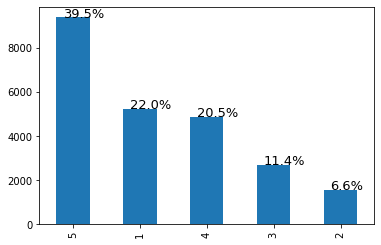

In [68]:
ax = df1['rating'].value_counts().plot(kind='bar')
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height(), \
            str(round((i.get_height()/total)*100, 1))+'%', fontsize = 13,
                color = 'black')

In [69]:
import re
def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'cause", " because", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"\'em", " them", phrase)
    phrase = re.sub(r"\'t've", " not have", phrase)
    phrase = re.sub(r"\'d've", " would have", phrase)
    phrase = re.sub(r"\'clock", "f the clock", phrase)
    return phrase

print("finished  decontracted")

finished  decontracted


In [70]:
df1["translated"] = df1["translated"].astype(str)
df1["translated_Title"] = df1["translated_Title"].astype(str)

In [71]:
df1["translated"] = df1["translated"].apply(decontracted)
df1["translated_Title"] = df1["translated_Title"].apply(decontracted)

Importing nltk and downloading stopwords and wordnet

In [72]:
!pip install nltk

import nltk
nltk.download('stopwords')
nltk.download('wordnet')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [73]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pal = sns.color_palette()
from wordcloud import WordCloud, STOPWORDS

#text preprocessing
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))
import string
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.sparse import hstack, csr_matrix


from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))


(-0.5, 1439.5, 1079.5, -0.5)

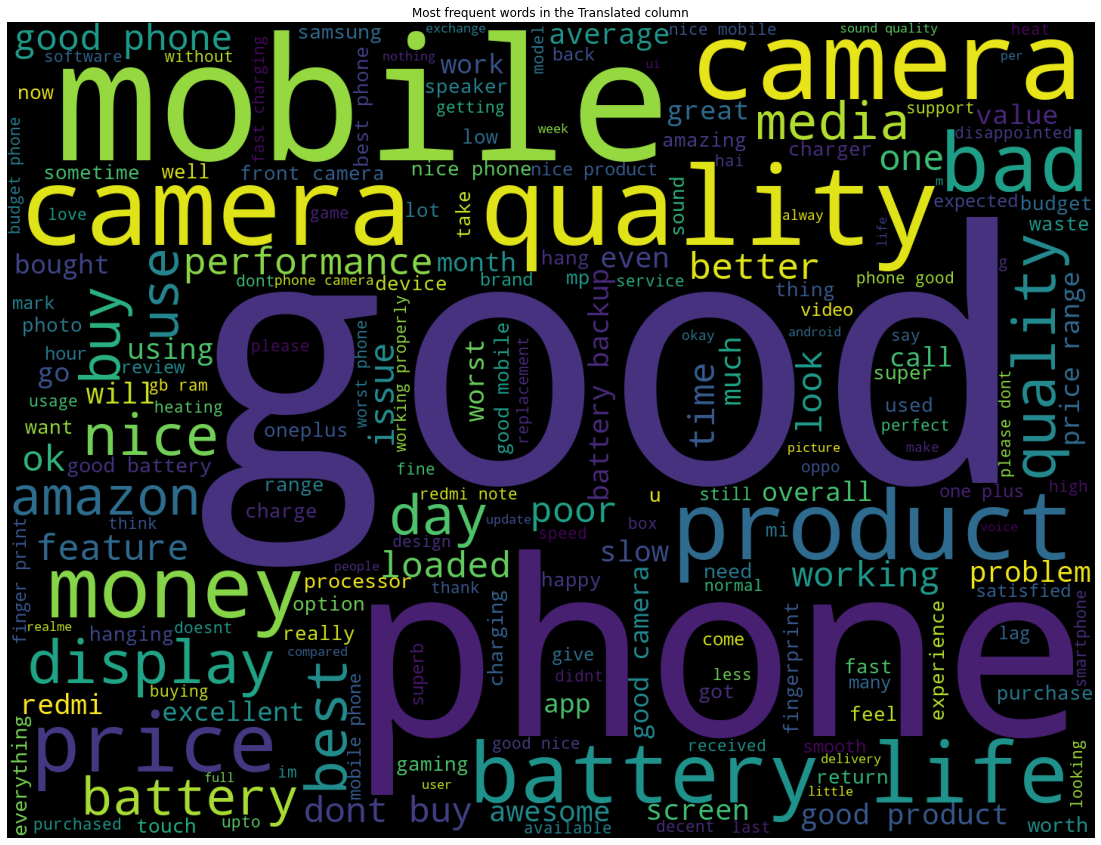

In [74]:
train_desc = pd.Series(df1['translated'].tolist()).astype(str)
cloud = WordCloud(width=1440, height=1080,stopwords=STOPWORDS).generate(" ".join(train_desc.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.title("Most frequent words in the Translated column")
plt.axis('off')

In [75]:
import nltk
from nltk import FreqDist

In [76]:
# function to plot most frequent terms
def freq_words(x, terms = 40):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.xticks(rotation=90)
  plt.show()

Removing unwanted symbols.

In [77]:
# remove unwanted characters, symbols
df1['Description'] = df1['translated'].str.replace("[^a-zA-Z0-9#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [78]:
#Let’s try to remove the stopwords and short words (<2 letters) from the reviews.
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [79]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new


# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df1['translated']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

Frequency of Words

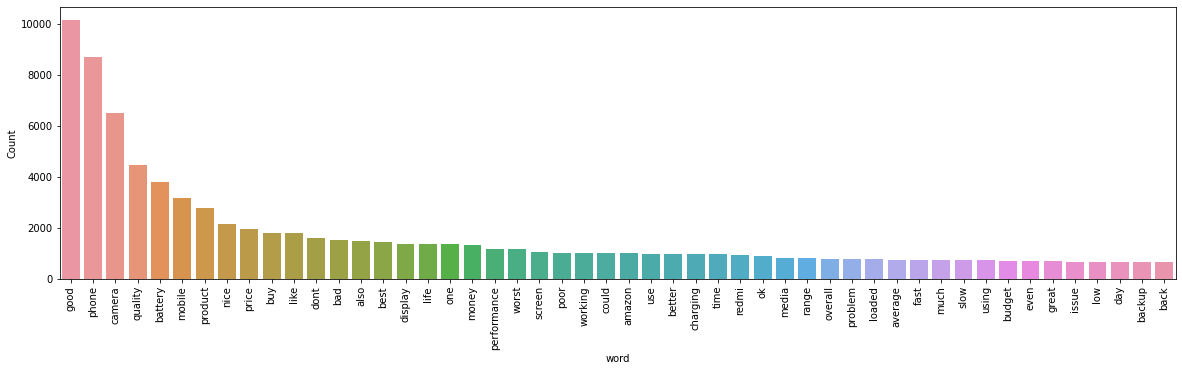

In [80]:
freq_words(reviews, 50)

In [81]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [82]:
#Let’s tokenize the reviews and then lemmatize the tokenized reviews.

tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['im', 'writing', 'review', 'using', 'days', 'honest', 'normal', 'android', 'phoneits', 'like', 'onepluscamera', 'quality', 'low', 'says', 'mp', 'notsound', 'also', 'lowbattery', 'battery', 'backup', 'ok', 'one', 'day', 'normal', 'use', 'itsif', 'ur', 'gamer', 'dont', 'go', 'itoverall', 'price', 'high', 'handsetif', 'u', 'really', 'wanna', 'buy', 'oneplus', 'ho', 'higher', 'end', 'modelim', 'first', 'time', 'buying', 'onepluslittle', 'disappointment']


In [83]:
reviews_2 = lemmatization(tokenized_reviews)

As you can see, we have not just lemmatized the words but also filtered only nouns and adjectives. Let’s de-tokenize the lemmatized reviews and plot the most common words.


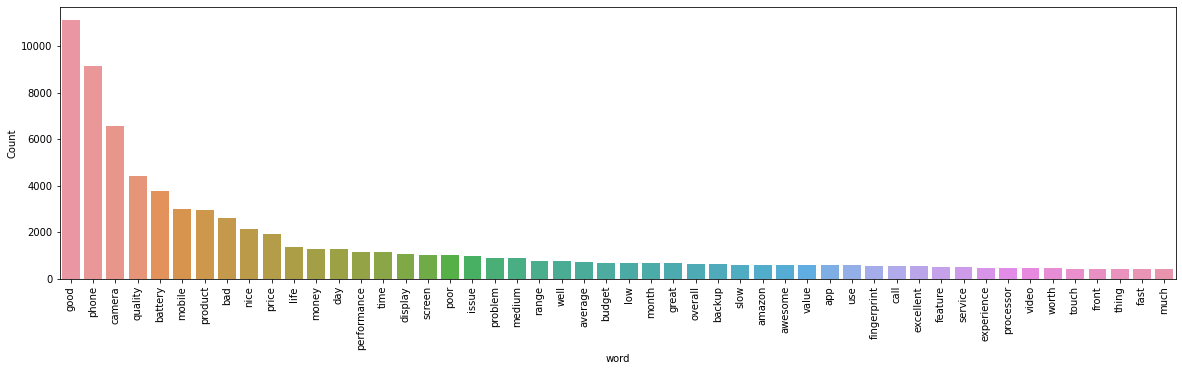

In [84]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df1['translated'] = reviews_3

freq_words(df1['translated'], 50)

In [85]:
df1

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name,Color,RAM,Internal_Storage,Model_Name,translated,translated_Title,Description
0,0,Worst phone ever,1,Hang problem,1,4,3,1,OnePlus Nord CE 2 5G,problem,worst phone ever,hang problem
1,1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,1,4,3,1,OnePlus Nord CE 2 5G,review day honest normal android phoneit onepl...,ok not up to the mark,im writing this review after using days be to ...
2,2,Awesome look,5,Camera is so good n very fast phone back look ...,1,4,3,1,OnePlus Nord CE 2 5G,camera good fast phone look price segment wort...,awesome look,camera is so good n very fast phone back look ...
3,3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,1,4,3,1,OnePlus Nord CE 2 5G,medium average product decent day day activity...,one plus losing is originality,the media could not be loaded i...
4,4,Read,1,I got my delivery on 23 feb when I unboxed the...,1,4,3,1,OnePlus Nord CE 2 5G,delivery phone display requested replacement n...,read,i got my delivery on feb when i unboxed the p...
...,...,...,...,...,...,...,...,...,...,...,...,...
23772,23772,Batten in this rangee,4,Must he Bhai iss range me bas cemra thoda sa s...,8,3,2,1,vivo iQOO Z6 5G,brother camera bit sage,batten in this range,mast hey brother in this range just the camera...
23773,23773,Good mobile,4,Good product,8,3,2,1,vivo iQOO Z6 5G,good product,good mobile,good product
23774,23774,Good camera,5,Good,8,3,2,1,vivo iQOO Z6 5G,good,good camera,good
23775,23775,Warest mobile,1,Don't buy this mobile phone money weast screen...,8,3,2,1,vivo iQOO Z6 5G,mobile phone money weast screen tach problemno...,warest mobile,dont buy this mobile phone money weast screen ...


In [86]:
Camera = df1.loc[df1['Description'].str.contains("camera", case=False)]
Camera

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name,Color,RAM,Internal_Storage,Model_Name,translated,translated_Title,Description
1,1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,1,4,3,1,OnePlus Nord CE 2 5G,review day honest normal android phoneit onepl...,ok not up to the mark,im writing this review after using days be to ...
2,2,Awesome look,5,Camera is so good n very fast phone back look ...,1,4,3,1,OnePlus Nord CE 2 5G,camera good fast phone look price segment wort...,awesome look,camera is so good n very fast phone back look ...
3,3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,1,4,3,1,OnePlus Nord CE 2 5G,medium average product decent day day activity...,one plus losing is originality,the media could not be loaded i...
4,4,Read,1,I got my delivery on 23 feb when I unboxed the...,1,4,3,1,OnePlus Nord CE 2 5G,delivery phone display requested replacement n...,read,i got my delivery on feb when i unboxed the p...
5,5,Fantastic but some bug fixes required!,4,The media could not be loaded.\n ...,1,4,3,1,OnePlus Nord CE 2 5G,medium phone fabbut sometime app crashing came...,fantastic but some bug fixes required,the media could not be loaded p...
...,...,...,...,...,...,...,...,...,...,...,...,...
23751,23751,Phone worth at price 15k below,4,Bought on 10 being a 2 band 5g which I still d...,8,3,2,1,vivo iQOO Z6 5G,band network phone overall great battery aweso...,phone worth at price k below,bought on being a band g which i still doubt...
23767,23767,Not bad,4,Battery backup is awesome.Sound is normal.came...,8,3,2,1,vivo iQOO Z6 5G,battery backup moresoftware stock,not bad,battery backup is awesomesound is normalcamera...
23772,23772,Batten in this rangee,4,Must he Bhai iss range me bas cemra thoda sa s...,8,3,2,1,vivo iQOO Z6 5G,brother camera bit sage,batten in this range,mast hey brother in this range just the camera...
23775,23775,Warest mobile,1,Don't buy this mobile phone money weast screen...,8,3,2,1,vivo iQOO Z6 5G,mobile phone money weast screen tach problemno...,warest mobile,dont buy this mobile phone money weast screen ...


In [87]:
Camera_rating=Camera.groupby(['Product Name']).agg({'rating': 'mean'})
Camera_rating.reset_index(inplace=True)
Camera_rating.columns=["Product Name","Camera_rating"]

Camera_rating

,Product Name,Camera_rating
0,1,3.735849
1,2,3.248744
2,3,3.296146
3,4,2.752542
4,5,3.180445
5,6,3.011294
6,7,3.668067
7,8,3.384615


In [88]:
Camera_counts=Camera.groupby(['Product Name','rating'])['Description'].count()
Camera_counts

Product Name  rating
1             1         121
              2          76
              3         146
              4         269
              5         395
2             1          97
              2          33
              3          64
              4          82
              5         122
3             1         111
              2          43
              3          67
              4         133
              5         139
4             1         416
              2         131
              3         203
              4         189
              5         241
5             1         276
              2         122
              3         245
              4         329
              5         286
6             1         256
              2         100
              3         190
              4         233
              5         195
7             1          69
              2          37
              3          63
              4         121
              5         186

In [89]:
Camera_percents = Camera_counts.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Camera_percents

Product Name  rating
1             1         12.015889
              2          7.547170
              3         14.498510
              4         26.713009
              5         39.225422
2             1         24.371859
              2          8.291457
              3         16.080402
              4         20.603015
              5         30.653266
3             1         22.515213
              2          8.722110
              3         13.590264
              4         26.977688
              5         28.194726
4             1         35.254237
              2         11.101695
              3         17.203390
              4         16.016949
              5         20.423729
5             1         21.939587
              2          9.697933
              3         19.475358
              4         26.152623
              5         22.734499
6             1         26.283368
              2         10.266940
              3         19.507187
              4         23.

In [90]:
Battery = df1.loc[df1['Description'].str.contains("battery", case=False)]
Battery

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name,Color,RAM,Internal_Storage,Model_Name,translated,translated_Title,Description
1,1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,1,4,3,1,OnePlus Nord CE 2 5G,review day honest normal android phoneit onepl...,ok not up to the mark,im writing this review after using days be to ...
2,2,Awesome look,5,Camera is so good n very fast phone back look ...,1,4,3,1,OnePlus Nord CE 2 5G,camera good fast phone look price segment wort...,awesome look,camera is so good n very fast phone back look ...
6,6,A good choice for upgrade,5,Nord CE 2 is a decent choice for someone looki...,1,4,3,1,OnePlus Nord CE 2 5G,decent choice k segment phone review variant d...,a good choice for upgrade,nord ce is a decent choice for someone lookin...
8,8,****VERY DISPOINTED BY 1PLUS****. Sound and ba...,1,****Don't buy any phones from Amazon*** i real...,1,4,3,1,OnePlus Nord CE 2 5G,phone amazon bad poor quality configuration re...,very disappointed by plus sound and back came...,dont buy any phones from amazon i really had a...
11,11,amazing,5,Very amazingly built & decently featured smart...,1,4,3,1,OnePlus Nord CE 2 5G,smartphonebattery last full day proper usage c...,amazing,very amazingly built decently featured smartp...
...,...,...,...,...,...,...,...,...,...,...,...,...
23750,23750,Definetly a steal at this price,5,Surprisingly good performance for a phone at t...,8,3,2,1,vivo iQOO Z6 5G,good performance phone price killer performanc...,definitely a steal at this price,surprisingly good performance for a phone at t...
23751,23751,Phone worth at price 15k below,4,Bought on 10 being a 2 band 5g which I still d...,8,3,2,1,vivo iQOO Z6 5G,band network phone overall great battery aweso...,phone worth at price k below,bought on being a band g which i still doubt...
23759,23759,Touch response is not up to the mark,4,Battery life excellent,8,3,2,1,vivo iQOO Z6 5G,battery life excellent,touch response is not up to the mark,battery life excellent
23767,23767,Not bad,4,Battery backup is awesome.Sound is normal.came...,8,3,2,1,vivo iQOO Z6 5G,battery backup moresoftware stock,not bad,battery backup is awesomesound is normalcamera...


In [91]:
Battery_rating=Battery.groupby(['Product Name']).agg({'rating': 'mean'})
Battery_rating.reset_index(inplace=True)
Battery_rating.columns=['Product Name',"Battery_Rating"]
Battery_rating

,Product Name,Battery_Rating
0,1,3.652058
1,2,3.627027
2,3,3.761194
3,4,3.558952
4,5,3.641361
5,6,3.544118
6,7,3.761124
7,8,3.545455


In [92]:
Battery_counts=Battery.groupby(['Product Name','rating'])['Description'].count()
Battery_counts

Product Name  rating
1             1         102
              2          61
              3         112
              4         200
              5         278
2             1          63
              2          24
              3          50
              4          84
              5         149
3             1          46
              2          24
              3          32
              4          95
              5         138
4             1          78
              2          34
              3          68
              4         110
              5         168
5             1         113
              2          49
              3         107
              4         225
              5         270
6             1          69
              2          41
              3          77
              4         140
              5         149
7             1          58
              2          26
              3          57
              4         105
              5         181

In [93]:
Battery_percentages = Battery_counts.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Battery_percentages

Product Name  rating
1             1         13.545817
              2          8.100930
              3         14.873838
              4         26.560425
              5         36.918991
2             1         17.027027
              2          6.486486
              3         13.513514
              4         22.702703
              5         40.270270
3             1         13.731343
              2          7.164179
              3          9.552239
              4         28.358209
              5         41.194030
4             1         17.030568
              2          7.423581
              3         14.847162
              4         24.017467
              5         36.681223
5             1         14.790576
              2          6.413613
              3         14.005236
              4         29.450262
              5         35.340314
6             1         14.495798
              2          8.613445
              3         16.176471
              4         29.

In [94]:
Display = df1.loc[df1['Description'].str.contains("display", case=False)]
Display

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name,Color,RAM,Internal_Storage,Model_Name,translated,translated_Title,Description
4,4,Read,1,I got my delivery on 23 feb when I unboxed the...,1,4,3,1,OnePlus Nord CE 2 5G,delivery phone display requested replacement n...,read,i got my delivery on feb when i unboxed the p...
6,6,A good choice for upgrade,5,Nord CE 2 is a decent choice for someone looki...,1,4,3,1,OnePlus Nord CE 2 5G,decent choice k segment phone review variant d...,a good choice for upgrade,nord ce is a decent choice for someone lookin...
12,12,A decent package for non gamers and everything...,4,The media could not be loaded.\n ...,1,4,3,1,OnePlus Nord CE 2 5G,medium build quality rating light weight phone...,a decent package for non gamers and everything...,the media could not be loaded b...
15,15,Amazing Phone,5,Best Operating system after iPhone so you and ...,1,4,3,1,OnePlus Nord CE 2 5G,good operating system iphone datum safe bankin...,amazing phone,best operating system after iphone so you and ...
17,17,Mid ranger Flagship.,5,I got this mobile for ₹ 16999 which was an awe...,1,4,3,1,OnePlus Nord CE 2 5G,mobile awesome deal phone rating pointsdeliver...,mid ranger flagship,i got this mobile for which was an awesome d...
...,...,...,...,...,...,...,...,...,...,...,...,...
23704,23704,Camara and battery and performance,3,Camara is worstand charging is very slow it's ...,8,3,2,1,vivo iQOO Z6 5G,hrs display well portrait camera capturing,camara and battery and performance,camara is worstand charging is very slow its t...
23716,23716,Super,5,This phone is good as camera quality and batte...,8,3,2,1,vivo iQOO Z6 5G,phone good camera quality battery life good fa...,super,this phone is good as camera quality and batte...
23726,23726,Need improvement in all fields of setting,1,"Need some more improvement in call section,Set...",8,3,2,1,vivo iQOO Z6 5G,improvement call sectionsetting many section,need improvement in all fields of setting,need some more improvement in call sectionsett...
23750,23750,Definetly a steal at this price,5,Surprisingly good performance for a phone at t...,8,3,2,1,vivo iQOO Z6 5G,good performance phone price killer performanc...,definitely a steal at this price,surprisingly good performance for a phone at t...


In [95]:
Display_rating=Display.groupby(['Product Name']).agg({'rating': 'mean'})
Display_rating.reset_index(inplace=True)
Display_rating.columns=['Product Name',"Display_rating"]
Display_rating

,Product Name,Display_rating
0,1,3.737624
1,2,2.368421
2,3,3.040541
3,4,2.952381
4,5,2.757709
5,6,3.584775
6,7,3.688312
7,8,3.309524


In [96]:
Display_counts=Display.groupby(['Product Name','rating'])['Description'].count()
Display_counts

Product Name  rating
1             1         32
              2          9
              3         22
              4         56
              5         83
2             1         56
              2         15
              3         10
              4         11
              5         22
3             1         20
              2          8
              3          8
              4         25
              5         13
4             1         54
              2         17
              3         21
              4         35
              5         41
5             1         79
              2         23
              3         41
              4         42
              5         42
6             1         42
              2         18
              3         54
              4         79
              5         96
7             1         37
              2         12
              3         31
              4         57
              5         94
8             1         14
       

In [97]:
Display_percentages = Display_counts.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Display_percentages

Product Name  rating
1             1         15.841584
              2          4.455446
              3         10.891089
              4         27.722772
              5         41.089109
2             1         49.122807
              2         13.157895
              3          8.771930
              4          9.649123
              5         19.298246
3             1         27.027027
              2         10.810811
              3         10.810811
              4         33.783784
              5         17.567568
4             1         32.142857
              2         10.119048
              3         12.500000
              4         20.833333
              5         24.404762
5             1         34.801762
              2         10.132159
              3         18.061674
              4         18.502203
              5         18.502203
6             1         14.532872
              2          6.228374
              3         18.685121
              4         27.

In [98]:
Performance = df1.loc[df1['Description'].str.contains("performance", case=False)]
Performance

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name,Color,RAM,Internal_Storage,Model_Name,translated,translated_Title,Description
3,3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,1,4,3,1,OnePlus Nord CE 2 5G,medium average product decent day day activity...,one plus losing is originality,the media could not be loaded i...
4,4,Read,1,I got my delivery on 23 feb when I unboxed the...,1,4,3,1,OnePlus Nord CE 2 5G,delivery phone display requested replacement n...,read,i got my delivery on feb when i unboxed the p...
6,6,A good choice for upgrade,5,Nord CE 2 is a decent choice for someone looki...,1,4,3,1,OnePlus Nord CE 2 5G,decent choice k segment phone review variant d...,a good choice for upgrade,nord ce is a decent choice for someone lookin...
12,12,A decent package for non gamers and everything...,4,The media could not be loaded.\n ...,1,4,3,1,OnePlus Nord CE 2 5G,medium build quality rating light weight phone...,a decent package for non gamers and everything...,the media could not be loaded b...
22,22,Read this before you buy this!!!!,4,The media could not be loaded.\n ...,1,4,3,1,OnePlus Nord CE 2 5G,medium youtuber obvious pointer pro max high e...,read this before you buy this,the media could not be loaded i...
...,...,...,...,...,...,...,...,...,...,...,...,...
23737,23737,This is a best smartphone with its price range,5,This device is really good performing andValue...,8,3,2,1,vivo iQOO Z6 5G,device good performance value money device review,this is a best smartphone with its price range,this device is really good performance and val...
23750,23750,Definetly a steal at this price,5,Surprisingly good performance for a phone at t...,8,3,2,1,vivo iQOO Z6 5G,good performance phone price killer performanc...,definitely a steal at this price,surprisingly good performance for a phone at t...
23751,23751,Phone worth at price 15k below,4,Bought on 10 being a 2 band 5g which I still d...,8,3,2,1,vivo iQOO Z6 5G,band network phone overall great battery aweso...,phone worth at price k below,bought on being a band g which i still doubt...
23752,23752,Waste of hard earned money ***Pathetic iQoo Ph...,1,I bought this with lot of expectations and upg...,8,3,2,1,vivo iQOO Z6 5G,lot expectation overall performanceiqoo phone ...,waste of hard earned money pathetic iqoo phones,i bought this with lot of expectations and upg...


In [99]:
Performance_rating=Performance.groupby(['Product Name']).agg({'rating': 'mean'})
Performance_rating.reset_index(inplace=True)
Performance_rating.columns=['Product Name',"Performance_rating"]
Performance_rating

,Product Name,Performance_rating
0,1,4.022831
1,2,3.139130
2,3,3.714286
3,4,3.430556
4,5,3.353846
5,6,3.115385
6,7,3.422414
7,8,3.696970


In [100]:
Performance_counts=Performance.groupby(['Product Name','rating'])['Description'].count()
Performance_counts

Product Name  rating
1             1          19
              2           9
              3          27
              4          57
              5         107
2             1          29
              2          14
              3          18
              4          20
              5          34
3             1          13
              2           8
              3          11
              4          28
              5          38
4             1          29
              2          11
              3          22
              4          33
              5          49
5             1          40
              2          14
              3          34
              4          51
              5          56
6             1          45
              2          17
              3          38
              4          36
              5          46
7             1          20
              2          12
              3          20
              4          27
              5          37

In [101]:
Performace_percentages = Performance_counts.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Performace_percentages

Product Name  rating
1             1          8.675799
              2          4.109589
              3         12.328767
              4         26.027397
              5         48.858447
2             1         25.217391
              2         12.173913
              3         15.652174
              4         17.391304
              5         29.565217
3             1         13.265306
              2          8.163265
              3         11.224490
              4         28.571429
              5         38.775510
4             1         20.138889
              2          7.638889
              3         15.277778
              4         22.916667
              5         34.027778
5             1         20.512821
              2          7.179487
              3         17.435897
              4         26.153846
              5         28.717949
6             1         24.725275
              2          9.340659
              3         20.879121
              4         19.

In [102]:
Price = df1.loc[df1['Description'].str.contains("price", case=False)]
Price

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name,Color,RAM,Internal_Storage,Model_Name,translated,translated_Title,Description
1,1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,1,4,3,1,OnePlus Nord CE 2 5G,review day honest normal android phoneit onepl...,ok not up to the mark,im writing this review after using days be to ...
2,2,Awesome look,5,Camera is so good n very fast phone back look ...,1,4,3,1,OnePlus Nord CE 2 5G,camera good fast phone look price segment wort...,awesome look,camera is so good n very fast phone back look ...
3,3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,1,4,3,1,OnePlus Nord CE 2 5G,medium average product decent day day activity...,one plus losing is originality,the media could not be loaded i...
9,9,Excellent all rounder!,5,The media could not be loaded.\n ...,1,4,3,1,OnePlus Nord CE 2 5G,medium mirror finish phone smooth day day usag...,excellent all rounder,the media could not be loaded t...
11,11,amazing,5,Very amazingly built & decently featured smart...,1,4,3,1,OnePlus Nord CE 2 5G,smartphonebattery last full day proper usage c...,amazing,very amazingly built decently featured smartp...
...,...,...,...,...,...,...,...,...,...,...,...,...
23709,23709,Nice phone under 15k,4,"It's a good phone at this price range, camera ...",8,3,2,1,vivo iQOO Z6 5G,good phone price range camera good rest spec g...,nice phone under k,its a good phone at this price range camera is...
23713,23713,Superb everything is perfect,5,Cool and awesome battery osm and camera absolu...,8,3,2,1,vivo iQOO Z6 5G,awesome battery camera top class cheap price g...,superb everything is perfect,cool and awesome battery osm and camera absolu...
23731,23731,Not good quality of camera Take long time to c...,3,Not good quality of back and front camera not ...,8,3,2,1,vivo iQOO Z6 5G,good quality front camera satisfied product pr...,not good quality of camera take long time to c...,not good quality of back and front camera not ...
23738,23738,Value for money,5,It's a best phone under 15 k price varient wi...,8,3,2,1,vivo iQOO Z6 5G,good phone k price varient snapdragon rate,value for money,its a best phone under k price varient with ...


In [103]:
Money = df1.loc[df1['Description'].str.contains("money", case=False)]
Money

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name,Color,RAM,Internal_Storage,Model_Name,translated,translated_Title,Description
24,24,"Bad camera, slow processor. Not value for money.",1,Pros-Good BatteryFast chargingBuild qualitySli...,1,4,3,1,OnePlus Nord CE 2 5G,battery fast high end low camera quality value...,bad camera slow processor not value for money,prosgood battery fast chargingbuild qualitysli...
34,34,One plus did it again!,5,"Was looking for a phone in this price range, t...",1,4,3,1,OnePlus Nord CE 2 5G,phone price range gift momdelivery person poli...,one plus did it again,was looking for a phone in this price range to...
41,41,Looks good so far,5,Using since 2 days. No hanging issue faced so ...,1,4,3,1,OnePlus Nord CE 2 5G,day issue work smooth gamer camera good class ...,looks good so far,using since days no hanging issue faced so fa...
52,52,Good phone,5,best looking phone ever for the price .The qua...,1,4,3,1,OnePlus Nord CE 2 5G,phone price quality extend ram gbproslook supp...,good phone,best looking phone ever for the price the qual...
80,80,Worst phone ever,1,"One of the worst service, they gave the warran...",1,4,3,1,OnePlus Nord CE 2 5G,bad service warranty year applicable damage ba...,worst phone ever,one of the worst service they gave the warrant...
...,...,...,...,...,...,...,...,...,...,...,...,...
23712,23712,THE LOOK OF THE DEVICE IS PREMIUM,5,"THE DEVICE IS WONDERFUL, CAMERA CAN BE IMPROVE...",8,3,2,1,vivo iQOO Z6 5G,device wonderful camera time reasonable worth ...,the look of the device is premium,the device is wonderful camera can be improved...
23723,23723,Wrist Phone don't buy,1,wroste product don't buy Porfomence bad Bad ph...,8,3,2,1,vivo iQOO Z6 5G,wroste product porfomence bad bad phone money ...,wrist phone dont buy,wroste product dont buy porfomence bad bad pho...
23737,23737,This is a best smartphone with its price range,5,This device is really good performing andValue...,8,3,2,1,vivo iQOO Z6 5G,device good performance value money device review,this is a best smartphone with its price range,this device is really good performance and val...
23769,23769,Iqoo z6 5g,5,The mobile is good value for money money_bag,8,3,2,1,vivo iQOO Z6 5G,mobile good value money moneybag,iqoo z g,the mobile is good value for money moneybag


In [104]:
df1["Product Name"].value_counts()

5    4460
2    4330
4    3768
1    3570
6    2724
3    2166
8    1419
7    1340
Name: Product Name, dtype: int64

In [105]:
final= Camera_rating.copy()

final

,Product Name,Camera_rating
0,1,3.735849
1,2,3.248744
2,3,3.296146
3,4,2.752542
4,5,3.180445
5,6,3.011294
6,7,3.668067
7,8,3.384615


In [106]:
final=pd.merge(final,Battery_rating)

In [107]:
final=pd.merge(final,Display_rating)

In [108]:
final=pd.merge(final,Performance_rating)
final

,Product Name,Camera_rating,Battery_Rating,Display_rating,Performance_rating
0,1,3.735849,3.652058,3.737624,4.022831
1,2,3.248744,3.627027,2.368421,3.139130
2,3,3.296146,3.761194,3.040541,3.714286
3,4,2.752542,3.558952,2.952381,3.430556
4,5,3.180445,3.641361,2.757709,3.353846
5,6,3.011294,3.544118,3.584775,3.115385
6,7,3.668067,3.761124,3.688312,3.422414
7,8,3.384615,3.545455,3.309524,3.696970


In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [110]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df1["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df1["Description"]]
df1["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df1["Description"]]
df1["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df1["Description"]]
data = df1[["Description","Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                         Description  Positive  Negative  \
0                                       hang problem     0.000     0.730   
1  im writing this review after using days be to ...     0.070     0.109   
2  camera is so good n very fast phone back look ...     0.225     0.013   
3  the media could not be loaded                i...     0.189     0.048   
4  i got my delivery on  feb when i unboxed the p...     0.122     0.053   

   Neutral  
0    0.270  
1    0.821  
2    0.763  
3    0.762  
4    0.826  


In [111]:
df1

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name,Color,RAM,Internal_Storage,Model_Name,translated,translated_Title,Description,Positive,Negative,Neutral
0,0,Worst phone ever,1,Hang problem,1,4,3,1,OnePlus Nord CE 2 5G,problem,worst phone ever,hang problem,0.000,0.730,0.270
1,1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,1,4,3,1,OnePlus Nord CE 2 5G,review day honest normal android phoneit onepl...,ok not up to the mark,im writing this review after using days be to ...,0.070,0.109,0.821
2,2,Awesome look,5,Camera is so good n very fast phone back look ...,1,4,3,1,OnePlus Nord CE 2 5G,camera good fast phone look price segment wort...,awesome look,camera is so good n very fast phone back look ...,0.225,0.013,0.763
3,3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,1,4,3,1,OnePlus Nord CE 2 5G,medium average product decent day day activity...,one plus losing is originality,the media could not be loaded i...,0.189,0.048,0.762
4,4,Read,1,I got my delivery on 23 feb when I unboxed the...,1,4,3,1,OnePlus Nord CE 2 5G,delivery phone display requested replacement n...,read,i got my delivery on feb when i unboxed the p...,0.122,0.053,0.826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23772,23772,Batten in this rangee,4,Must he Bhai iss range me bas cemra thoda sa s...,8,3,2,1,vivo iQOO Z6 5G,brother camera bit sage,batten in this range,mast hey brother in this range just the camera...,0.000,0.000,1.000
23773,23773,Good mobile,4,Good product,8,3,2,1,vivo iQOO Z6 5G,good product,good mobile,good product,0.744,0.000,0.256
23774,23774,Good camera,5,Good,8,3,2,1,vivo iQOO Z6 5G,good,good camera,good,1.000,0.000,0.000
23775,23775,Warest mobile,1,Don't buy this mobile phone money weast screen...,8,3,2,1,vivo iQOO Z6 5G,mobile phone money weast screen tach problemno...,warest mobile,dont buy this mobile phone money weast screen ...,0.164,0.070,0.765


In [112]:
df_sentiment=df1.copy()


In [113]:
df_sentiment=df_sentiment[['Product Name', 'Positive', 'Negative', 'Neutral']]

In [114]:
df_sentiment=df_sentiment.groupby(['Product Name']).agg('mean')

In [115]:
df_sentiment.reset_index(inplace=True)
df_sentiment

,Product Name,Positive,Negative,Neutral
0,1,0.282713,0.082090,0.635193
1,2,0.415822,0.088066,0.496114
2,3,0.352971,0.093024,0.553541
3,4,0.286569,0.130962,0.581143
4,5,0.292404,0.093478,0.614119
5,6,0.257825,0.121843,0.620332
6,7,0.195387,0.084915,0.719695
7,8,0.251710,0.106821,0.641463


In [116]:
final=pd.merge(final,df_sentiment)
final

,Product Name,Camera_rating,Battery_Rating,Display_rating,Performance_rating,Positive,Negative,Neutral
0,1,3.735849,3.652058,3.737624,4.022831,0.282713,0.082090,0.635193
1,2,3.248744,3.627027,2.368421,3.139130,0.415822,0.088066,0.496114
2,3,3.296146,3.761194,3.040541,3.714286,0.352971,0.093024,0.553541
3,4,2.752542,3.558952,2.952381,3.430556,0.286569,0.130962,0.581143
4,5,3.180445,3.641361,2.757709,3.353846,0.292404,0.093478,0.614119
5,6,3.011294,3.544118,3.584775,3.115385,0.257825,0.121843,0.620332
6,7,3.668067,3.761124,3.688312,3.422414,0.195387,0.084915,0.719695
7,8,3.384615,3.545455,3.309524,3.696970,0.251710,0.106821,0.641463


In [117]:
conditions = [ (final["Product Name"]==1), 
               (final["Product Name"]==2), 
               (final["Product Name"]==3), 
               (final["Product Name"]==4), 
               (final["Product Name"]==5), 
               (final["Product Name"]==6), 
               (final["Product Name"]==7),
               (final["Product Name"]==8)] 
values = ['OnePlus Nord CE 2 5G ', 'OPPO A31', 'realme narzo 50A', 'Redmi 10 Prime','Redmi 9 Activ','Redmi Note 11','Samsung Galaxy M32','vivo iQOO Z6 5G']
final['Model_Name'] = np.select(conditions, values)

In [118]:
final

,Product Name,Camera_rating,Battery_Rating,Display_rating,Performance_rating,Positive,Negative,Neutral,Model_Name
0,1,3.735849,3.652058,3.737624,4.022831,0.282713,0.082090,0.635193,OnePlus Nord CE 2 5G
1,2,3.248744,3.627027,2.368421,3.139130,0.415822,0.088066,0.496114,OPPO A31
2,3,3.296146,3.761194,3.040541,3.714286,0.352971,0.093024,0.553541,realme narzo 50A
3,4,2.752542,3.558952,2.952381,3.430556,0.286569,0.130962,0.581143,Redmi 10 Prime
4,5,3.180445,3.641361,2.757709,3.353846,0.292404,0.093478,0.614119,Redmi 9 Activ
5,6,3.011294,3.544118,3.584775,3.115385,0.257825,0.121843,0.620332,Redmi Note 11
6,7,3.668067,3.761124,3.688312,3.422414,0.195387,0.084915,0.719695,Samsung Galaxy M32
7,8,3.384615,3.545455,3.309524,3.696970,0.251710,0.106821,0.641463,vivo iQOO Z6 5G


In [119]:
final.columns

Index(['Product Name', 'Camera_rating', 'Battery_Rating', 'Display_rating',
       'Performance_rating', 'Positive', 'Negative', 'Neutral', 'Model_Name'],
      dtype='object')

In [120]:

final=final[['Model_Name','Product Name', 'Camera_rating', 'Battery_Rating', 'Display_rating',
       'Performance_rating', 'Positive', 'Negative', 'Neutral']]

In [121]:
product_dict={'OnePlus Nord CE 2 5G ':1, 'OPPO A31':2, 'realme narzo 50A':3, 'Redmi 10 Prime':4,'Redmi 9 Activ':5,'Redmi Note 11':6,'Samsung Galaxy M32':7,'vivo iQOO Z6 5G':8}

In [122]:
product_dict

{'OPPO A31': 2,
 'OnePlus Nord CE 2 5G ': 1,
 'Redmi 10 Prime': 4,
 'Redmi 9 Activ': 5,
 'Redmi Note 11': 6,
 'Samsung Galaxy M32': 7,
 'realme narzo 50A': 3,
 'vivo iQOO Z6 5G': 8}

In [123]:
list1=list(product_dict.items())

In [124]:
final["overall"]=(final["Camera_rating"]+final["Battery_Rating"]+final["Display_rating"]+final["Performance_rating"])/4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
final

,Model_Name,Product Name,Camera_rating,Battery_Rating,Display_rating,Performance_rating,Positive,Negative,Neutral,overall
0,OnePlus Nord CE 2 5G,1,3.735849,3.652058,3.737624,4.022831,0.282713,0.082090,0.635193,3.787091
1,OPPO A31,2,3.248744,3.627027,2.368421,3.139130,0.415822,0.088066,0.496114,3.095831
2,realme narzo 50A,3,3.296146,3.761194,3.040541,3.714286,0.352971,0.093024,0.553541,3.453042
3,Redmi 10 Prime,4,2.752542,3.558952,2.952381,3.430556,0.286569,0.130962,0.581143,3.173608
4,Redmi 9 Activ,5,3.180445,3.641361,2.757709,3.353846,0.292404,0.093478,0.614119,3.233340
5,Redmi Note 11,6,3.011294,3.544118,3.584775,3.115385,0.257825,0.121843,0.620332,3.313893
6,Samsung Galaxy M32,7,3.668067,3.761124,3.688312,3.422414,0.195387,0.084915,0.719695,3.634979
7,vivo iQOO Z6 5G,8,3.384615,3.545455,3.309524,3.696970,0.251710,0.106821,0.641463,3.484141


**Ranking Tables**

In [126]:
sorted_Camera = final.sort_values(by=['Camera_rating'], ascending=False)
sorted_Camera

,Model_Name,Product Name,Camera_rating,Battery_Rating,Display_rating,Performance_rating,Positive,Negative,Neutral,overall
0,OnePlus Nord CE 2 5G,1,3.735849,3.652058,3.737624,4.022831,0.282713,0.082090,0.635193,3.787091
6,Samsung Galaxy M32,7,3.668067,3.761124,3.688312,3.422414,0.195387,0.084915,0.719695,3.634979
7,vivo iQOO Z6 5G,8,3.384615,3.545455,3.309524,3.696970,0.251710,0.106821,0.641463,3.484141
2,realme narzo 50A,3,3.296146,3.761194,3.040541,3.714286,0.352971,0.093024,0.553541,3.453042
1,OPPO A31,2,3.248744,3.627027,2.368421,3.139130,0.415822,0.088066,0.496114,3.095831
4,Redmi 9 Activ,5,3.180445,3.641361,2.757709,3.353846,0.292404,0.093478,0.614119,3.233340
5,Redmi Note 11,6,3.011294,3.544118,3.584775,3.115385,0.257825,0.121843,0.620332,3.313893
3,Redmi 10 Prime,4,2.752542,3.558952,2.952381,3.430556,0.286569,0.130962,0.581143,3.173608


In [127]:
sorted_Battery= final.sort_values(by=['Battery_Rating'], ascending=False)
sorted_Battery

,Model_Name,Product Name,Camera_rating,Battery_Rating,Display_rating,Performance_rating,Positive,Negative,Neutral,overall
2,realme narzo 50A,3,3.296146,3.761194,3.040541,3.714286,0.352971,0.093024,0.553541,3.453042
6,Samsung Galaxy M32,7,3.668067,3.761124,3.688312,3.422414,0.195387,0.084915,0.719695,3.634979
0,OnePlus Nord CE 2 5G,1,3.735849,3.652058,3.737624,4.022831,0.282713,0.082090,0.635193,3.787091
4,Redmi 9 Activ,5,3.180445,3.641361,2.757709,3.353846,0.292404,0.093478,0.614119,3.233340
1,OPPO A31,2,3.248744,3.627027,2.368421,3.139130,0.415822,0.088066,0.496114,3.095831
3,Redmi 10 Prime,4,2.752542,3.558952,2.952381,3.430556,0.286569,0.130962,0.581143,3.173608
7,vivo iQOO Z6 5G,8,3.384615,3.545455,3.309524,3.696970,0.251710,0.106821,0.641463,3.484141
5,Redmi Note 11,6,3.011294,3.544118,3.584775,3.115385,0.257825,0.121843,0.620332,3.313893


In [128]:
sorted_Display= final.sort_values(by=['Display_rating'], ascending=False)
sorted_Display

,Model_Name,Product Name,Camera_rating,Battery_Rating,Display_rating,Performance_rating,Positive,Negative,Neutral,overall
0,OnePlus Nord CE 2 5G,1,3.735849,3.652058,3.737624,4.022831,0.282713,0.082090,0.635193,3.787091
6,Samsung Galaxy M32,7,3.668067,3.761124,3.688312,3.422414,0.195387,0.084915,0.719695,3.634979
5,Redmi Note 11,6,3.011294,3.544118,3.584775,3.115385,0.257825,0.121843,0.620332,3.313893
7,vivo iQOO Z6 5G,8,3.384615,3.545455,3.309524,3.696970,0.251710,0.106821,0.641463,3.484141
2,realme narzo 50A,3,3.296146,3.761194,3.040541,3.714286,0.352971,0.093024,0.553541,3.453042
3,Redmi 10 Prime,4,2.752542,3.558952,2.952381,3.430556,0.286569,0.130962,0.581143,3.173608
4,Redmi 9 Activ,5,3.180445,3.641361,2.757709,3.353846,0.292404,0.093478,0.614119,3.233340
1,OPPO A31,2,3.248744,3.627027,2.368421,3.139130,0.415822,0.088066,0.496114,3.095831


In [129]:
sorted_Performance= final.sort_values(by=['Performance_rating'], ascending=False)
sorted_Performance

,Model_Name,Product Name,Camera_rating,Battery_Rating,Display_rating,Performance_rating,Positive,Negative,Neutral,overall
0,OnePlus Nord CE 2 5G,1,3.735849,3.652058,3.737624,4.022831,0.282713,0.082090,0.635193,3.787091
2,realme narzo 50A,3,3.296146,3.761194,3.040541,3.714286,0.352971,0.093024,0.553541,3.453042
7,vivo iQOO Z6 5G,8,3.384615,3.545455,3.309524,3.696970,0.251710,0.106821,0.641463,3.484141
3,Redmi 10 Prime,4,2.752542,3.558952,2.952381,3.430556,0.286569,0.130962,0.581143,3.173608
6,Samsung Galaxy M32,7,3.668067,3.761124,3.688312,3.422414,0.195387,0.084915,0.719695,3.634979
4,Redmi 9 Activ,5,3.180445,3.641361,2.757709,3.353846,0.292404,0.093478,0.614119,3.233340
1,OPPO A31,2,3.248744,3.627027,2.368421,3.139130,0.415822,0.088066,0.496114,3.095831
5,Redmi Note 11,6,3.011294,3.544118,3.584775,3.115385,0.257825,0.121843,0.620332,3.313893


In [130]:
sorted_overall = final.sort_values(by=['overall'], ascending=False)
sorted_overall

,Model_Name,Product Name,Camera_rating,Battery_Rating,Display_rating,Performance_rating,Positive,Negative,Neutral,overall
0,OnePlus Nord CE 2 5G,1,3.735849,3.652058,3.737624,4.022831,0.282713,0.082090,0.635193,3.787091
6,Samsung Galaxy M32,7,3.668067,3.761124,3.688312,3.422414,0.195387,0.084915,0.719695,3.634979
7,vivo iQOO Z6 5G,8,3.384615,3.545455,3.309524,3.696970,0.251710,0.106821,0.641463,3.484141
2,realme narzo 50A,3,3.296146,3.761194,3.040541,3.714286,0.352971,0.093024,0.553541,3.453042
5,Redmi Note 11,6,3.011294,3.544118,3.584775,3.115385,0.257825,0.121843,0.620332,3.313893
4,Redmi 9 Activ,5,3.180445,3.641361,2.757709,3.353846,0.292404,0.093478,0.614119,3.233340
3,Redmi 10 Prime,4,2.752542,3.558952,2.952381,3.430556,0.286569,0.130962,0.581143,3.173608
1,OPPO A31,2,3.248744,3.627027,2.368421,3.139130,0.415822,0.088066,0.496114,3.095831


**Here we can select the option and check the final result.**

In [131]:
print("Please use below notions to select the required mobile",list1)
product=int(input("Enter the product you need"))

print("results are:")
print(final.loc[product-1])

Please use below notions to select the required mobile [('OnePlus Nord CE 2 5G ', 1), ('OPPO A31', 2), ('realme narzo 50A', 3), ('Redmi 10 Prime', 4), ('Redmi 9 Activ', 5), ('Redmi Note 11', 6), ('Samsung Galaxy M32', 7), ('vivo iQOO Z6 5G', 8)]
Enter the product you need2
results are:
Model_Name            OPPO A31
Product Name                 2
Camera_rating         3.248744
Battery_Rating        3.627027
Display_rating        2.368421
Performance_rating     3.13913
Positive              0.415822
Negative              0.088066
Neutral               0.496114
overall               3.095831
Name: 1, dtype: object
